<a href="https://colab.research.google.com/github/sanchitsetia/Home-Credit-Default-Risk/blob/main/Home_Credit_Default_risk_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Overview

Many people struggle to get loans due to insufficient or non-existent credit histories. There are risks associated with providing loans to such people due to risk of defaulting. There are some people for whom historical data related to previous credit information is available but going through such data is very time consuming and a cumbersome task.
Home Credit Group has created the Kaggle problem to deal with this problem. The key objective of this problem is to predict whether Clients/customers, who want to take loan, are capable of repaying the principal and interest loan amount in dedicated time. To make the predictions we are provided with application, demographic and historical credit behaviour data.

## Data Description

**1. application_{train|test}.csv**

* This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
* Static data for all applications. One row represents one loan in our data sample.

**2. bureau.csv**

* All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
* For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

**3. bureau_balance.csv**

* Monthly balances of previous credits in Credit Bureau.
* This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

**4. POS_CASH_balance.csv**

* Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

**5. credit_card_balance.csv**

* Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
* This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

**6. previous_application.csv**

* All previous applications for Home Credit loans of clients who have loans in our sample.
* There is one row for each previous application related to loans in our data sample.

**7. installments_payments.csv**

* Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
* One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.


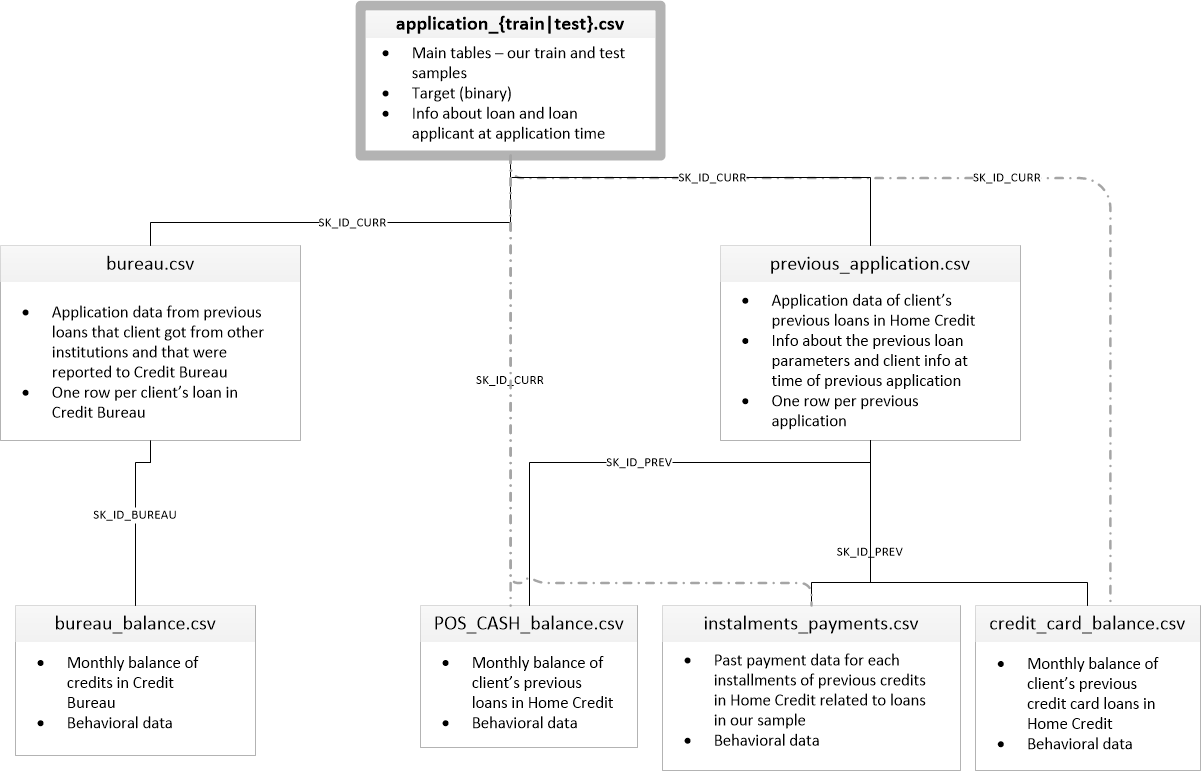




### Downloading Data

In [ ]:
! wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.141 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-GB,en-US;q=0.9,en;q=0.8" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9120/860599/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1611643400&Signature=N4Zk5QQ5zThGwbbehaf5VLgKOybQwDaYaeR04QKR0l0%2B89%2B8NeUZXSPi3vQ5zkIYCjUdDv0pEtBJaNGWso5X%2FqJSUvc%2F9O8rQ2svFXzDOSBL8egqX0ufTvhAJkj4O6U7tF%2B8yyNlVGgjQmz4rqzkSJ%2FUJNUiIYzIYqf4vK4aqtwPndYnS7CLbtPHNIqOLdCICjIE%2B0OEOZcLmZwZ25Z163kgTc%2BXuFrSQnsWN6L9oqZ%2F%2FLbpu%2FDz7SnRurLYifrZz9AR7k18DVSr2sblzwITfRh29U1hRawq7quxZMLHfkYX3yCL%2FbhlQNhBmIDFmyjHEGn7N8TCmQcoJUdAIm3RuA%3D%3D&response-content-disposition=attachment%3B+filename%3Dhome-credit-default-risk.zip" -c -O 'home-credit-default-risk.zip'

--2021-01-24 05:33:29--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/9120/860599/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1611643400&Signature=N4Zk5QQ5zThGwbbehaf5VLgKOybQwDaYaeR04QKR0l0%2B89%2B8NeUZXSPi3vQ5zkIYCjUdDv0pEtBJaNGWso5X%2FqJSUvc%2F9O8rQ2svFXzDOSBL8egqX0ufTvhAJkj4O6U7tF%2B8yyNlVGgjQmz4rqzkSJ%2FUJNUiIYzIYqf4vK4aqtwPndYnS7CLbtPHNIqOLdCICjIE%2B0OEOZcLmZwZ25Z163kgTc%2BXuFrSQnsWN6L9oqZ%2F%2FLbpu%2FDz7SnRurLYifrZz9AR7k18DVSr2sblzwITfRh29U1hRawq7quxZMLHfkYX3yCL%2FbhlQNhBmIDFmyjHEGn7N8TCmQcoJUdAIm3RuA%3D%3D&response-content-disposition=attachment%3B+filename%3Dhome-credit-default-risk.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.212.128, 173.194.215.128, 173.194.216.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721616255 (688M) [application/zip]
Saving to: ‘home-credit-defa

In [ ]:
# Unzipping the data

!unzip -q home-credit-default-risk.zip

###Importing Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import roc_auc_score
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
from prettytable import PrettyTable

## Reusable Functions for Analysis

In [ ]:
# This Function is used to partition our Dataframe Columns in different types(int, float, Object(Categorical))
def partition_colnames_of_different_types(dataframe):
  '''
  This funtion is used to divide our set of columns into 3 types of lists. 
  I/P - Dataframe(containg all the columns which we want to separate into 3 types)
  O/P - 3 lists(Ordinal,Continous,categorical)

  We are doing this separation so that we know which type of plot and anaysis is required on some particular column
  1. Ordinal features list- This contains all the columns which have only integral values. Integral value might be continous feature or it can be Categorical also.
  We have to figure this out manually by looking at the data and column description.

  2. Continous features list- This contains all the columns which have only float values. This can only be continous features.

  3. Categorical featurtes list= This contains all the columns which are of object type. Object can have different properties. These properties are the categories.
  
   '''
  continous_features = []
  ordinal_features = []
  categorical_features = []
  for column in dataframe.columns.values:
    if column!="TARGET":
      if dataframe[column].dtype=="int64":
        ordinal_features.append(column)
      elif dataframe[column].dtype=="float64":
        continous_features.append(column)
      elif dataframe[column].dtype=="object":
        categorical_features.append(column)

  return continous_features,ordinal_features,categorical_features

In [ ]:
#Referred-- https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

def plot_distribution_ordinal_and_categorical(df,col,size=(16,13)):
  '''
  This function is used to plot different types of plots categorical features analysis.

  I/P- dataframe(df)- dataframe containg the column for which plots needs to be generate,
        col- column name for which plot needs to be genearted.
        size- figure size of the plots.
  
  O/P- It prints 3 plots.
  1. Bar plot with percentage of different categories of some column
  2. Bar plot with percentage of loans approved for all the different categories of some particular column.
  3. Bar plot with percentage of loans rejeceted for all the different categories of some particular column.
   '''
  fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=size)

  # getting total number of datapoints to get the percentage
  total=0
  for i in list(dict(df[col].value_counts()).values()):
    total+=i


  ax1 = sns.countplot(x=col, data=df,ax=ax1)

  # to add the percentage on top of the bar plot(countplot)
  for p in ax1.patches:
      height = p.get_height()
      ax1.text(p.get_x()+p.get_width()/2.,
              height + 3,
              '{:1.4f}'.format((height/total)*100),
              ha="center") 
  
  # creating df with only loan applicants whose loans are approved
  temp_df_value_dict=dict((df[df["TARGET"]==0])[col].value_counts())
  df_value_dict=dict(df[col].value_counts())
  percentage_of_loans_approved_list=[]
  x_unique=list(df_value_dict.keys())
  for i in x_unique:
    if(temp_df_value_dict.get(i)) is None:
      percentage_of_loans_approved_list.append(0)
    else:
      percentage_of_loans_approved_list.append(temp_df_value_dict.get(i)/df_value_dict.get(i))
  ax2 = sns.barplot(x=x_unique,y=percentage_of_loans_approved_list,ax=ax2)

    # to add the percentage on top of the bar plot
  for p in ax2.patches:
      height = p.get_height()
      ax2.text(p.get_x()+p.get_width()/2.,
              height + 0.001,
              '{:1.4f}'.format(height*100),
              ha="center") 
  ax2.set_ylabel("Percentage of loans approved")
  ax2.set_xlabel(col)

      
  # creating df with only loan applicants whose loans are Rejected
  temp_df_value_dict=dict((df[df["TARGET"]==1])[col].value_counts())
  percentage_of_loans_approved_list=[]
  for i in x_unique:
    if(temp_df_value_dict.get(i)) is None:
      percentage_of_loans_approved_list.append(0)
    else:
      percentage_of_loans_approved_list.append(temp_df_value_dict.get(i)/df_value_dict.get(i))
  ax3 = sns.barplot(x=x_unique,y=percentage_of_loans_approved_list,ax=ax3)

    # to add the percentage on top of the bar plot
  for p in ax3.patches:
      height = p.get_height()
      ax3.text(p.get_x()+p.get_width()/2.,
              height + 0.001,
              '{:1.4f}'.format(height*100),
              ha="center") 
  ax3.set_ylabel("Percentage of loans Rejected")
  ax3.set_xlabel(col)
  plt.show()


  



In [ ]:
def top_k_features_for_EDA(k,feature_list,df):
  '''
  This function is used to predict the top K fetaures which we want to use for further analysis using logistic regression model based on the AUC score.
  I/P-
  k - Number of features to be selected.
  feature_list - List of featutes among which we want to select top k features.
  df- Dataframe containg all the features  

  O/P-
  feature_list- List of top k features.
  
   '''
  Auc_score_list=[]
  for i in tqdm(feature_list):
    copy_df=df.copy()
    copy_df[i].fillna((copy_df[i].mean()), inplace=True)
    clf=SGDClassifier(loss="log")
    X=(np.array(copy_df[i])).reshape(-1,1)
    clf.fit(X,copy_df["TARGET"])
    y_pred=clf.predict_proba(X)
    Auc_score_list.append(roc_auc_score(copy_df["TARGET"],y_pred[:, 1]))

  Auc_score_list=np.array(Auc_score_list)
  Arg_sorted=Auc_score_list.argsort()
  Arg_sorted=Arg_sorted[::-1]
  feature_list=np.array(feature_list)
  return feature_list[Arg_sorted[0:k]]

In [ ]:
#Referred-https://stackoverflow.com/questions/25239933/how-to-add-title-to-subplots-in-matplotlib

def plot_distribution_continous(df,col):
  '''
  This function is used to plot different types of plots for continous features analysis.

  I/P- dataframe(df)- dataframe containg the column for which plots needs to be generate,
        col- column name for which plot needs to be genearted.
  
  O/P- It prints 4 plots. PDF, CDF, PDF(different classes), Box plot

   '''
  fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1,figsize=(15,25))
  ax1=sns.distplot(df[col], rug=True, hist=False,ax=ax1)
  ax1.title.set_text("PDF for "+str(col))
  plt.ticklabel_format(style='plain', axis='y')
  plt.ticklabel_format(style='plain', axis='x')
  ax2=sns.ecdfplot(data=df,x=col,ax=ax2)
  ax2.title.set_text("CDF for "+str(col))
  ax3=sns.distplot(df[df["TARGET"]==0][col], rug=True, hist=False,ax=ax3,label="Class 0(Loan Approved)")
  ax3=sns.distplot(df[df["TARGET"]==1][col], rug=True, hist=False,ax=ax3,label="Class 1(Loan Rejected)")
  ax3.title.set_text("PDF for "+str(col)+" separated by classes")
  ax3.legend()
  ax4=sns.boxplot(x=df['TARGET'],y=df[col],ax=ax4)
  ax4.title.set_text("Boxplot for "+str(col))
  
  
  

  plt.show()  

In [ ]:
#Referred- https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset
def get_nan_percentage(df):
  ''' 
  This function is used to return the dataframe containing all the columns for which data is missing
   and percentage of data is missing in the decreasing sorting order.

   I/P- dataframe(df) for which missing values analysis needs to be done.
   O/P- dataframe containing the name of columns conataing missing values
    and percentage of missing values in those columns i n decreasing order.
  '''
  percent_missing = df.isna().sum() * 100 / len(df)
  missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
  missing_value_df.sort_values(by = 'percent_missing', ascending = False, inplace = True)
  return missing_value_df

In [ ]:
def print_nan_statsdf(df):
  '''
  This function is used to pring the NAN percentage that is returned by get_nan_percentage function in the pretty table.

  I/P- dataframe for which NAN percentage nedd to be printed.
  O/P- percentage and columns names printed in pretty table
  '''
  missing_value_df=get_nan_percentage(df)
  missing_value_df_1=missing_value_df[missing_value_df['percent_missing']>0]  
  print("Total number of Columns where NAN values are persent-->",len(missing_value_df_1))
  print("Below Table shows list of columns where NAN value are present.")
  x = PrettyTable()
  x.field_names = ["Column", "Percent Missing"]
  for i,j in zip(missing_value_df_1['column_name'],missing_value_df_1['percent_missing']):
    x.add_row([i,j])
  print(x)


In [ ]:
def printPercentiles(df,col,percentile_list=[0,10,20,30,40,50,60,70,80,90,100]):
  '''
  This function is used to print the percentile values of some particular column from some dataframe.
  I/P- 
  1. dataframe(df)- dataframe in which columns is present for which percentile values needs to be printed.
  2. col- column name for which percentile values needs to printed
  3. percentile_list- list of percentiles values that needs to be printed for particular column.
  O/P-
  percentile values are printed.
   '''
  for i in range(len(percentile_list)):
    print("for",col,percentile_list[i],"percentile is--->",df[col].quantile(percentile_list[i]/100))

## Basic Stats about the tables

In [ ]:
# Reading all the data from different tables

application_train_df = pd.read_csv('application_train.csv')
application_test_df = pd.read_csv('application_test.csv')
bureau_df = pd.read_csv('bureau.csv')
bureau_balance_df = pd.read_csv('bureau_balance.csv')
previous_application_df = pd.read_csv('previous_application.csv')
pos_cash_balance_df = pd.read_csv('POS_CASH_balance.csv')
credit_card_balance_df = pd.read_csv('credit_card_balance.csv')
installments_payments_df = pd.read_csv('installments_payments.csv')


In [ ]:
# Shapes of the Tables
print("Application Train",application_train_df.shape)
print("Application Test",application_test_df.shape)
print("Bureau",bureau_df.shape)
print("Bureau Balance",bureau_balance_df.shape)
print("Previous Application",previous_application_df.shape)
print("Pos Cash Balance",pos_cash_balance_df.shape)
print("Credit Card Balance",credit_card_balance_df.shape)
print("Install Payments",installments_payments_df.shape)


Application Train (307511, 122)
Application Test (48744, 121)
Bureau (1716428, 17)
Bureau Balance (27299925, 3)
Previous Application (1670214, 37)
Pos Cash Balance (10001358, 8)
Credit Card Balance (3840312, 23)
Install Payments (13605401, 8)


In [ ]:
print("Number of datapoints in Training data is", application_train_df.shape[0])
print("Number of datapoints in Testing data is", application_test_df.shape[0])

Number of datapoints in Training data is 307511
Number of datapoints in Testing data is 48744


### Checking class imbalance in training Data

Number of Loan applicants in training data for which loan is approved(Non Defaulter) 282686 ( 91.92711805431351 %)
Number of Loan applicants in training data for which loan is rejected(Defaulters) 24825 ( 8.072881945686495 %)


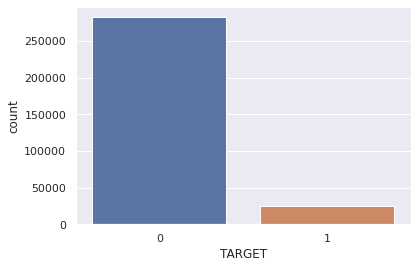

In [ ]:
# Referred Seaborn Documentation - https://seaborn.pydata.org/generated/seaborn.countplot.html


Loan_approved_count = application_train_df['TARGET'].value_counts()[0]
Loan_rejected_count = application_train_df['TARGET'].value_counts()[1]
Loan_approved_percentage=(Loan_approved_count/(Loan_approved_count+Loan_rejected_count))*100
Loan_rejeted_percentage=(Loan_rejected_count/(Loan_approved_count+Loan_rejected_count))*100

sns.set_theme(style="darkgrid")
ax = sns.countplot(x="TARGET", data=application_train_df)

print("Number of Loan applicants in training data for which loan is approved(Non Defaulter)",Loan_approved_count,"(",Loan_approved_percentage,"%)")
print("Number of Loan applicants in training data for which loan is rejected(Defaulters)",Loan_rejected_count,"(",Loan_rejeted_percentage,"%)")





Dataset is highly imbalanced with almost 92% of the samples belongiong class 0(loan approved) and 8% of samples belonging to class 1(Loan not approved).

## EDA For Loan Application Data

In [ ]:
#getting the column list of different types
application_continous_col_list,application_ordinal_col_list,application_categorical_col_list=partition_colnames_of_different_types(application_train_df)

In [ ]:
len(application_ordinal_col_list) + len(application_continous_col_list) + len(application_categorical_col_list)

121

In [ ]:
application_ordinal_col_list

['SK_ID_CURR',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

###Missing Value Analysis for Application Train DF

In [ ]:
print_nan_statsdf(application_train_df)

Total number of Columns where NAN values are persent--> 67
Below Table shows list of columns where NAN value are present.
+------------------------------+-----------------------+
|            Column            |    Percent Missing    |
+------------------------------+-----------------------+
|       COMMONAREA_MEDI        |   69.87229725115525   |
|        COMMONAREA_AVG        |   69.87229725115525   |
|       COMMONAREA_MODE        |   69.87229725115525   |
|   NONLIVINGAPARTMENTS_MODE   |   69.43296337366793   |
|   NONLIVINGAPARTMENTS_AVG    |   69.43296337366793   |
|   NONLIVINGAPARTMENTS_MEDI   |   69.43296337366793   |
|      FONDKAPREMONT_MODE      |   68.38617155158677   |
|    LIVINGAPARTMENTS_MODE     |   68.35495315614726   |
|     LIVINGAPARTMENTS_AVG     |   68.35495315614726   |
|    LIVINGAPARTMENTS_MEDI     |   68.35495315614726   |
|        FLOORSMIN_AVG         |   67.84862980511267   |
|        FLOORSMIN_MODE        |   67.84862980511267   |
|        FLOORSMIN_MEDI

Observations-

*    There are 67 out of 121 columns which contains the NAN values which is more than 50 percent.

*    We cannot remove these columns because it will cause serious information loss, hence we have to apply some imputation technique to deal with these NAN values during Data Preprocessing stage.

### Univariate Analysis

#### Ordinal Features

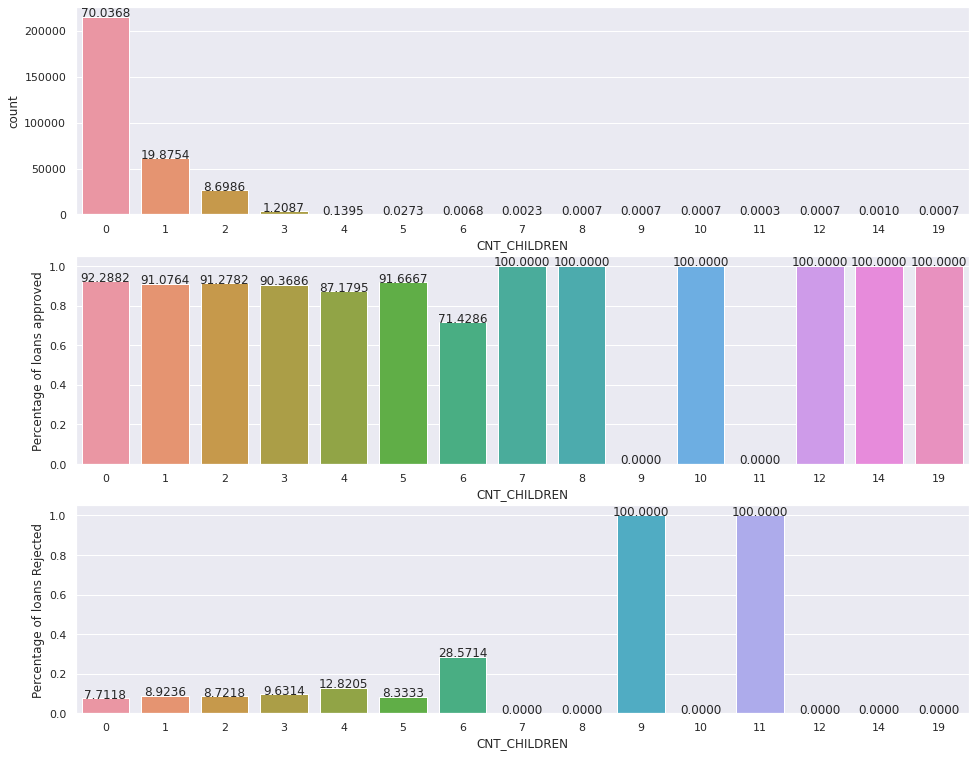

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'CNT_CHILDREN')

Observations-



*   Mojority of the Loan applicants have 0 children.
*   99 percent of loan applicant have either 0,1 or 2 children
*   Loan Applicants having 9 and 11 children have 0 % loan approval but data available is also less for these applicants.
*   After cutomers with 9 and 11 children, customers with 6 children also high Rejection rate.



Check test data for irreugular data

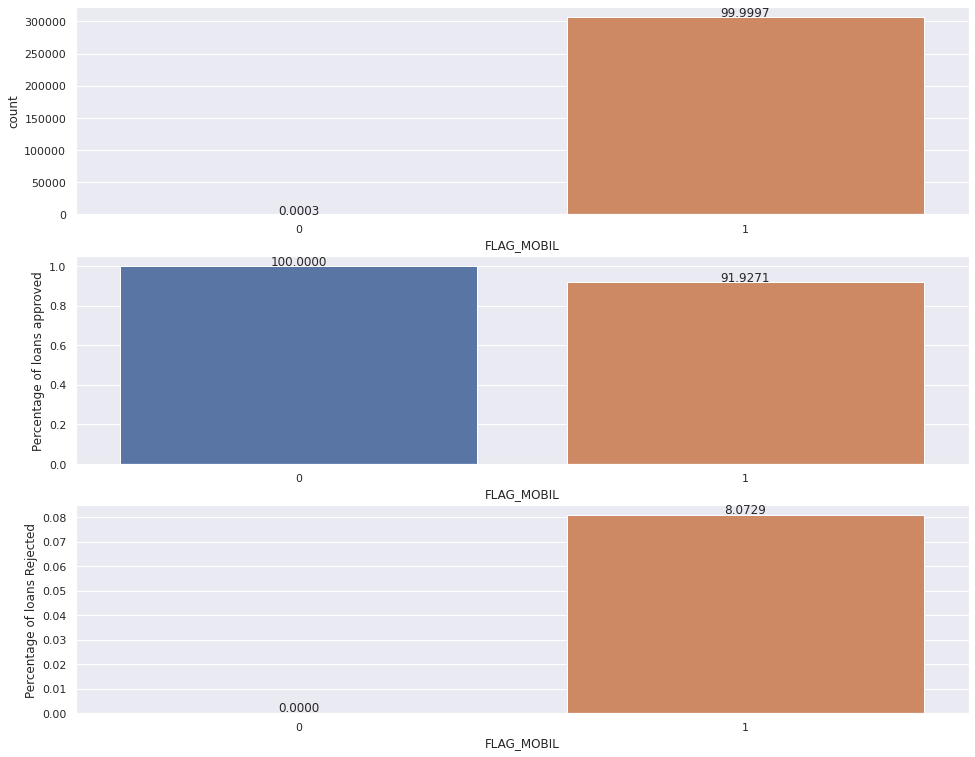

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_MOBIL')

Observations-

*   Almost all the Loan Applicant provide mobile phone number, hence it might not be a useful feature for classification.



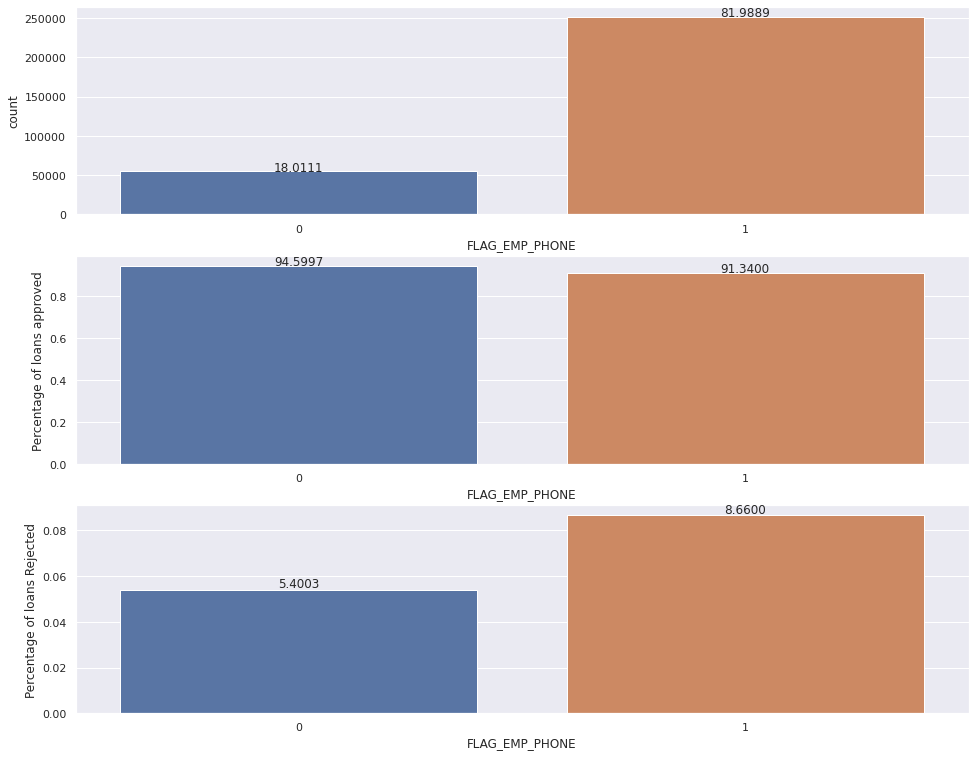

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_EMP_PHONE')

Observation-

*   82 % of loan applicant have provided employer's phone number
*   Loan applicant who provided employer phone number has 3 percent more rejection rate.




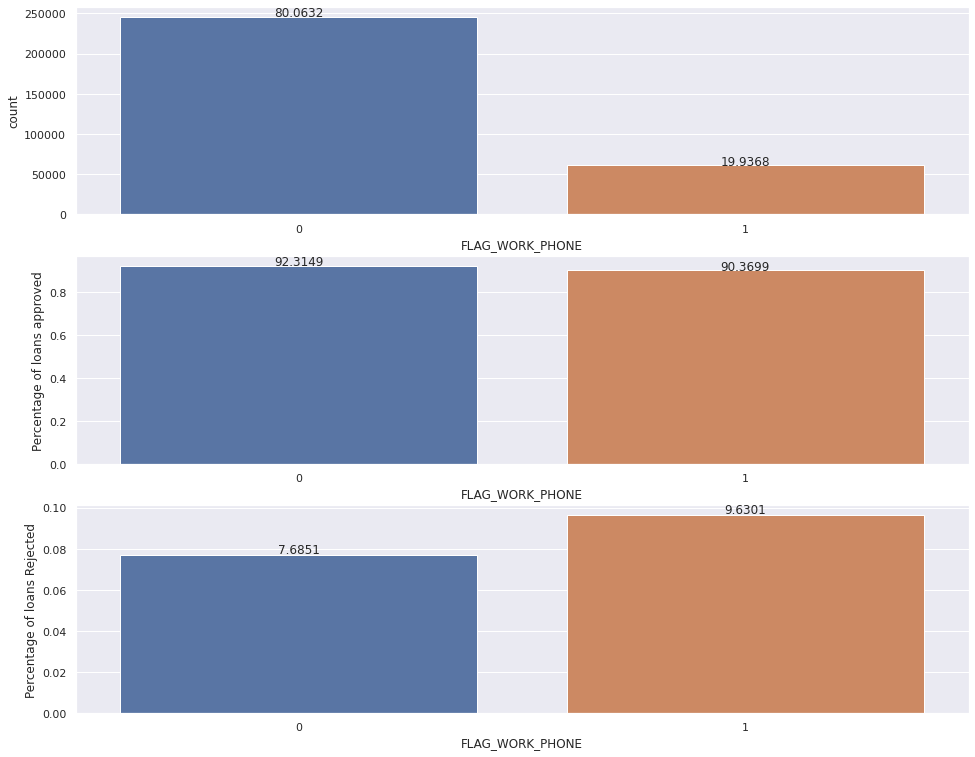

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_WORK_PHONE')

Observation-

*   80 % of the loan applicant did not provided work phone number
*   Acceptance and Rejection rate is almost similar for both cases(when work phone number provided and not provided).



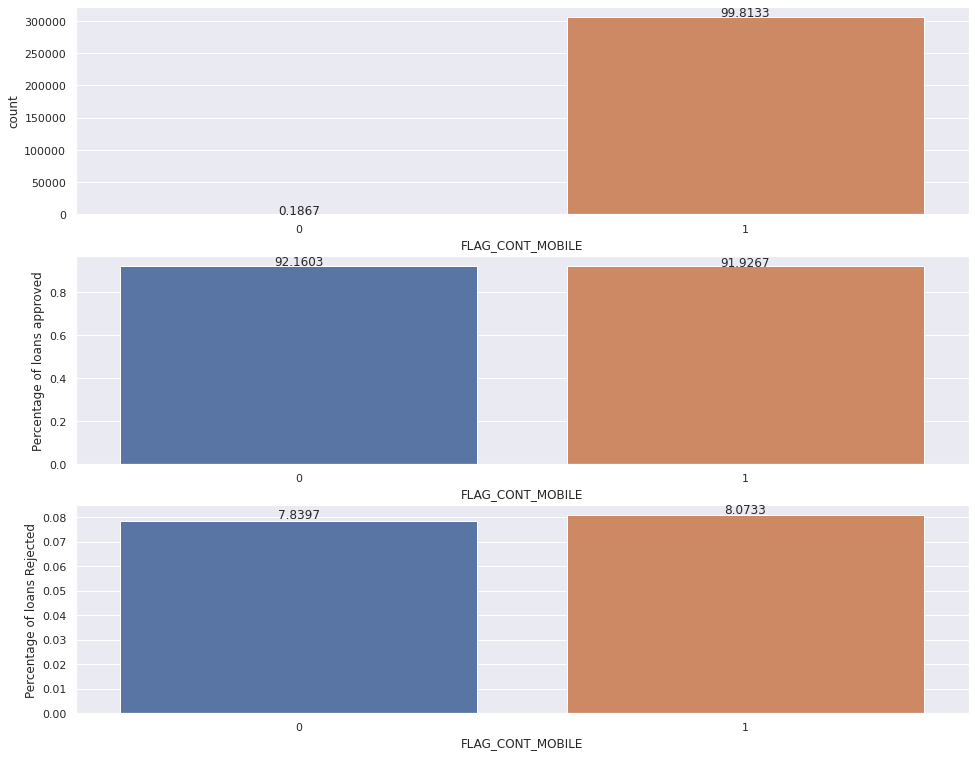

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_CONT_MOBILE')

Observations-

*   99.8 % of the loan applicant's mobile phone was reachable.
*   Acceptance and Rejection rate is almost same for both the cases.



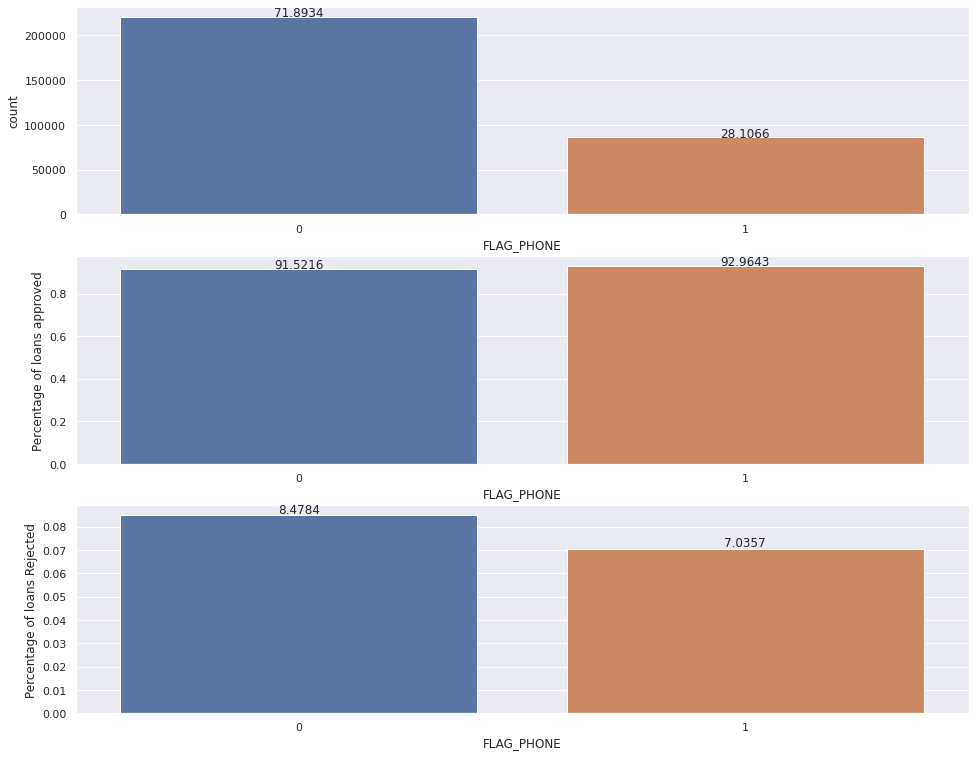

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_PHONE')

Observation-


*   72 % did not provided home phone number
*   Acceptance and Rejection rate is almost same for both the cases.



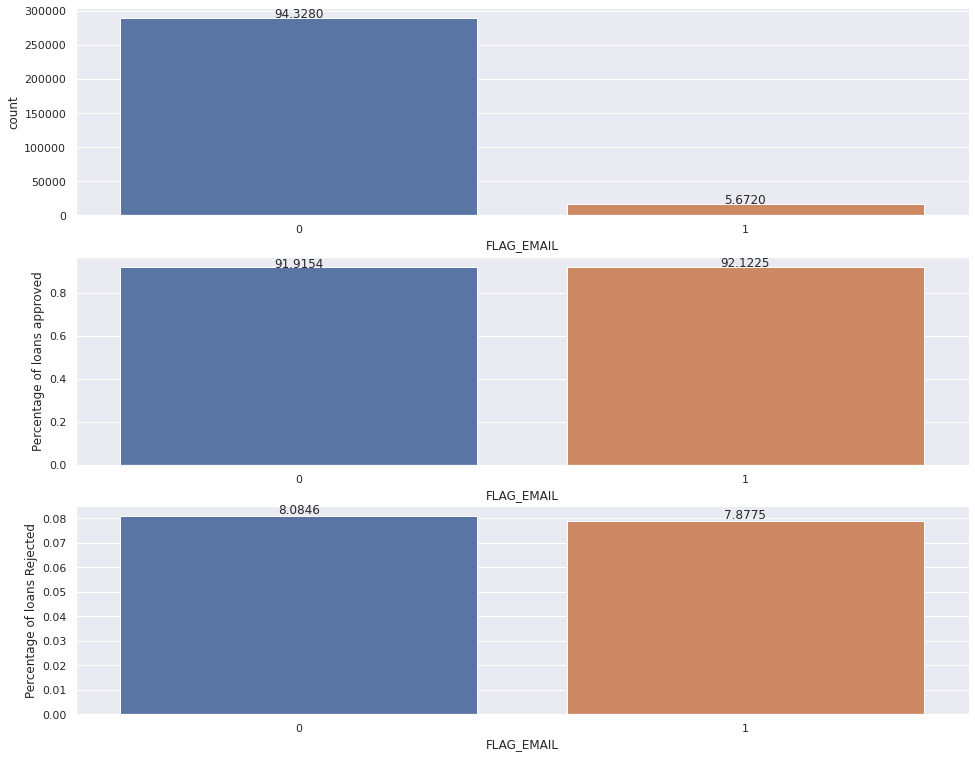

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_EMAIL')

Observation-

*   94 % of the loan applicant did not provided email address
*   Success and Rejection Rate is almost same.




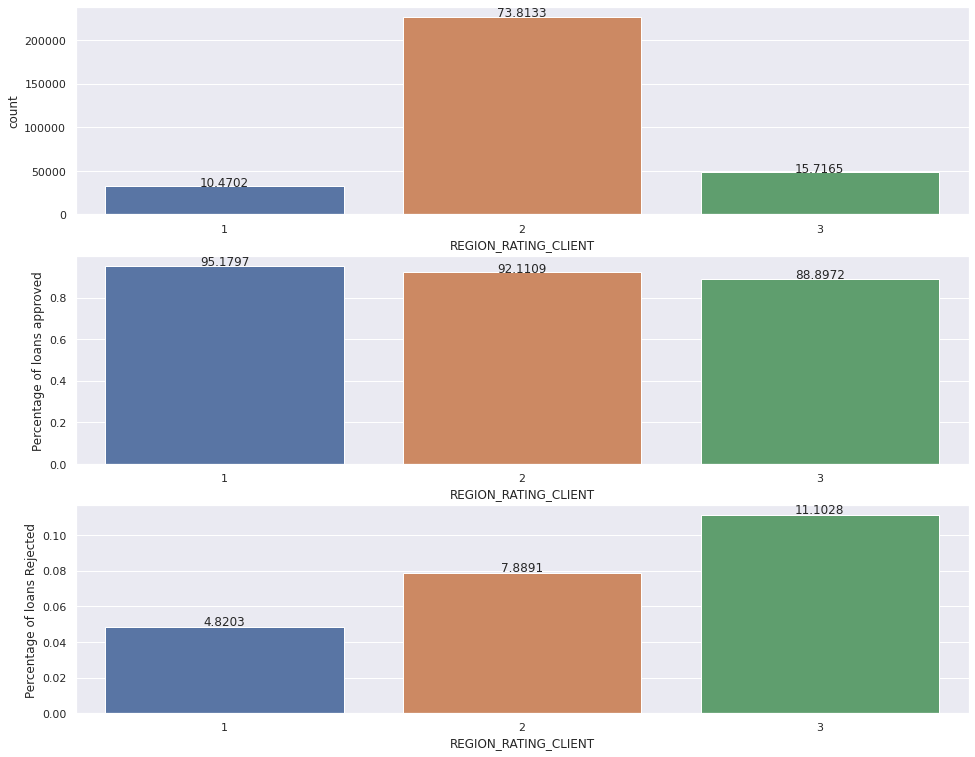

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'REGION_RATING_CLIENT')

Observations-

*    74 % of the loan applicant belongs to the region whose rating is 2(rating given by home credit for the region).
*    Although there is not a huge difference but typically applicant with lower rating has less percentage of loan rejection rate compared to higher rating regions. So this feature could be useful.

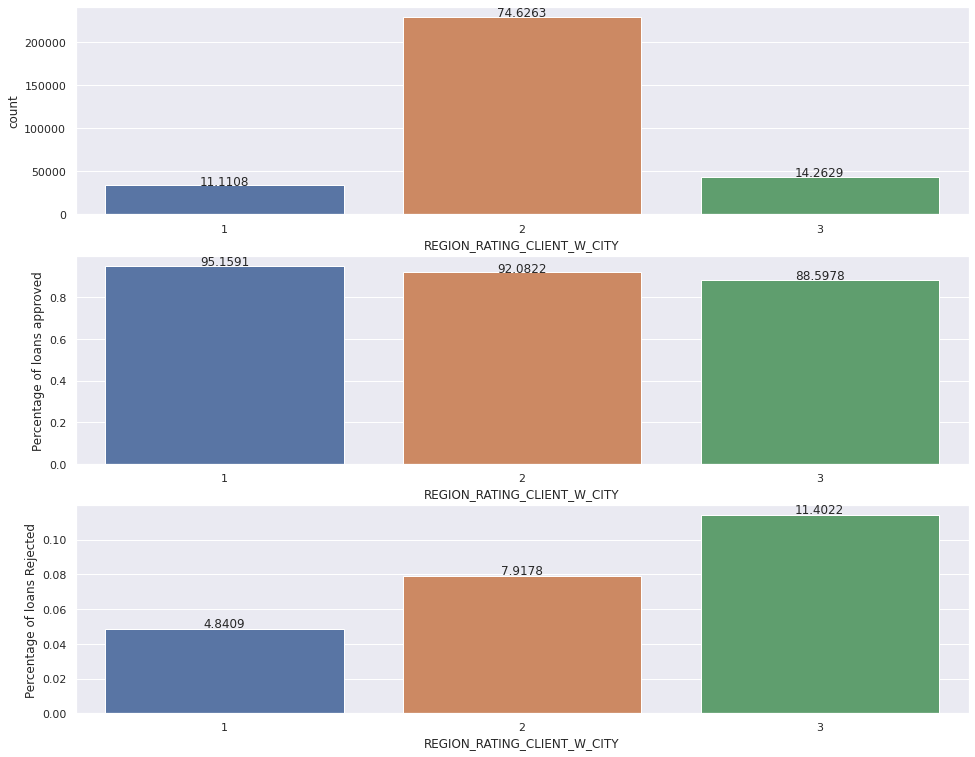

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'REGION_RATING_CLIENT_W_CITY')

Observations-

*    73 % of the loan applicant belongs to the region whose rating is 2(rating given by home credit for the region).
*    Although there is not a huge difference but typically applicant with lower rating has less percentage of loan rejection rate compared to higher rating regions. So this feature could be useful.

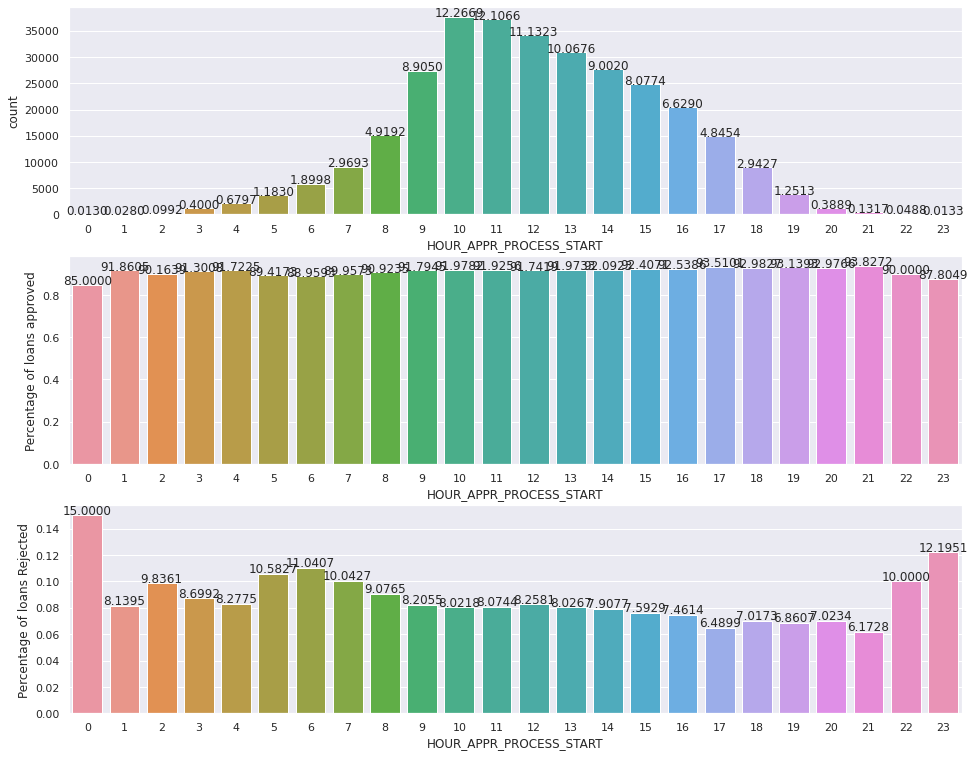

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'HOUR_APPR_PROCESS_START')

Check balance

Observations-

*    Most of the loan applicants applied between 9 AM and 6 PM(usual working hours).
*    There are higher rejection rate when loan applicant applied at 12:00 AM and 11:00 PM as compared to other timings.

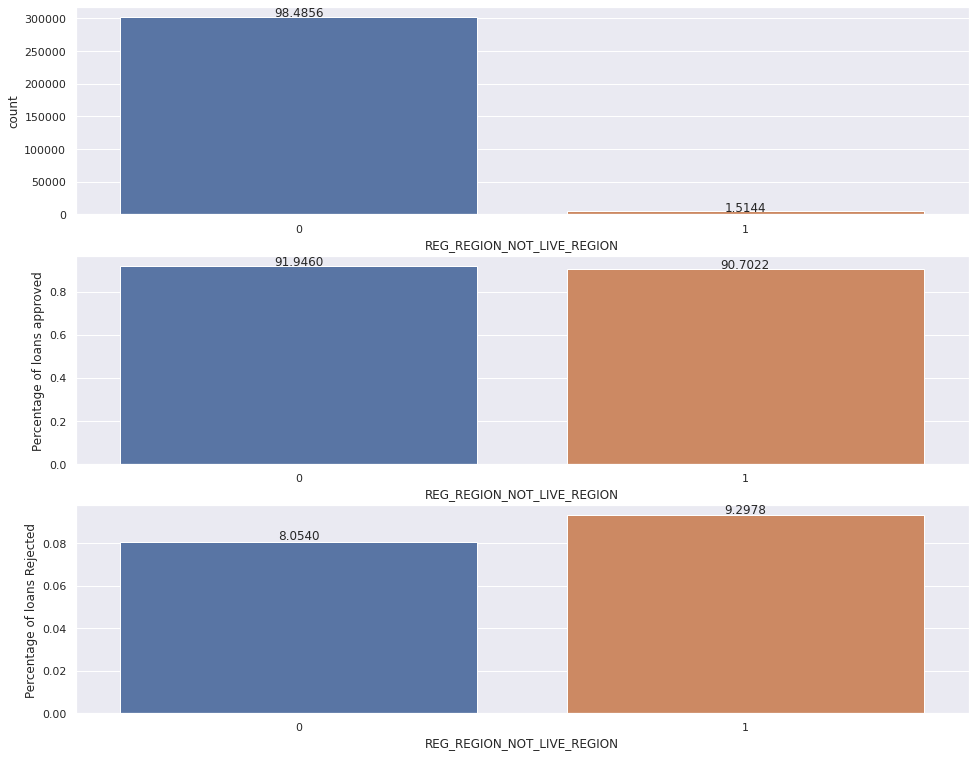

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'REG_REGION_NOT_LIVE_REGION')

Observation- 

*    Most of the loan applicant have same contact address and permanent address.
*    There is not much difference between Loan approval rate and Loan Rejection rate.

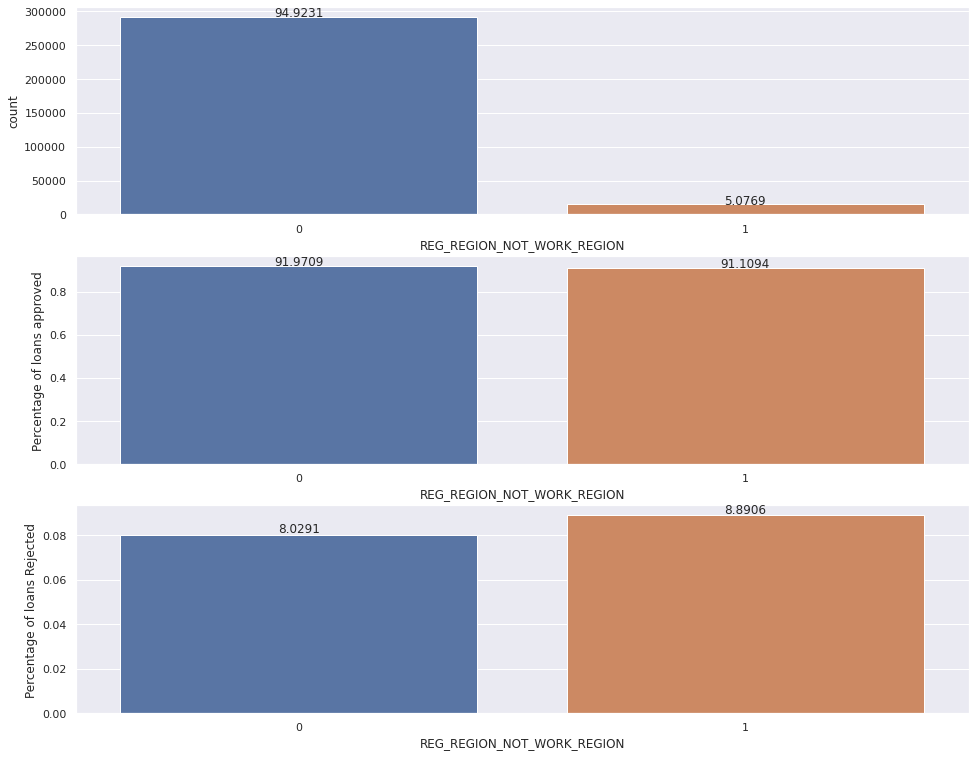

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'REG_REGION_NOT_WORK_REGION')

Observation- 

*    Most of the loan applicant have same work address and permanent address.
*    There is not much difference between Loan approval rate and Loan Rejection rate.

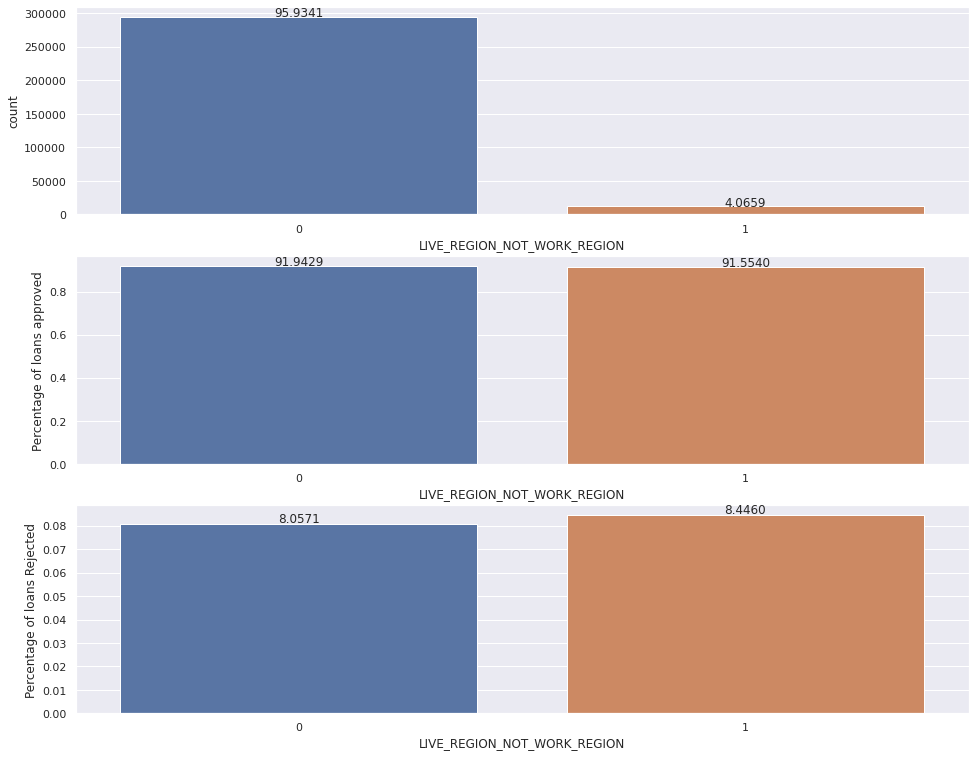

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'LIVE_REGION_NOT_WORK_REGION')

Observation- 

*    Most of the loan applicant have same work address and contact address.
*    There is not much difference between Loan approval rate and Loan Rejection rate.

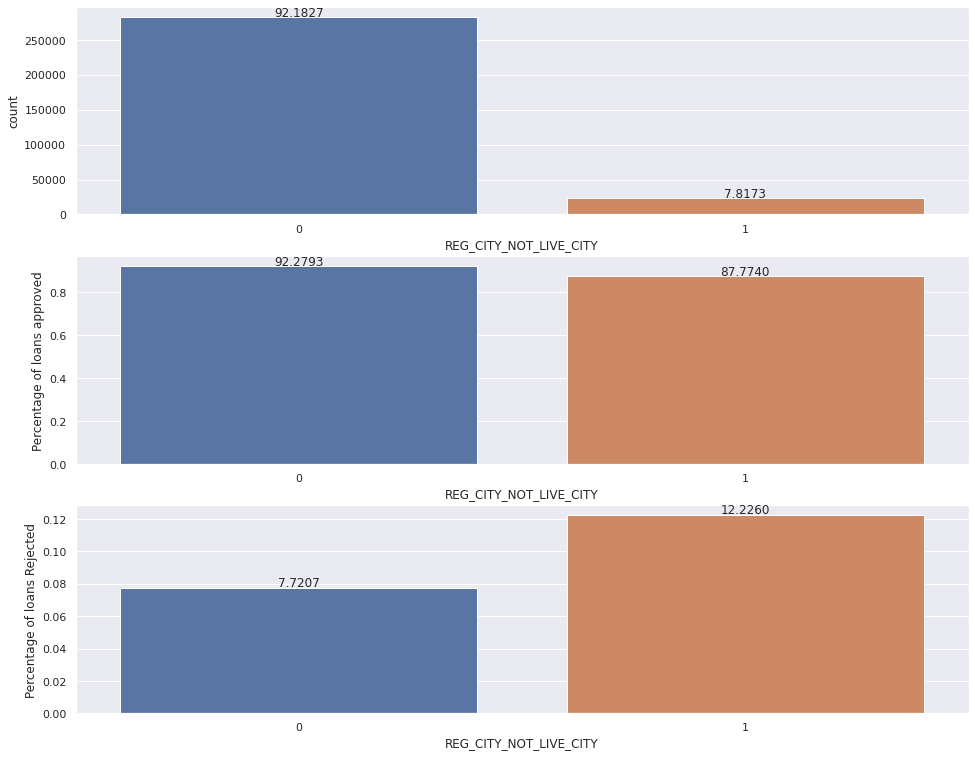

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'REG_CITY_NOT_LIVE_CITY')

Observations-

*    Majority(92 %) of the loan applicant have same contact address and permanent address at city level.

*    Loan applicant which have different contact address and permanent address at city level have higher Rejection rate compared to those applicants who have same.


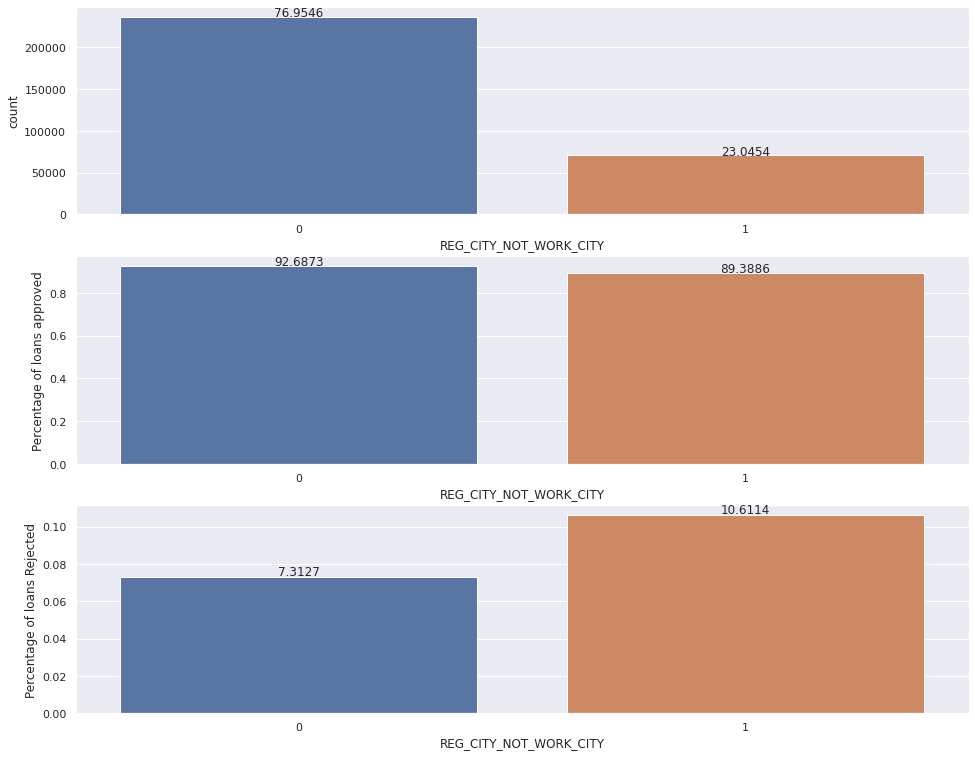

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'REG_CITY_NOT_WORK_CITY')

Observations-

*    Majority(76 %) of the loan applicant have same permanent address and work address at city level.

*    Loan applicant which have different work address and permanent address at city level have higher Rejection rate compared to those applicants who have same.

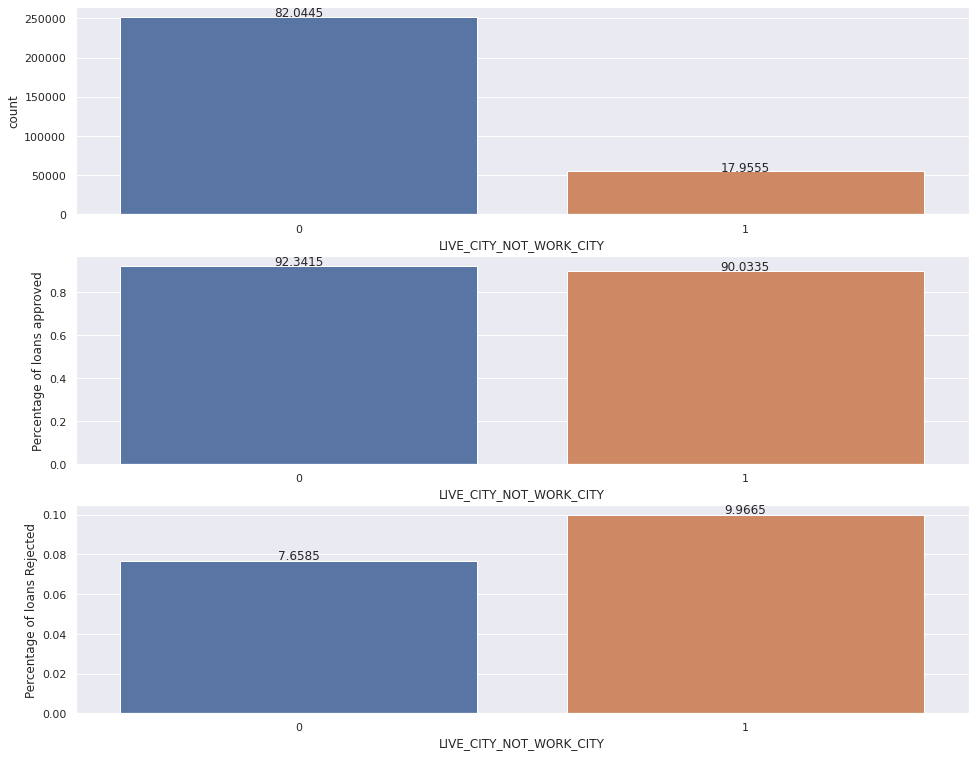

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'LIVE_CITY_NOT_WORK_CITY')

Observations-

*    Majority(82 %) of the loan applicant have same contact address and work address at city level.

*    Loan applicant which have different work address and contact address at city level have higher Rejection rate compared to those applicants who have same.





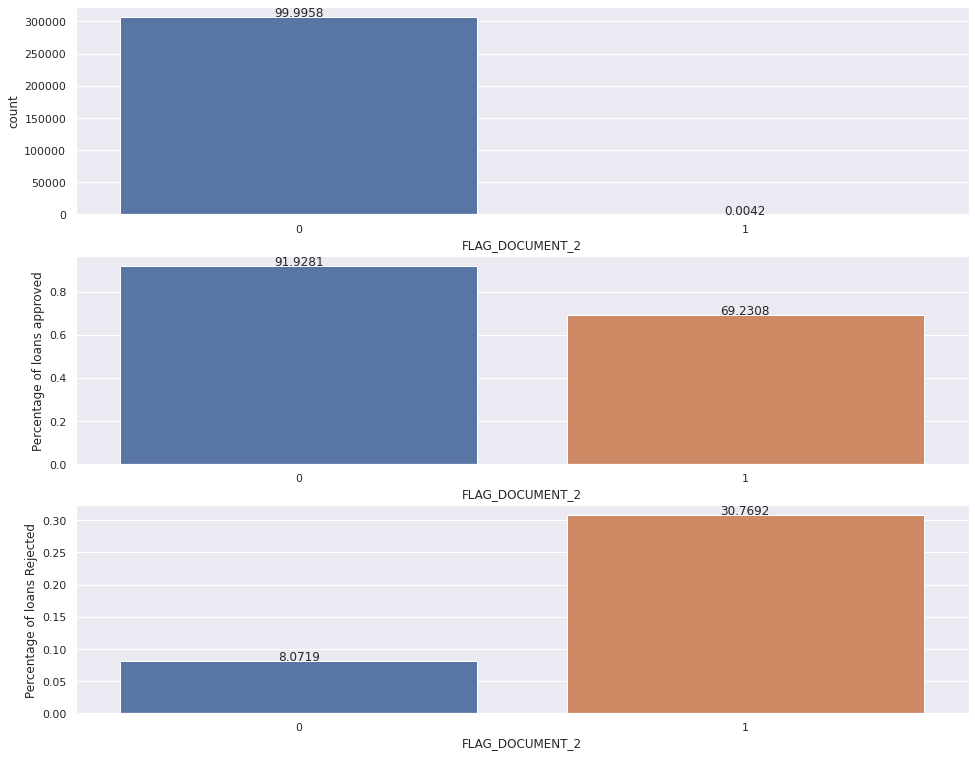

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_DOCUMENT_2')

Observation-

*    Most of the loan applicant provided Document 2.
*    Loan Applicant which did not provided the document 2 have higher Rejection Rate.

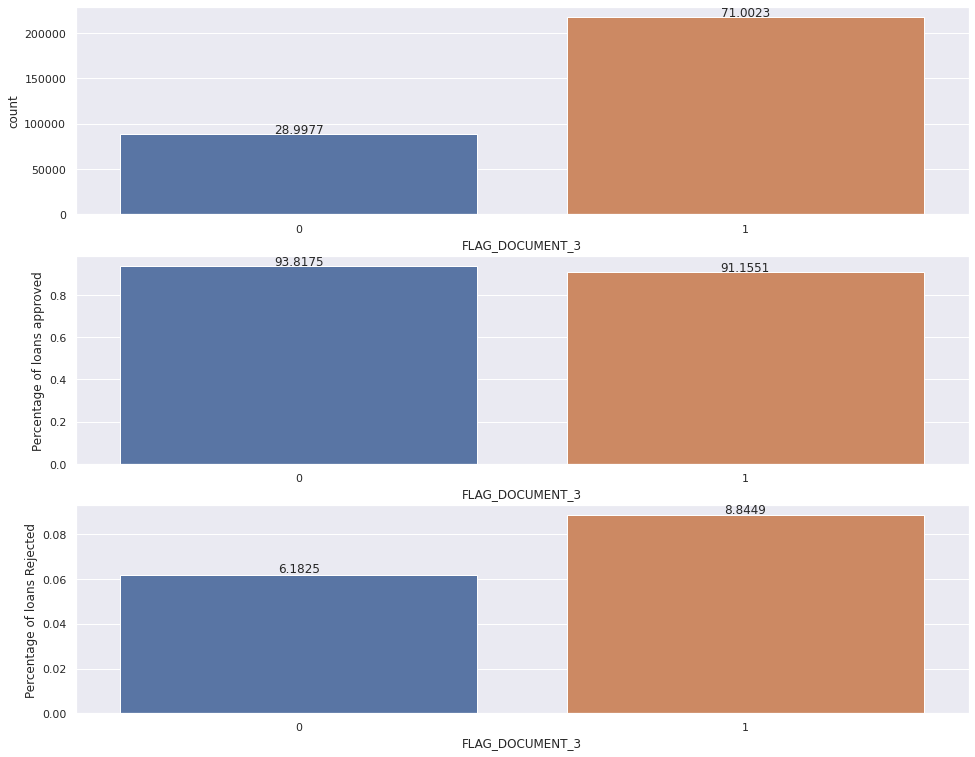

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_DOCUMENT_3')

Observation-

*    Majority(71%) of loan applicant did not provided the Document 3.
*    Those who provided the document 3 have slightly higher loan approval rate

#### For Continous Features

In [ ]:
# number of continous variables in main application table.
len(application_continous_col_list)

65

Now we will see the association of the continous variables with the target variable. Since there are 65 continous variable doing EDA for all the 65 features is very difficult, so we will train a simple logistic regression model and see the top 10 features that associates well with the Target variable(Loan approved or not).

In [ ]:
top_k_features=top_k_features_for_EDA(10,application_continous_col_list,application_train_df)

100%|██████████| 65/65 [04:12<00:00,  3.89s/it]


In [ ]:
top_k_features

array(['EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1',
       'DAYS_LAST_PHONE_CHANGE', 'YEARS_BEGINEXPLUATATION_MODE',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MEDI',
       'AMT_REQ_CREDIT_BUREAU_DAY'], dtype='<U28')

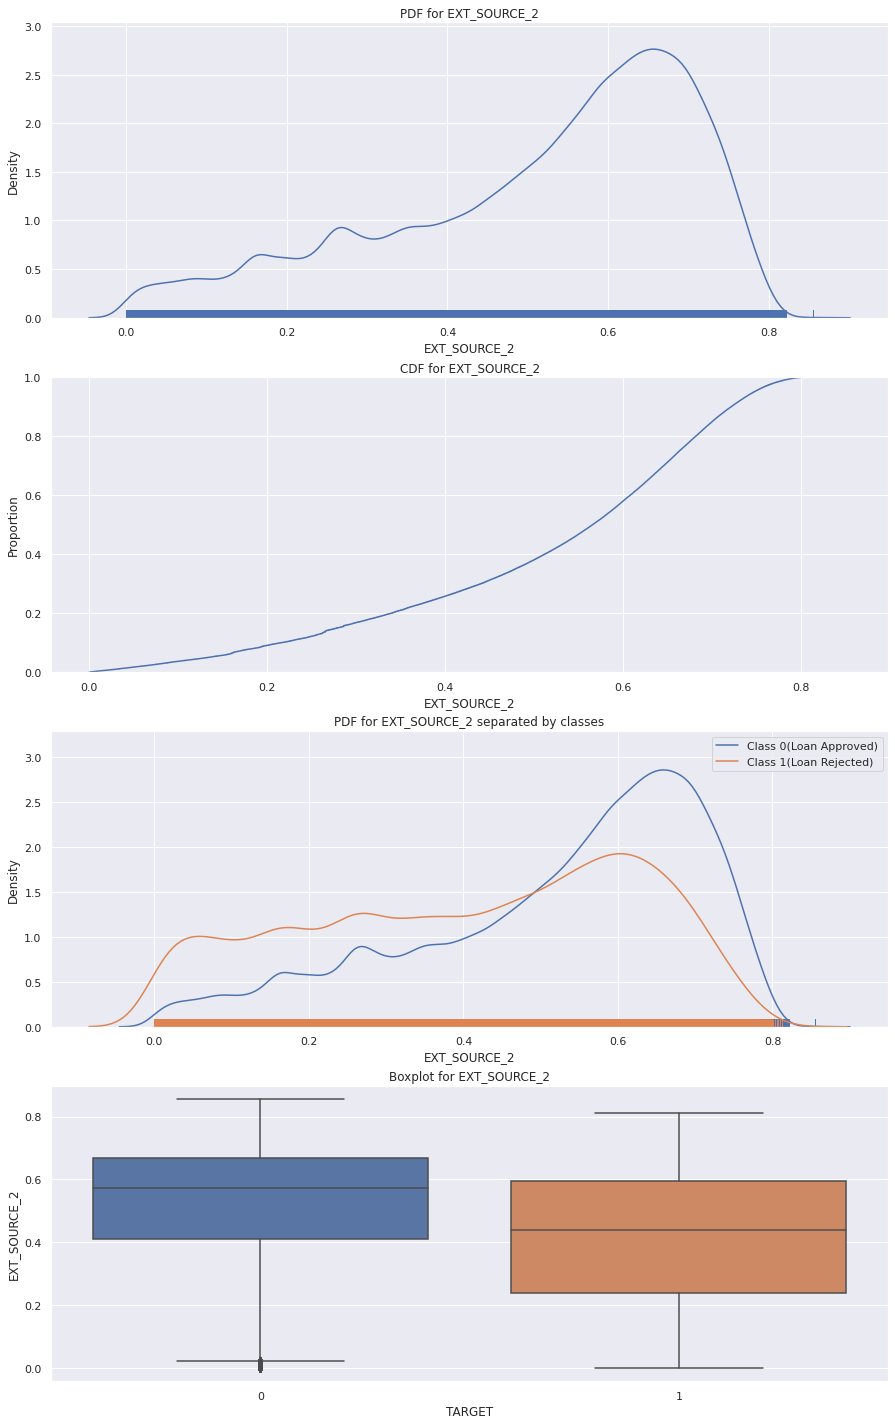

In [ ]:
plot_distribution_continous(application_train_df,'EXT_SOURCE_2')

Observation-


*   Applicants whose loans are approved have higher EXT_SOURCE_2 score.
*   60 % percent loan applicant have EXT_SOURCE_2 greater than 0.5.



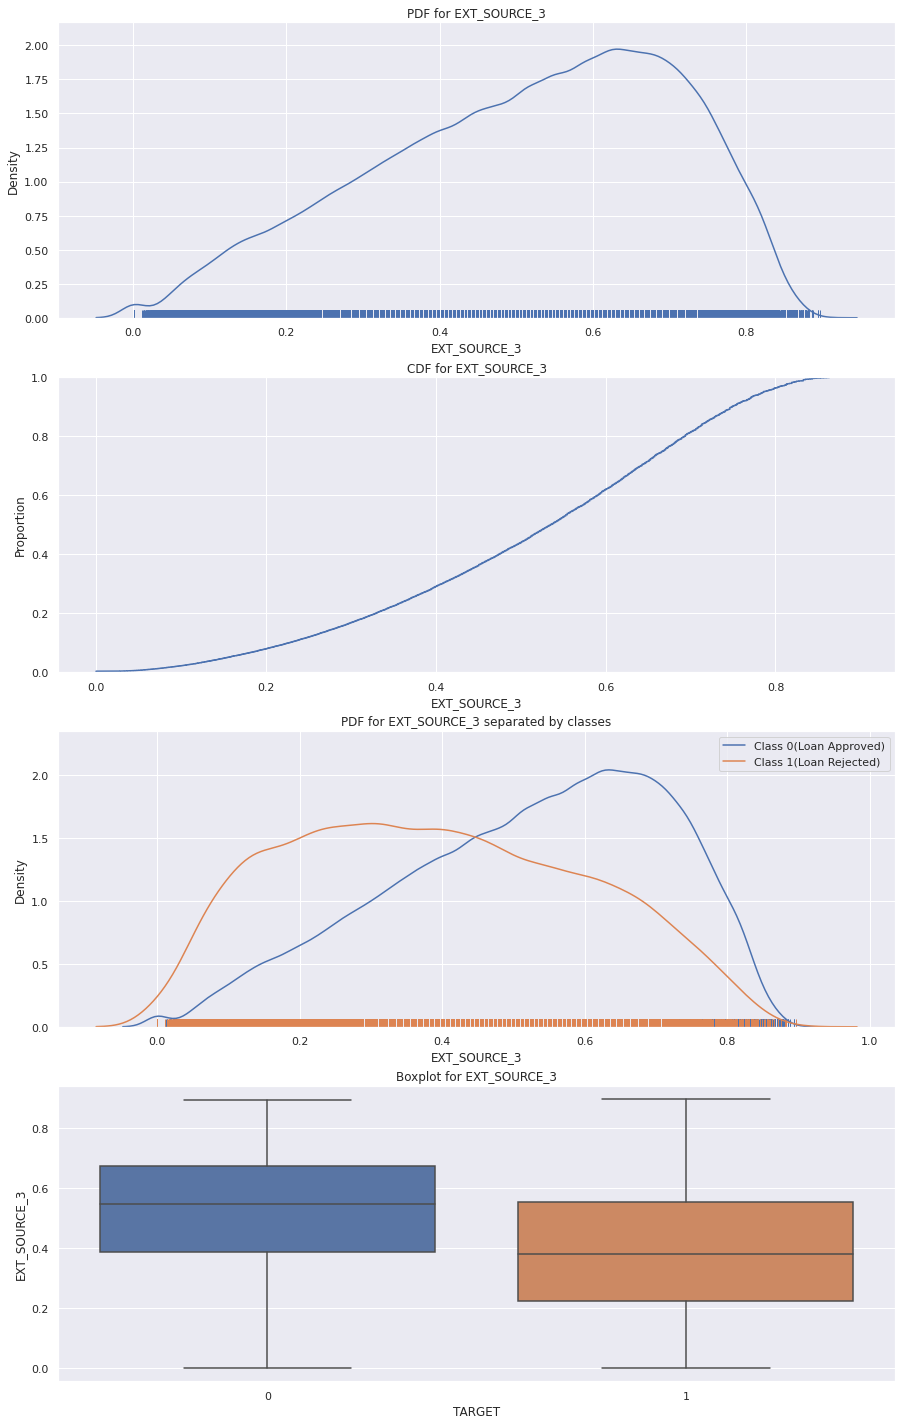

In [ ]:
plot_distribution_continous(application_train_df,'EXT_SOURCE_3')

Observation-


*   Applicants whose loans are approved have higher EXT_SOURCE_3 score.
*   55 % percent loan applicant have EXT_SOURCE_2 greater than 0.5.

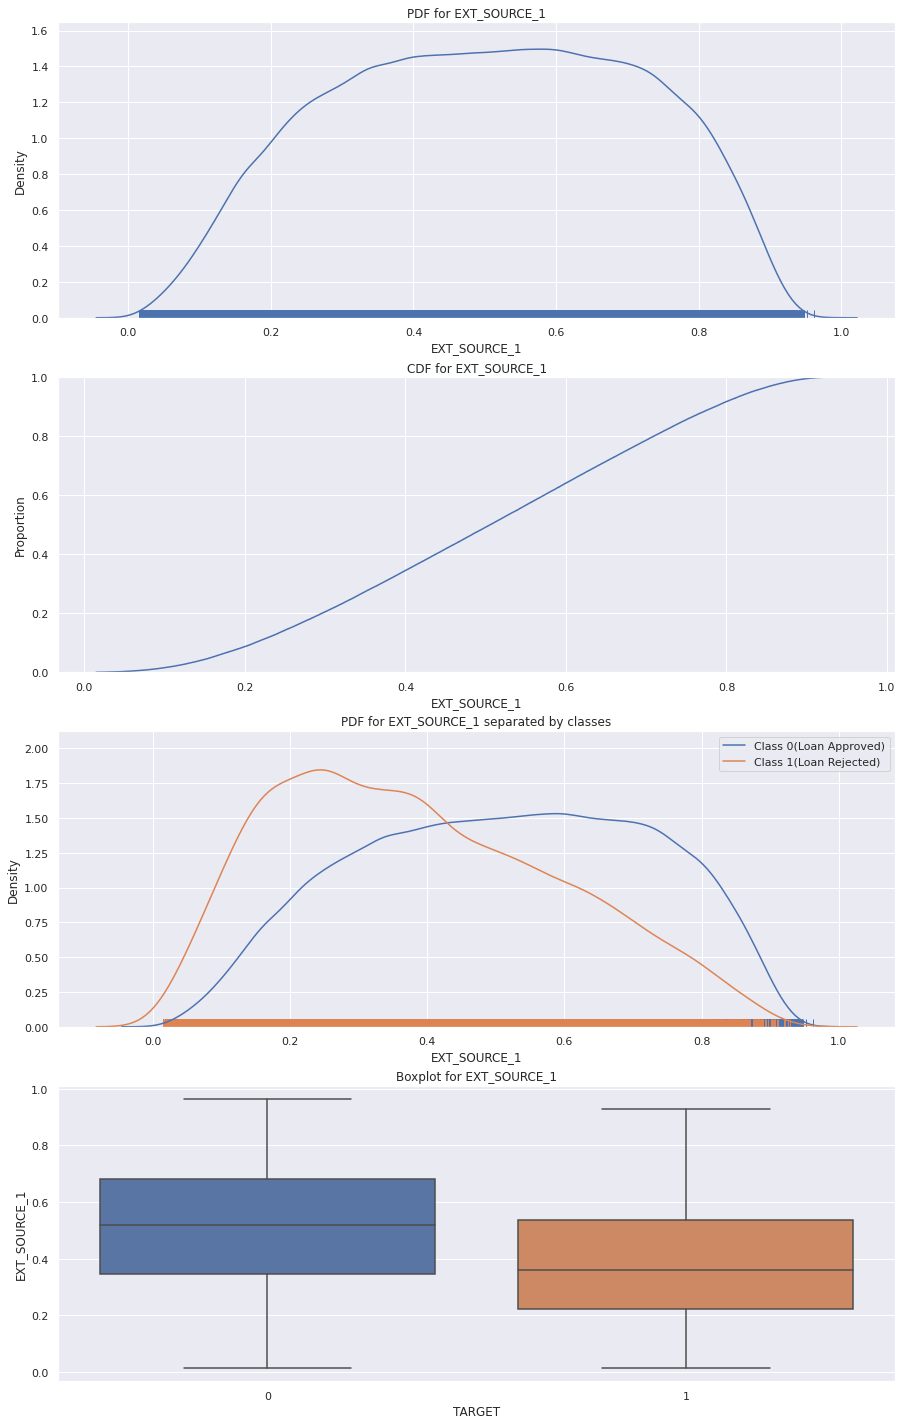

In [ ]:
plot_distribution_continous(application_train_df,'EXT_SOURCE_1')

Observation-


*   Applicants whose loans are approved have higher EXT_SOURCE_1 score.
*   55 % percent loan applicant have EXT_SOURCE_1 greater than 0.5.

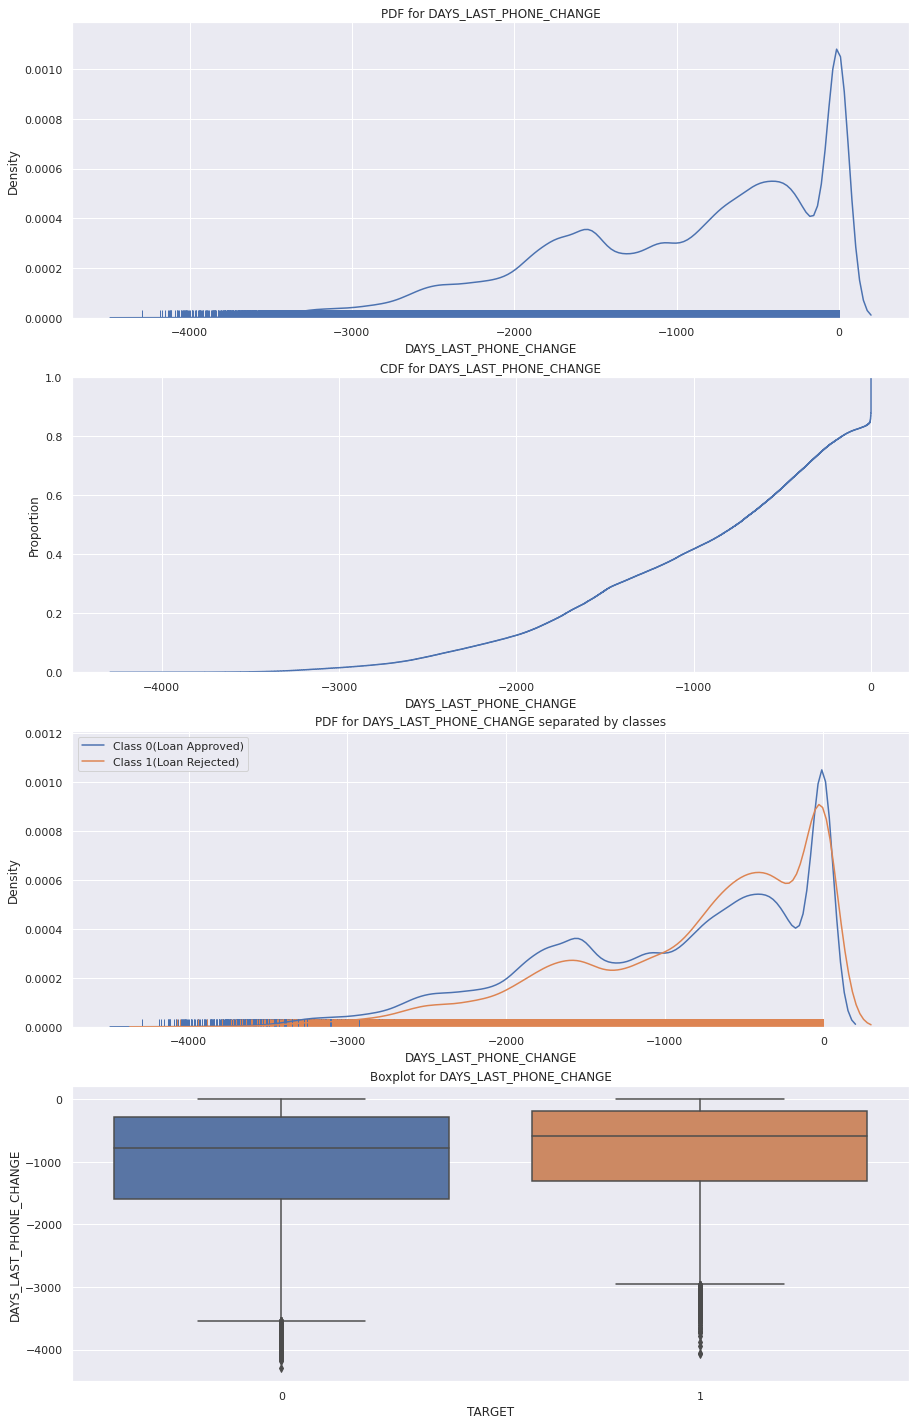

In [ ]:
plot_distribution_continous(application_train_df,'DAYS_LAST_PHONE_CHANGE')

Observation-
*    There are more loan Applicant who changed the phone number recently(higher density).

*    There is not much class separation. Distribution in case of both the class is almost same.

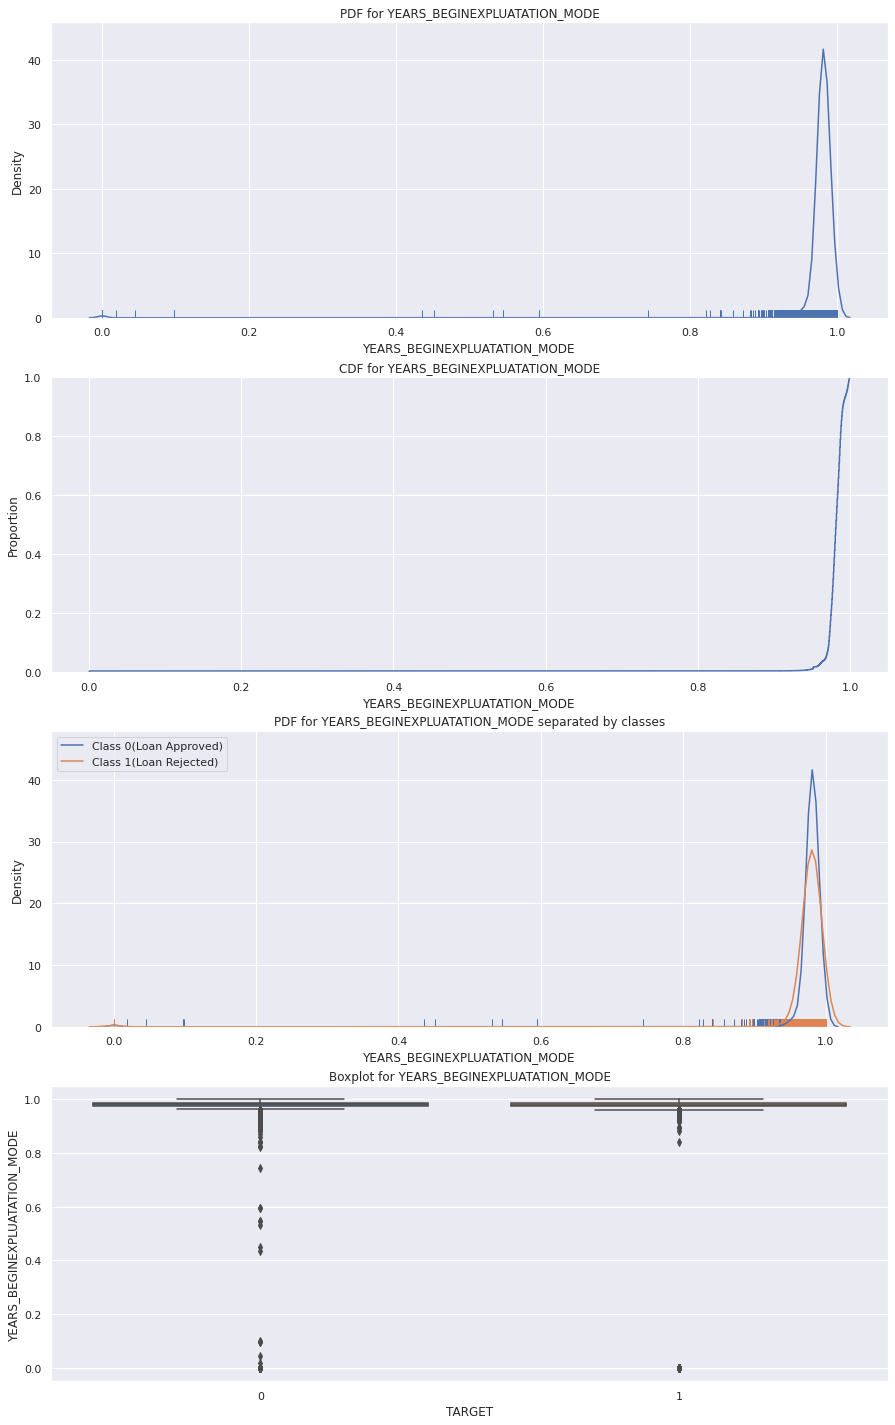

In [ ]:
plot_distribution_continous(application_train_df,'YEARS_BEGINEXPLUATATION_MODE')

Observations-

*    Plots are not much interpretable since most of the values lies around 1 with some outliers.
*    But these outliers can be useful as we can see in the plot number 3 most of the outliers belong to class 0(loan approved).

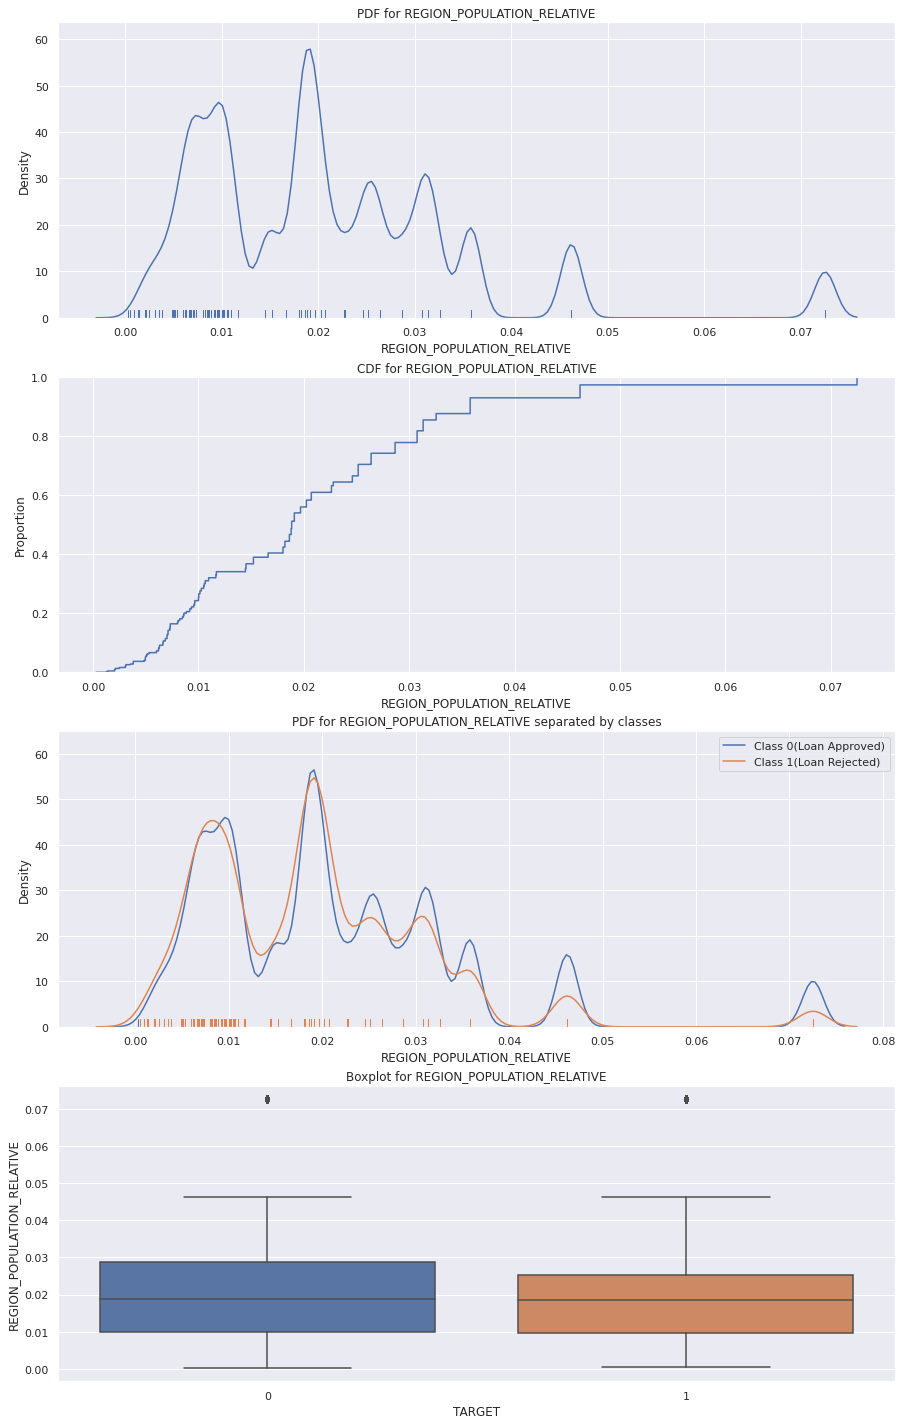

In [ ]:
plot_distribution_continous(application_train_df,'REGION_POPULATION_RELATIVE')

Observations-

*    There are more loan applicant from low populated areas relative to higher populated Areas.

* There is no class separation. Distribution is almost similar in both the classes.

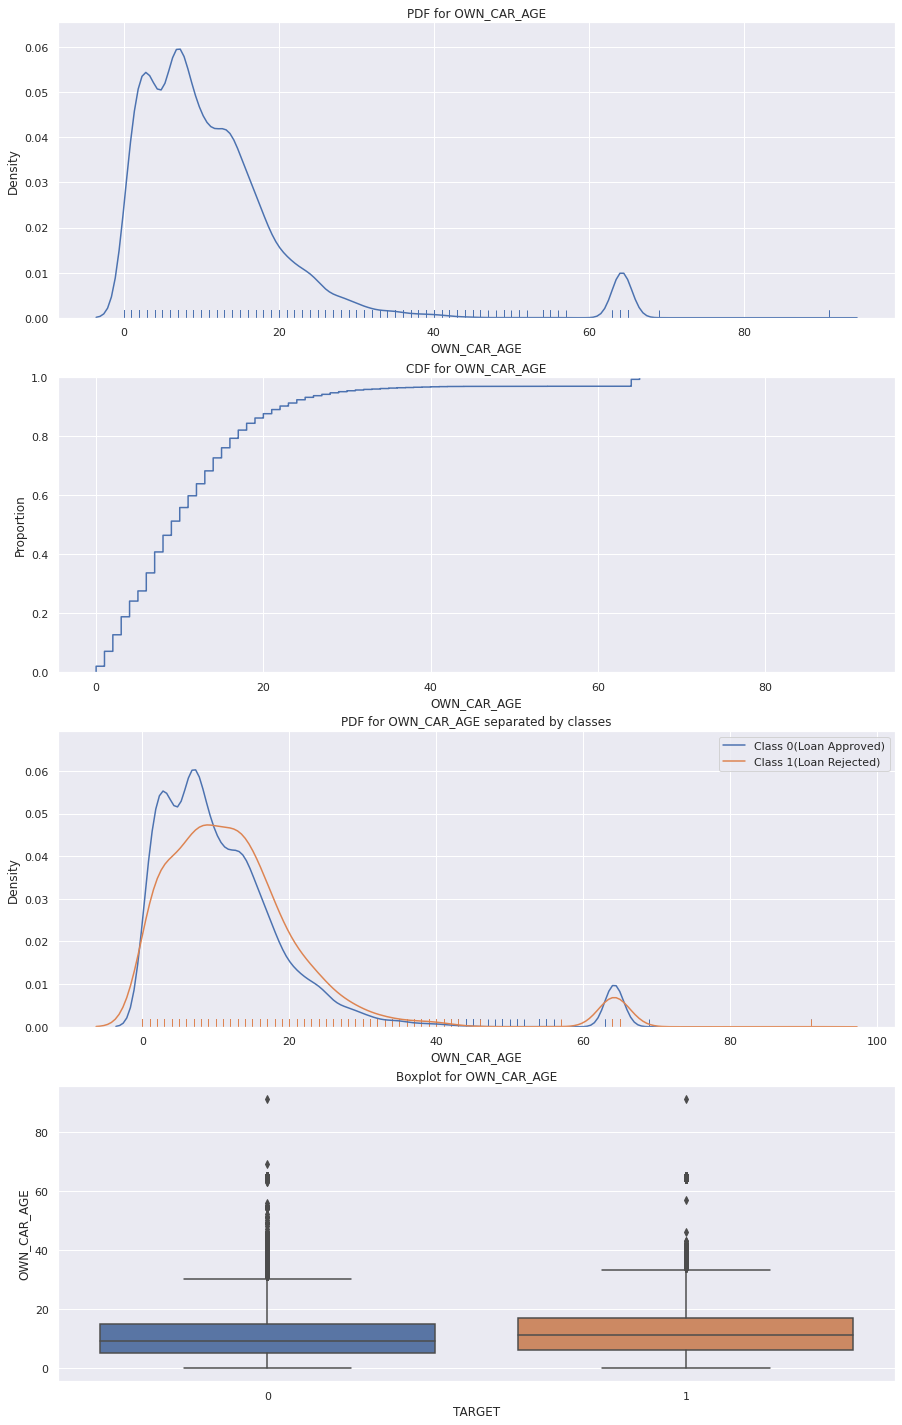

In [ ]:
plot_distribution_continous(application_train_df,'OWN_CAR_AGE')

Observations-

*    90 % of loan applicants own cars which are less than 20 years old.
*    There are few loan applicants whose cars are close to 100 years old.
*    Not much class separation. Distribution is almost similar for both the classes.

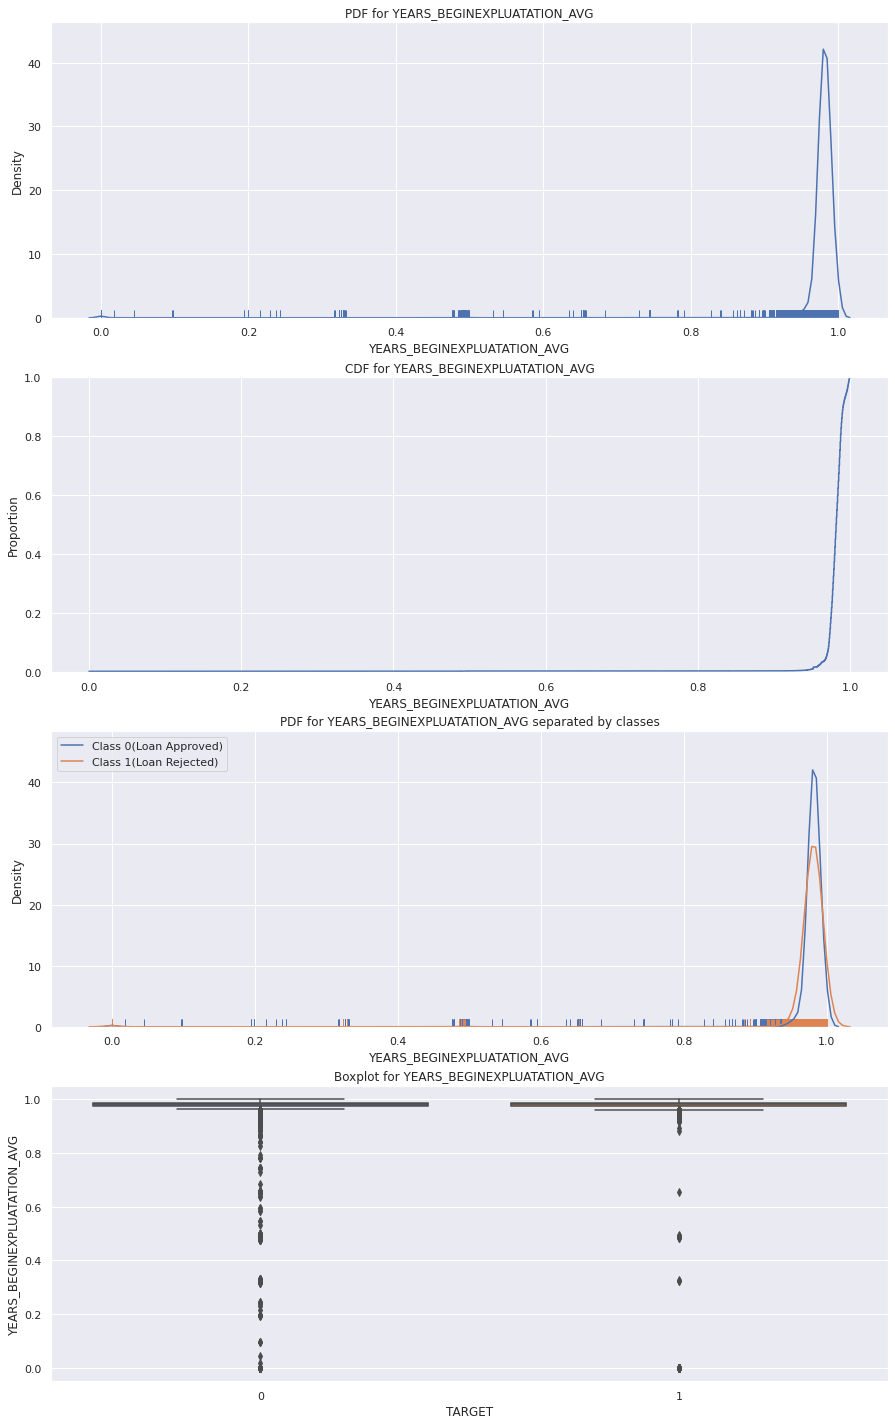

In [ ]:
plot_distribution_continous(application_train_df,'YEARS_BEGINEXPLUATATION_AVG')

Observations-

*    Plots are not much interpretable since most of the values lies around 1 with some outliers.
*    But these outliers can be useful as we can see in the plot number 3 most of the outliers belong to class 0(loan approved).

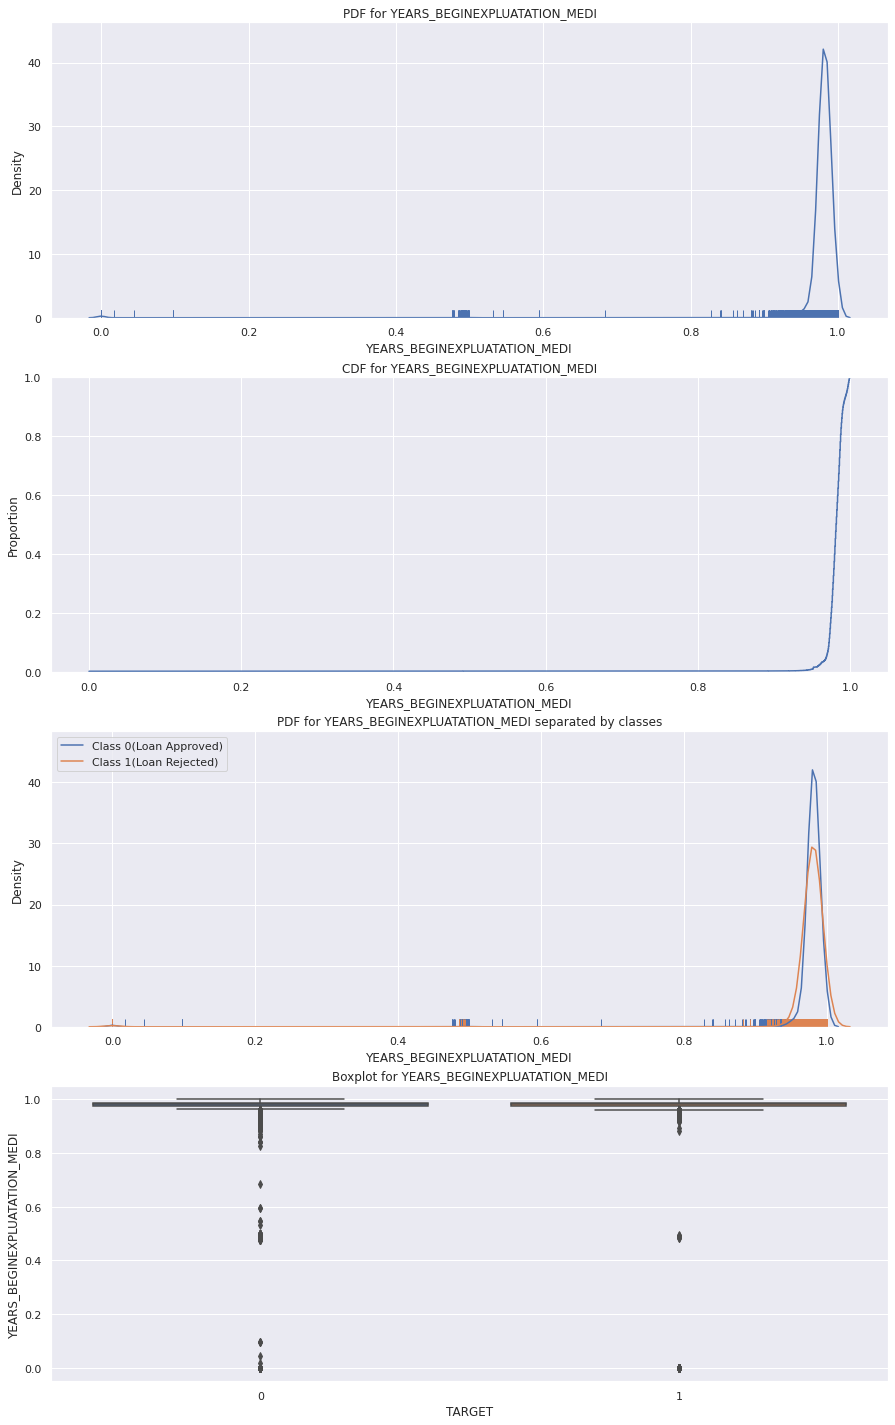

In [ ]:
plot_distribution_continous(application_train_df,'YEARS_BEGINEXPLUATATION_MEDI')

Observations-

*    Plots are not much interpretable since most of the values lies around 1 with some outliers.
*    But these outliers can be useful as we can see in the plot number 3 most of the outliers belong to class 0(loan approved).

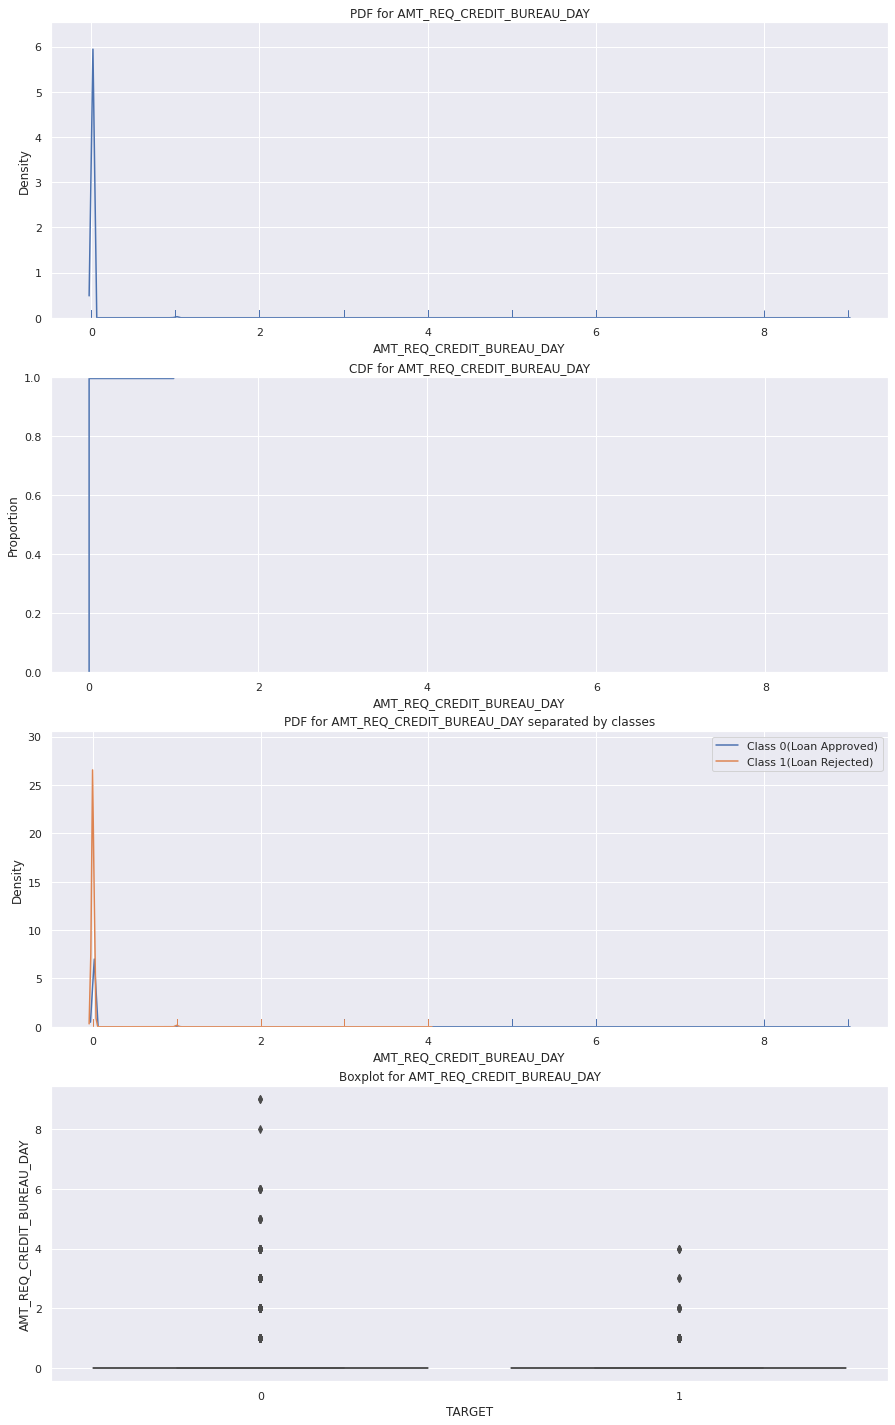

In [ ]:
plot_distribution_continous(application_train_df,'AMT_REQ_CREDIT_BUREAU_DAY')

Observation-

*    Plots are not much interpretable since almost all the loan applicant has zero enquiries from the credit bureau(one day before loan application).

* There are few outliers but we cannot remove them since these outliers can be deciding factor for our classification tasks. For example- Applicant having enquiries from credit beureau greter than zero(outlier) might have higher probability of defaulting.

#### For Categorical Features

In [ ]:
application_categorical_col_list

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

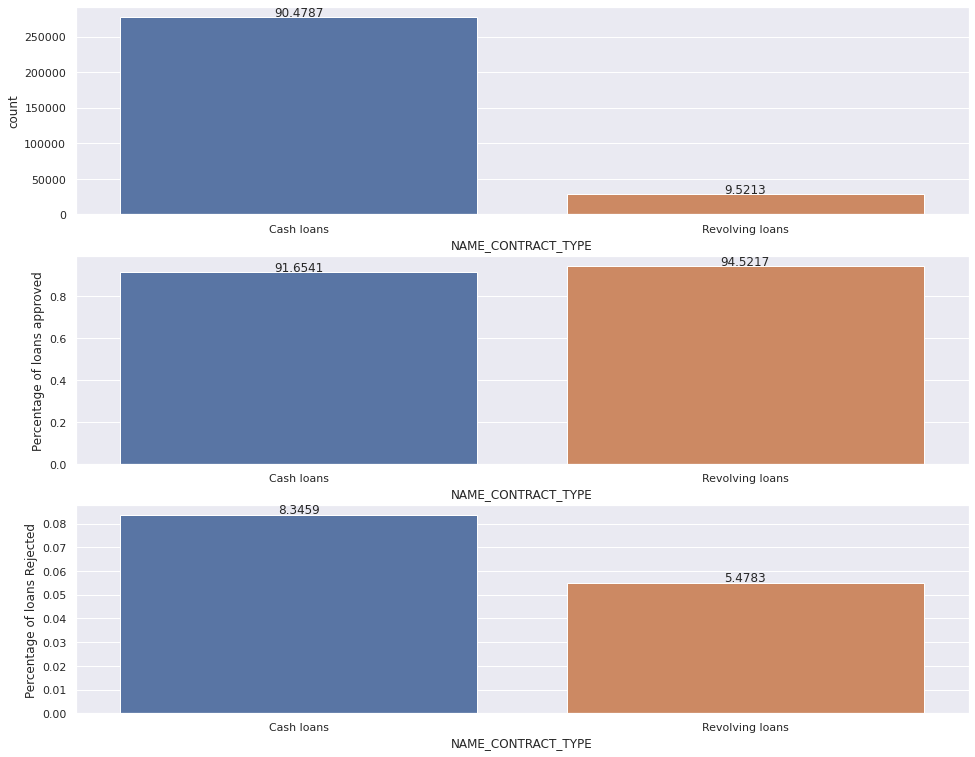

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'NAME_CONTRACT_TYPE')

Observation-

*    Majority(90%) of the loan applicants applied for Cash loans.
*    Cash loans have slightly higher rejection rate than revolving Loan, hence this could be useful feature for classifcation.

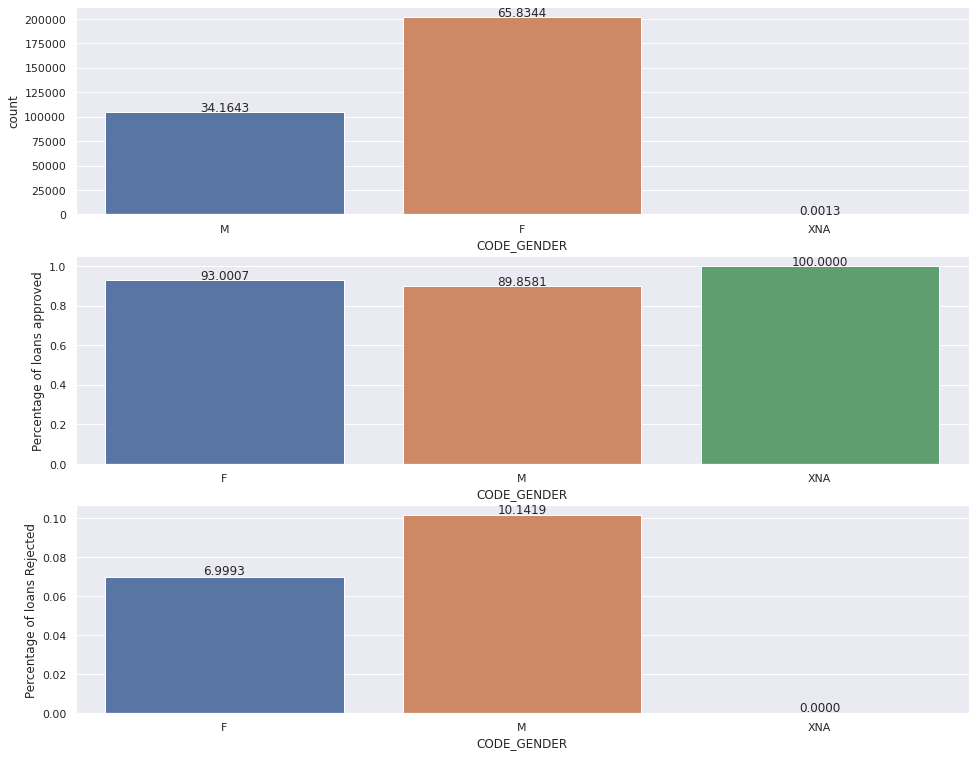

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'CODE_GENDER')

Observation-

*    Majority(65%) of loan applicants are females.
*    Females have slightly higher rejection rate than other gender, hence this coud be useful feature for classification.

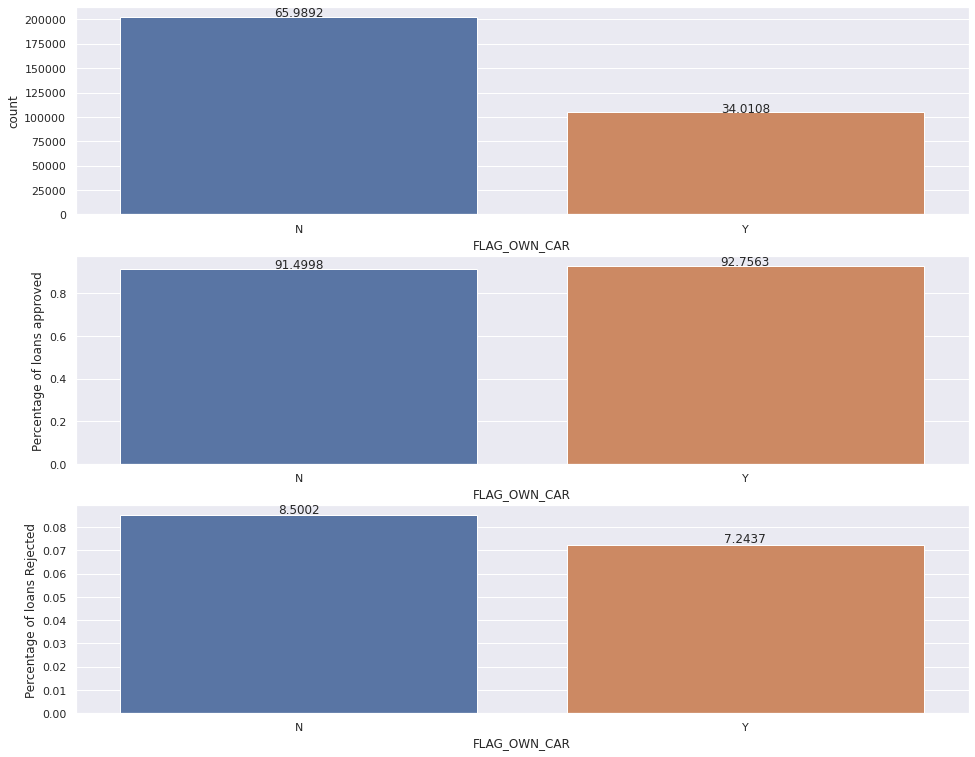

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_OWN_CAR')

Observation-

*    Majority(65%) of the loan applicant does not own car.
*    Loan applicant who does not own a car have slightly higher Loan rejection Rate than applicants which owns a car, hence this could be useful feature.

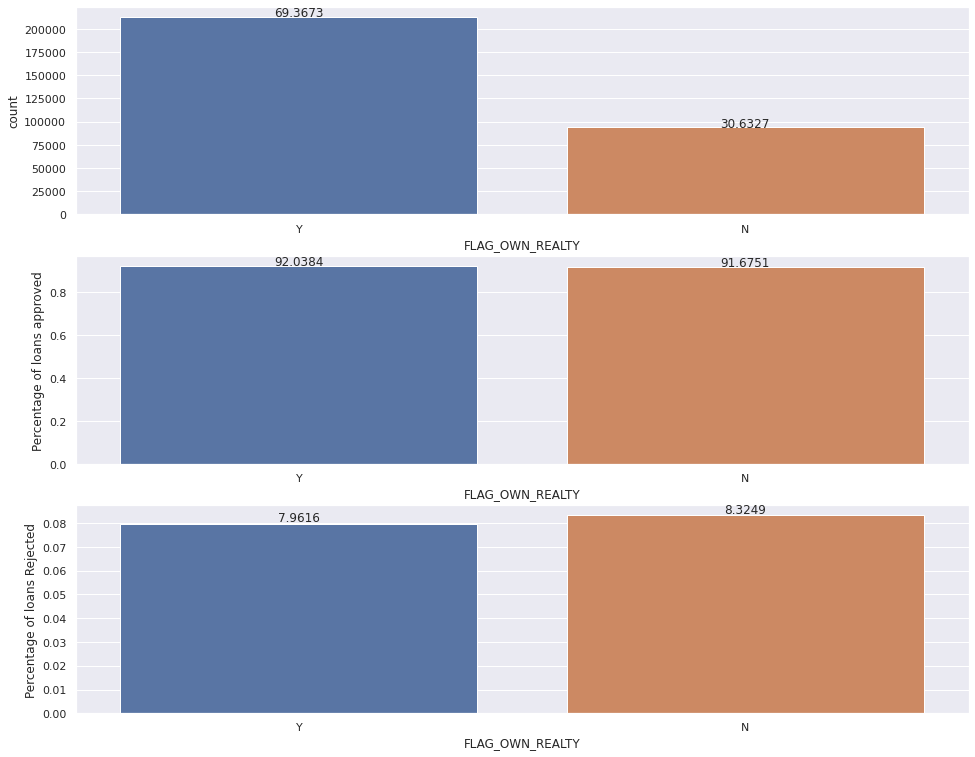

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'FLAG_OWN_REALTY')

Observation-

*    Majority(69%) of loan applicant does not own flat or house.
*    Approval and Rejection rate is alost same in both the cases.

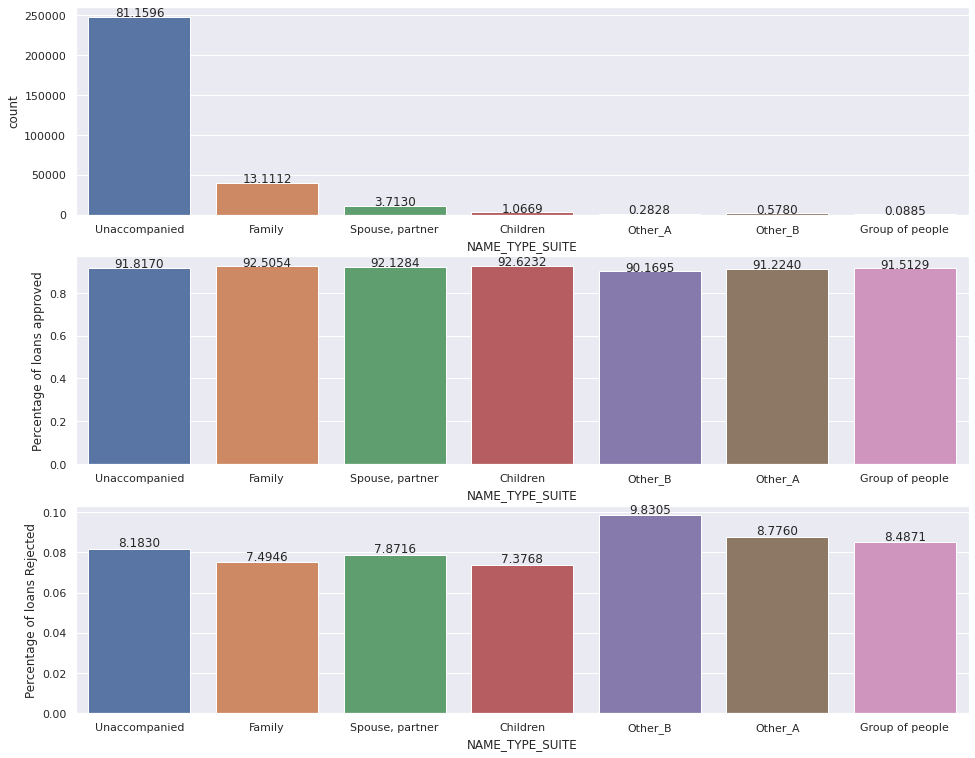

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'NAME_TYPE_SUITE')

Observations-

*    Majority(81%) of loan applicant were unaccompanied at the time of loan applications.
*    There is not major difference between Loan Approval rate with the change in NAME_TYPE_SUITE

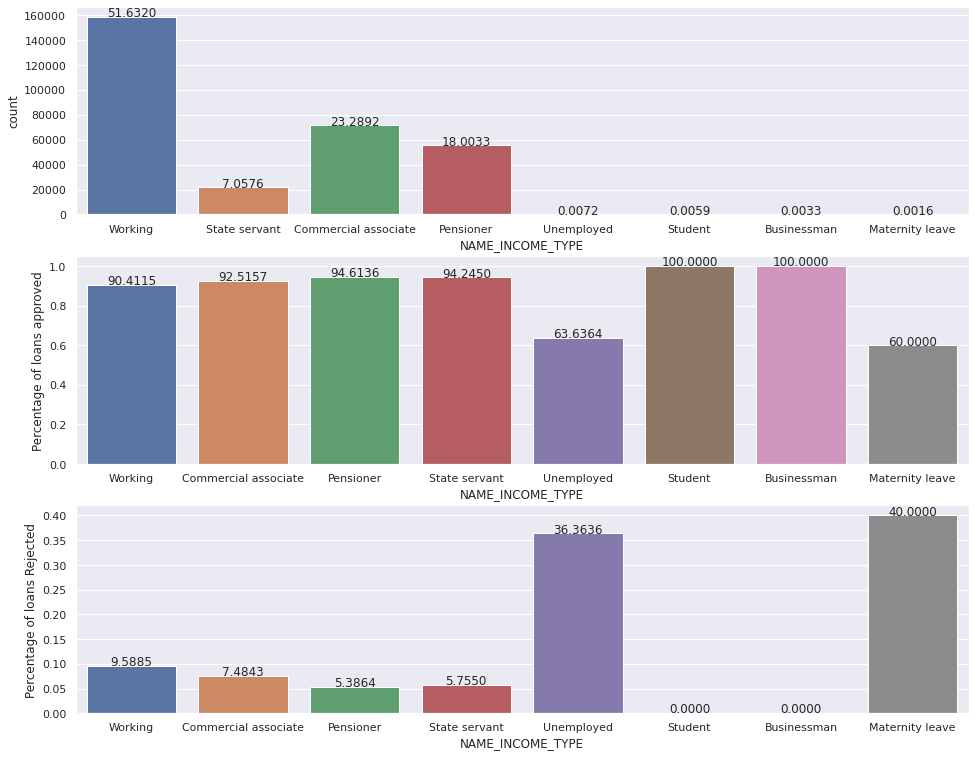

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'NAME_INCOME_TYPE')

Observations-
*    More than 50% of the loan applicant are working.
*    Most of the categories have high loan approval rate except the loan applicant who are unemployed or on maternity leaves. 
*    Students and businessman have 100% loan apporval rate although data available is also very less for both these categories.
*    There is lot of variability among different features and hence this feature can be useful for classification.

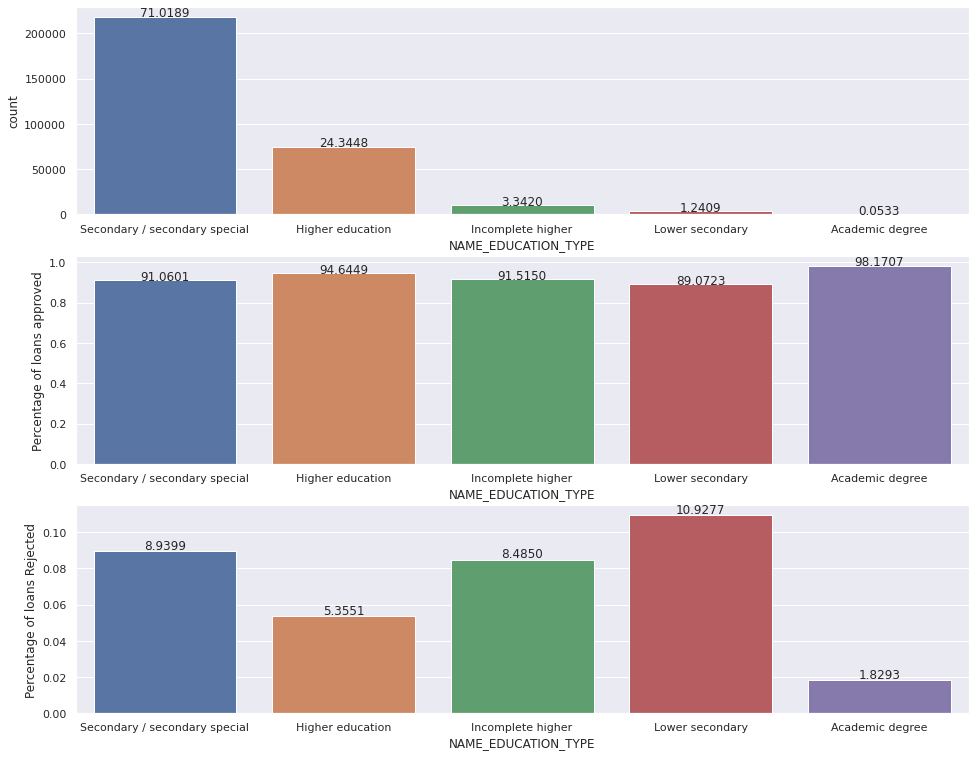

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'NAME_EDUCATION_TYPE')

Observation-

*    Loan applicant with higher education and academic degree have slightly lesser rejection rate as compared to other categories.
*    There is some variability among the feature so this could be useful feature for classification.

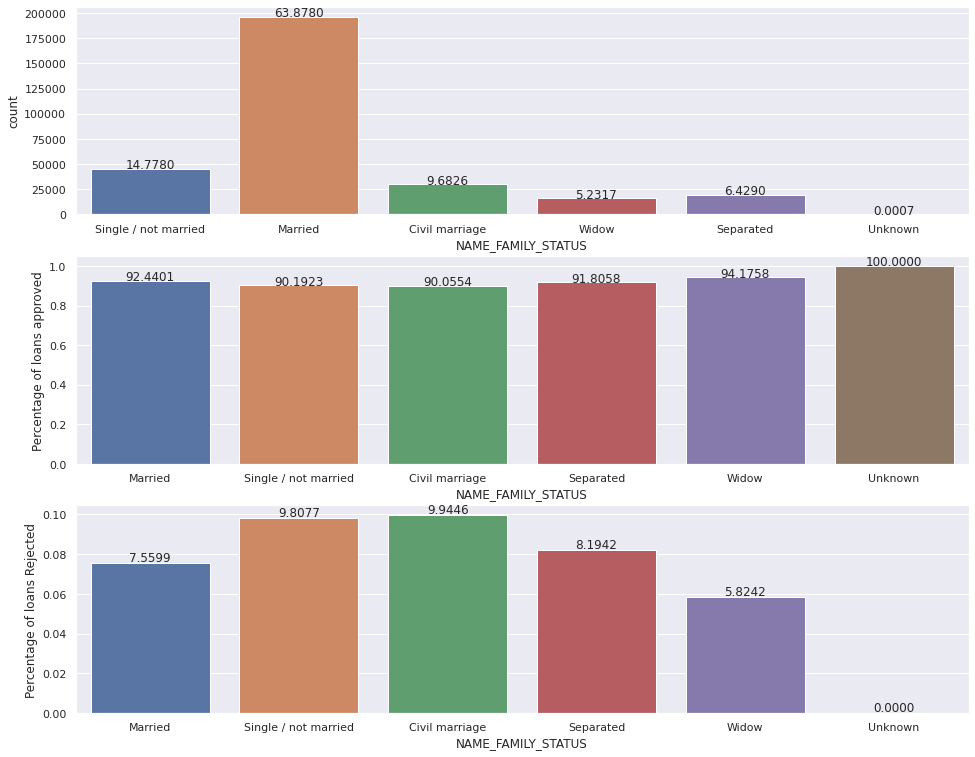

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'NAME_FAMILY_STATUS')

Observation-

*    Majority(63%) of loan applicants are married.
*    There is not huge difference in loan approval and rejection rate among different categories except the "unknown" category where loan rejection rate is 0%, But data avialable for unknown category is also very less, so this could be just conincidence also.

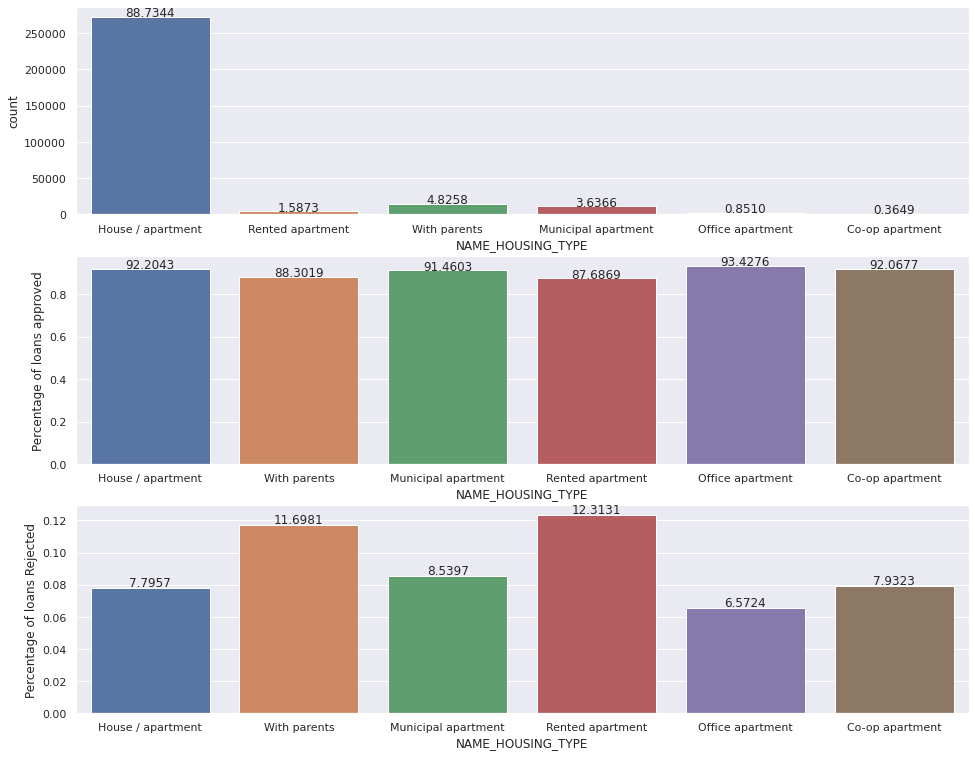

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'NAME_HOUSING_TYPE')

Observation-

*    Majority(88%) of the loan applicant have their own apartment.
*    Those loan appplicant who lives in rented appartment or who lives with their parents have slightly higher Rejection rate, hence this feature could be useful for classification.

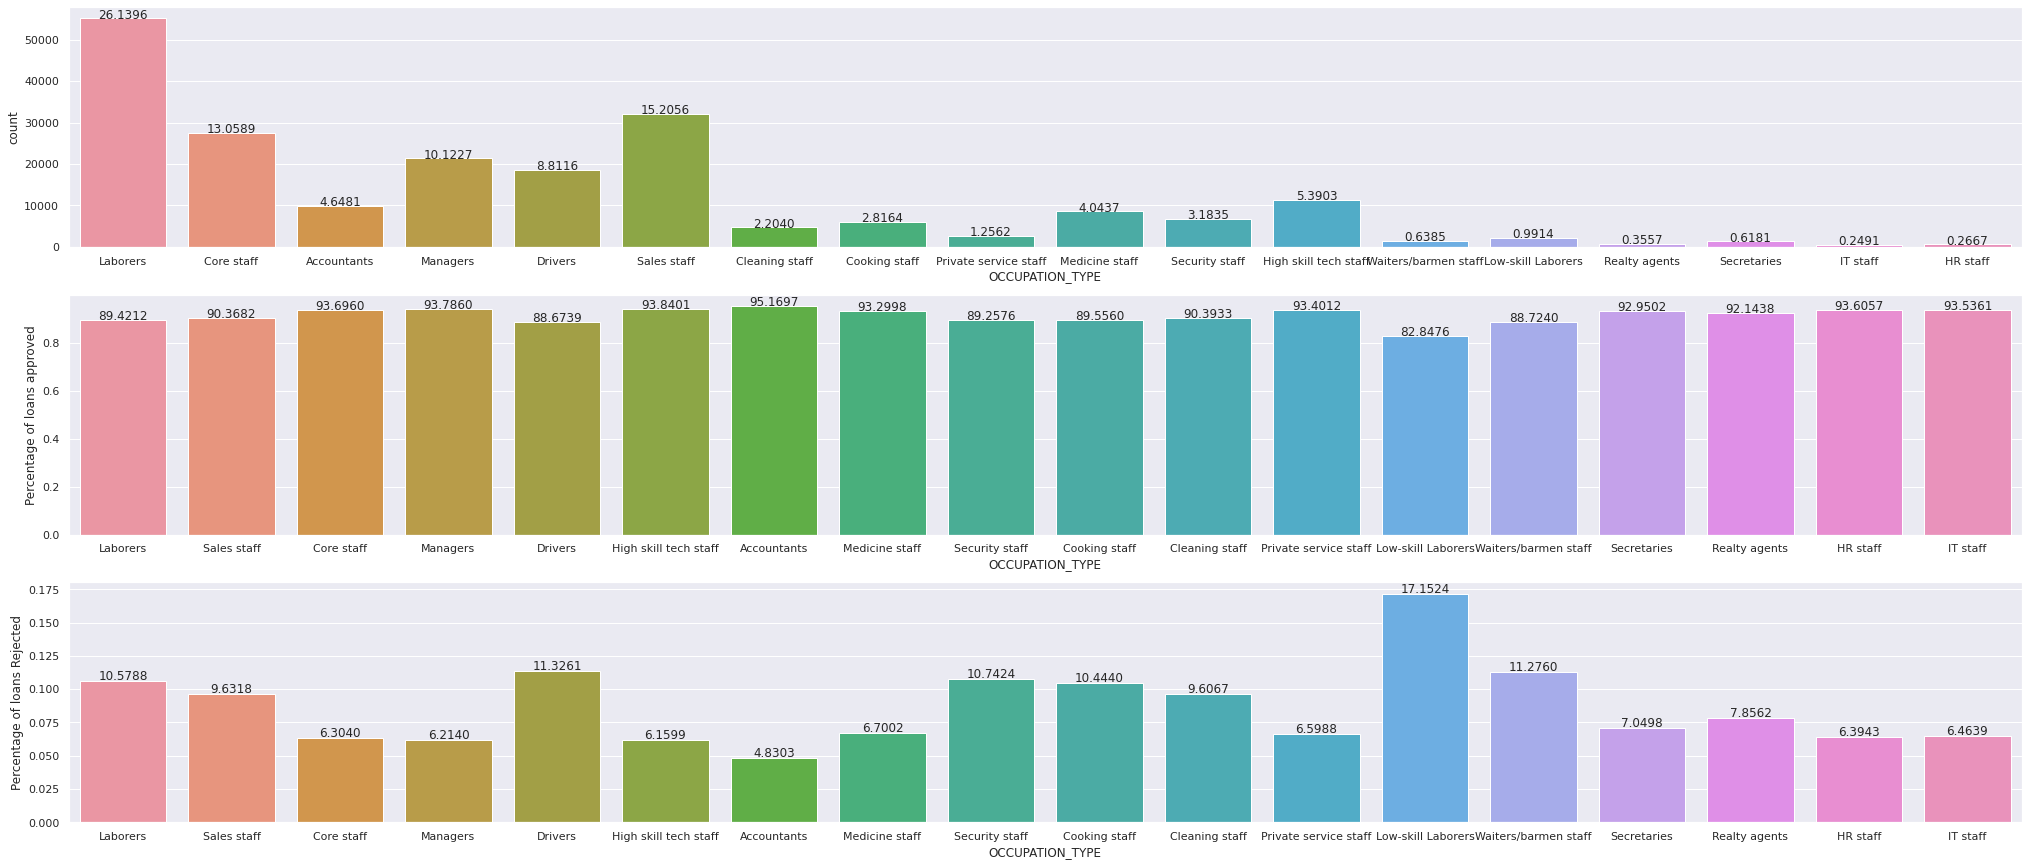

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'OCCUPATION_TYPE',size=(35,15))

Observation-

*    There is lots of variability among different occupation types of the loan applicant.
*    Low Skill labourers have the highest rejection rate(17%) followed by Drivers(11.3%) and waiters(11.2%).
*    Accountants have the lowest rejection rate(4.8%).
*    This feature could be very useful for the classifcation task.

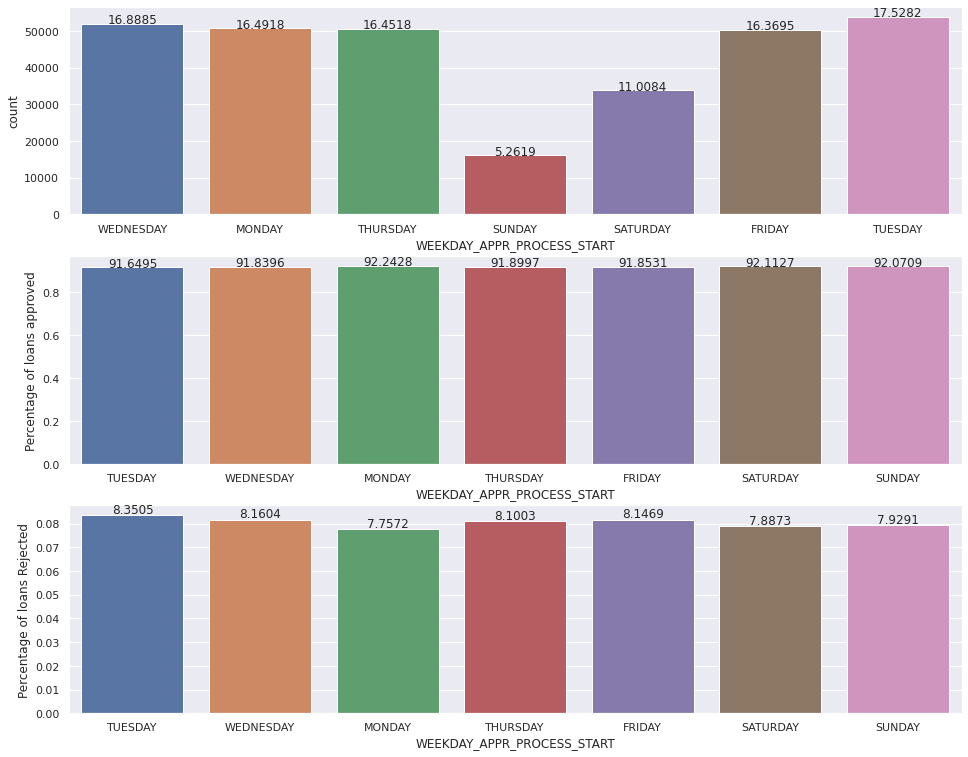

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'WEEKDAY_APPR_PROCESS_START')

Observation-

*    Loan applications on Saturday and Sunday are less as compared to other days of the week.
*    There is not much difference in loan approval and loan rejection rate based on the day of the week of loan application.

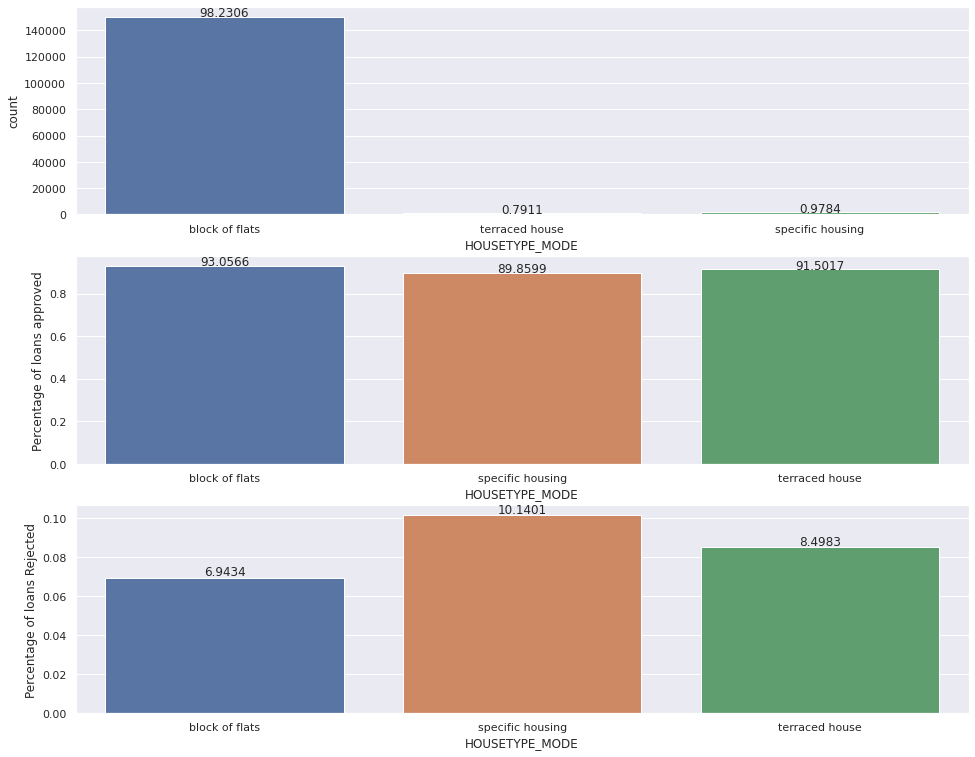

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'HOUSETYPE_MODE')

Observations-

*    Mostly(98%) the loan applicants has household type as Flats.
*    Aplicants living in flats has slightly less loan rejection rate than other house types.

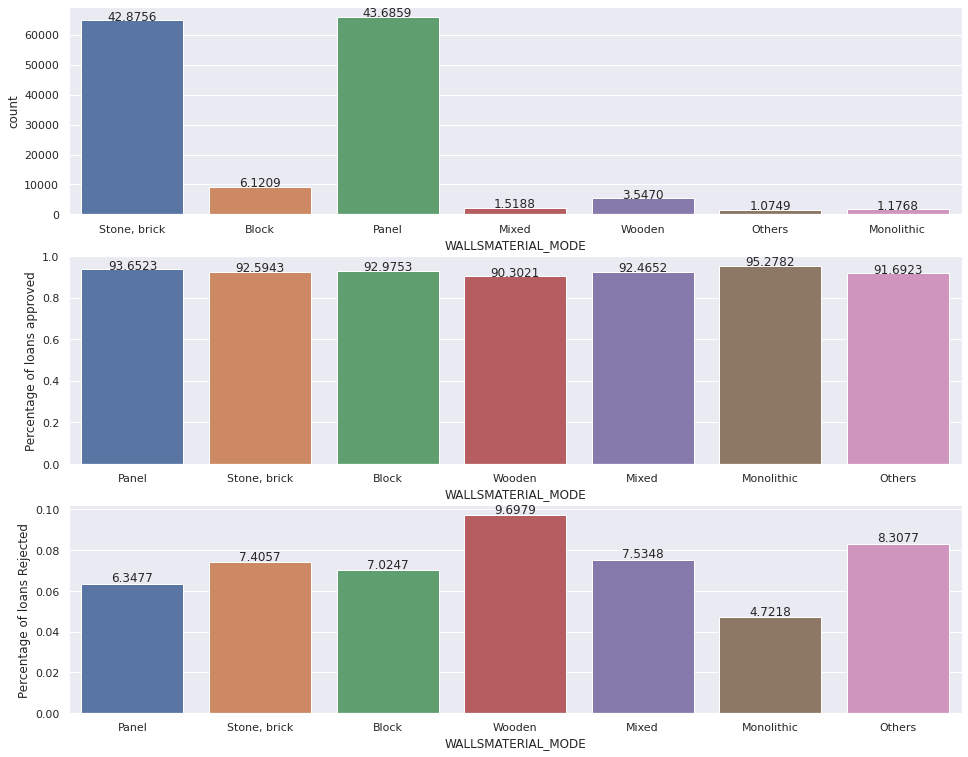

In [ ]:
plot_distribution_ordinal_and_categorical(application_train_df,'WALLSMATERIAL_MODE')

Observations-

*    Most of the loan applican has house wall material as either stone,brick or panel.

*    Laon applicant with wall material as wooden has the highest Rejection Rate, but we have bvery less number of datapoints for wooden category so this could be just the coincidence also so we cannot conclude anything surely.

## EDA for bureau table

This table contains information of all the client's previous credits provided by other financial institutions that were reported to Credit Bureau.

In [ ]:
print("Total number of columns present in Bureau table are-",len(bureau_df.columns))

Total number of columns present in Bureau table are- 17


In [ ]:
bureau_df.columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

*    SK_ID_CURRR is the current loan application ID and is foriegn key from the main application table. This field we can use to merge the main application table and this table.



In [ ]:
print("Total number of records in Bureau table are-",bureau_df.shape[0])
print("Number of unique SK_ID_CURR present in Bureau table",len(bureau_df['SK_ID_CURR'].unique()))
print("Number of unique SK_ID_CURR present in Bureau table which are present in main application training data table-",len(set(bureau_df['SK_ID_CURR'].unique()).intersection(set(application_train_df['SK_ID_CURR'].unique()))))
print("Number of unique SK_ID_CURR present in Bureau table which are present in main application test data table-",len(set(bureau_df['SK_ID_CURR'].unique()).intersection(set(application_test_df['SK_ID_CURR'].unique()))))

Total number of records in Bureau table are- 1716428
Number of unique SK_ID_CURR present in Bureau table 305811
Number of unique SK_ID_CURR present in Bureau table which are present in main application training data table- 263491
Number of unique SK_ID_CURR present in Bureau table which are present in main application test data table- 42320


Observations-

*    There are 17 lakh records present in the table. These are previous loan details provided by other financial institutions. There are 3 lakh unique SK_ID_CURR(current loan application id) in 17 lakh records which means there are multiple previous loan details present in this table for one current loan applicant.


### Missing Value Analysis for Bureau table

In [ ]:
print_nan_statsdf(bureau_df)

Total number of Columns where NAN values are persent--> 7
Below Table shows list of columns where NAN value are present.
+------------------------+-----------------------+
|         Column         |    Percent Missing    |
+------------------------+-----------------------+
|      AMT_ANNUITY       |    71.4734902949614   |
| AMT_CREDIT_MAX_OVERDUE |   65.51326359159836   |
|   DAYS_ENDDATE_FACT    |   36.916957775100386  |
|  AMT_CREDIT_SUM_LIMIT  |   34.47741472406649   |
|  AMT_CREDIT_SUM_DEBT   |   15.011931755948982  |
|  DAYS_CREDIT_ENDDATE   |   6.149573416420613   |
|     AMT_CREDIT_SUM     | 0.0007573868522303295 |
+------------------------+-----------------------+


Observations-

*   Out of 17 coulumns, There are 7 columns which have NAN values.

*   AMT_ANNUITY has the highest percentage(70%) of NAN values.

Now to do the Analysis of these columns we have to get the Target value from the main application data by merging it on SK_ID_CURR

In [ ]:
#Merging the Bureau table and Main application train DF

application_bureau_merged=application_train_df[['SK_ID_CURR','TARGET']].merge(bureau_df,on="SK_ID_CURR",how="left")

### Univariate Analysis on Bureau table

In [ ]:
application_bureau_merged.columns

Index(['SK_ID_CURR', 'TARGET', 'SK_ID_BUREAU', 'CREDIT_ACTIVE',
       'CREDIT_CURRENCY', 'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE',
       'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE',
       'CNT_CREDIT_PROLONG', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE',
       'DAYS_CREDIT_UPDATE', 'AMT_ANNUITY'],
      dtype='object')

In [ ]:
bureau_merged_continous_col_list,bureau_merged_ordinal_col_list,bureau_merged_categorical_col_list=partition_colnames_of_different_types(application_bureau_merged)

#### Continous Features

In [ ]:
bureau_merged_continous_col_list

['SK_ID_BUREAU',
 'DAYS_CREDIT',
 'CREDIT_DAY_OVERDUE',
 'DAYS_CREDIT_ENDDATE',
 'DAYS_ENDDATE_FACT',
 'AMT_CREDIT_MAX_OVERDUE',
 'CNT_CREDIT_PROLONG',
 'AMT_CREDIT_SUM',
 'AMT_CREDIT_SUM_DEBT',
 'AMT_CREDIT_SUM_LIMIT',
 'AMT_CREDIT_SUM_OVERDUE',
 'DAYS_CREDIT_UPDATE',
 'AMT_ANNUITY']

In [ ]:
printPercentiles(application_bureau_merged,'DAYS_CREDIT')

for DAYS_CREDIT 0 percentile is---> -2922.0
for DAYS_CREDIT 10 percentile is---> -2448.0
for DAYS_CREDIT 20 percentile is---> -1896.0
for DAYS_CREDIT 30 percentile is---> -1504.0
for DAYS_CREDIT 40 percentile is---> -1223.0
for DAYS_CREDIT 50 percentile is---> -985.0
for DAYS_CREDIT 60 percentile is---> -762.0
for DAYS_CREDIT 70 percentile is---> -562.0
for DAYS_CREDIT 80 percentile is---> -382.0
for DAYS_CREDIT 90 percentile is---> -211.0
for DAYS_CREDIT 100 percentile is---> 0.0


Observations-

*   The oldest Credit present in credit buereau is 2922 days old which is close to 8 years old.

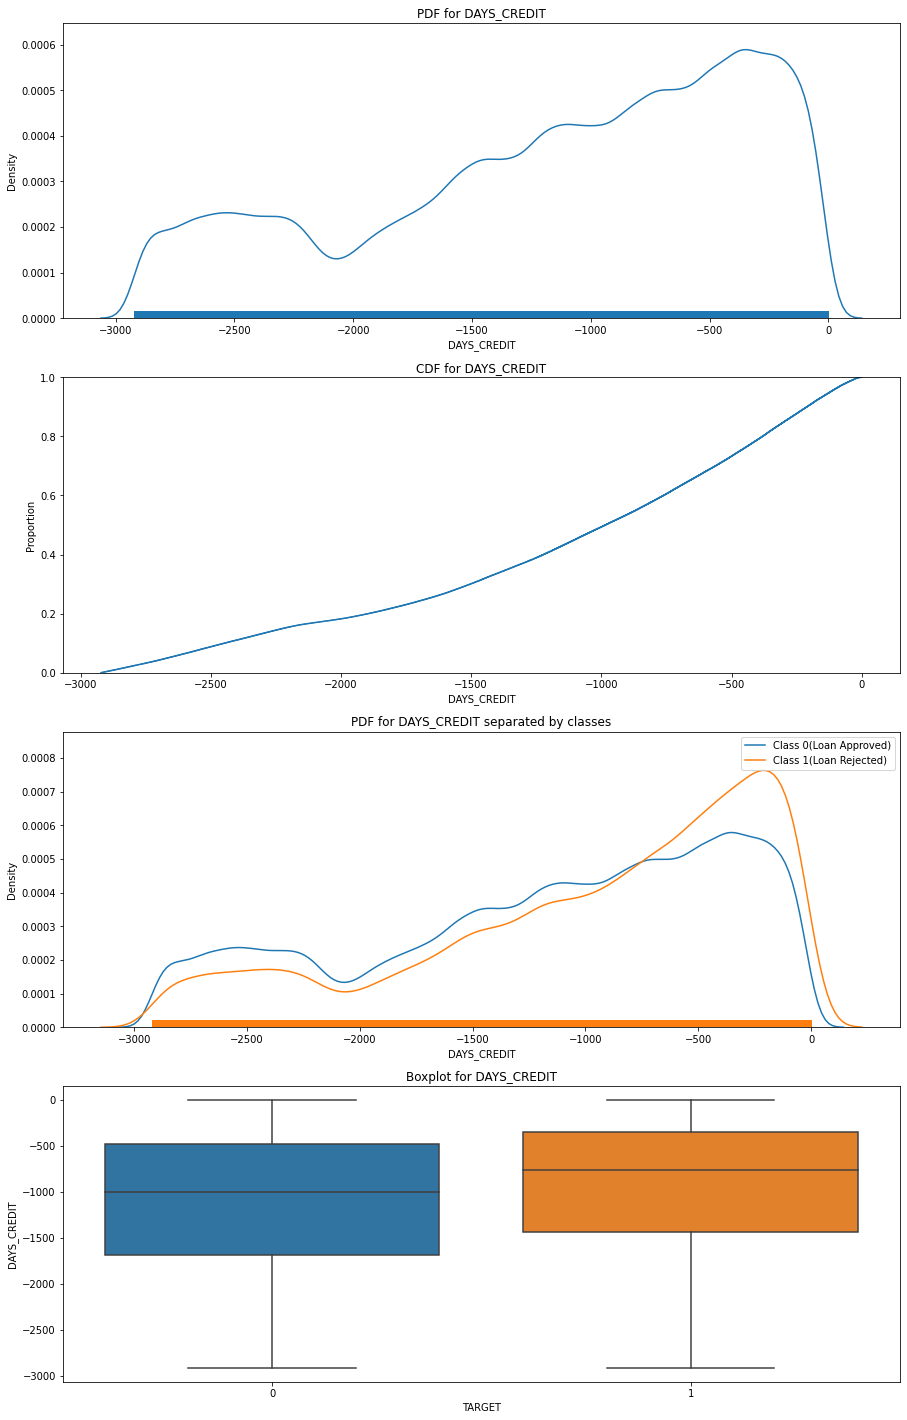

In [ ]:
plot_distribution_continous(application_bureau_merged,'DAYS_CREDIT')

Observations-

*    The loans which are more recent have higher density of loan rejection as we can see in the PDF(plot 2) and box plot.

**DAYS_CREDIT_ENDDATE**

Remaining duration of CB credit (in days) at the time of application in Home Credit

In [ ]:
printPercentiles(application_bureau_merged,'DAYS_CREDIT_ENDDATE')

for DAYS_CREDIT_ENDDATE 0 percentile is---> -42060.0
for DAYS_CREDIT_ENDDATE 10 percentile is---> -1939.0
for DAYS_CREDIT_ENDDATE 20 percentile is---> -1365.0
for DAYS_CREDIT_ENDDATE 30 percentile is---> -956.0
for DAYS_CREDIT_ENDDATE 40 percentile is---> -632.0
for DAYS_CREDIT_ENDDATE 50 percentile is---> -334.0
for DAYS_CREDIT_ENDDATE 60 percentile is---> -62.0
for DAYS_CREDIT_ENDDATE 70 percentile is---> 246.0
for DAYS_CREDIT_ENDDATE 80 percentile is---> 725.0
for DAYS_CREDIT_ENDDATE 90 percentile is---> 1332.0
for DAYS_CREDIT_ENDDATE 100 percentile is---> 31199.0


Observation-

*    There seems to be error in this fieds data since 0th percentile of DAYS_CREDIT_ENDDATE is -42060 days which is close to 115 years.
*    100 percentile is 31199 days which is close to 87 years which also seems to be wrong because end date of some previous loan taken by current loan applicant is 87 years ahead of the time of current loan application which is highly unlikely.
*    So we need to take care of such extreme data which doesn't make any sense in data cleaning and preprocessing stage.

**DAYS_ENDDATE_FACT**

Days since CB credit ended at the time of application in Home Credit (only for closed credit)

In [ ]:
printPercentiles(application_bureau_merged,'DAYS_ENDDATE_FACT')

for DAYS_ENDDATE_FACT 0 percentile is---> -42023.0
for DAYS_ENDDATE_FACT 10 percentile is---> -2173.0
for DAYS_ENDDATE_FACT 20 percentile is---> -1695.0
for DAYS_ENDDATE_FACT 30 percentile is---> -1336.0
for DAYS_ENDDATE_FACT 40 percentile is---> -1080.0
for DAYS_ENDDATE_FACT 50 percentile is---> -900.0
for DAYS_ENDDATE_FACT 60 percentile is---> -702.0
for DAYS_ENDDATE_FACT 70 percentile is---> -512.0
for DAYS_ENDDATE_FACT 80 percentile is---> -341.0
for DAYS_ENDDATE_FACT 90 percentile is---> -177.0
for DAYS_ENDDATE_FACT 100 percentile is---> 0.0


Observations-

*    This field also has extreme points. o percentile is -42023 days which is close to 115 years.
*    So we need to take care of the extreme points in this field as well in data preprocessing stage.

**AMT_CREDIT_MAX_OVERDUE**

Maximal amount overdue on the Credit Bureau credit so far (at application date of loan in our sample)

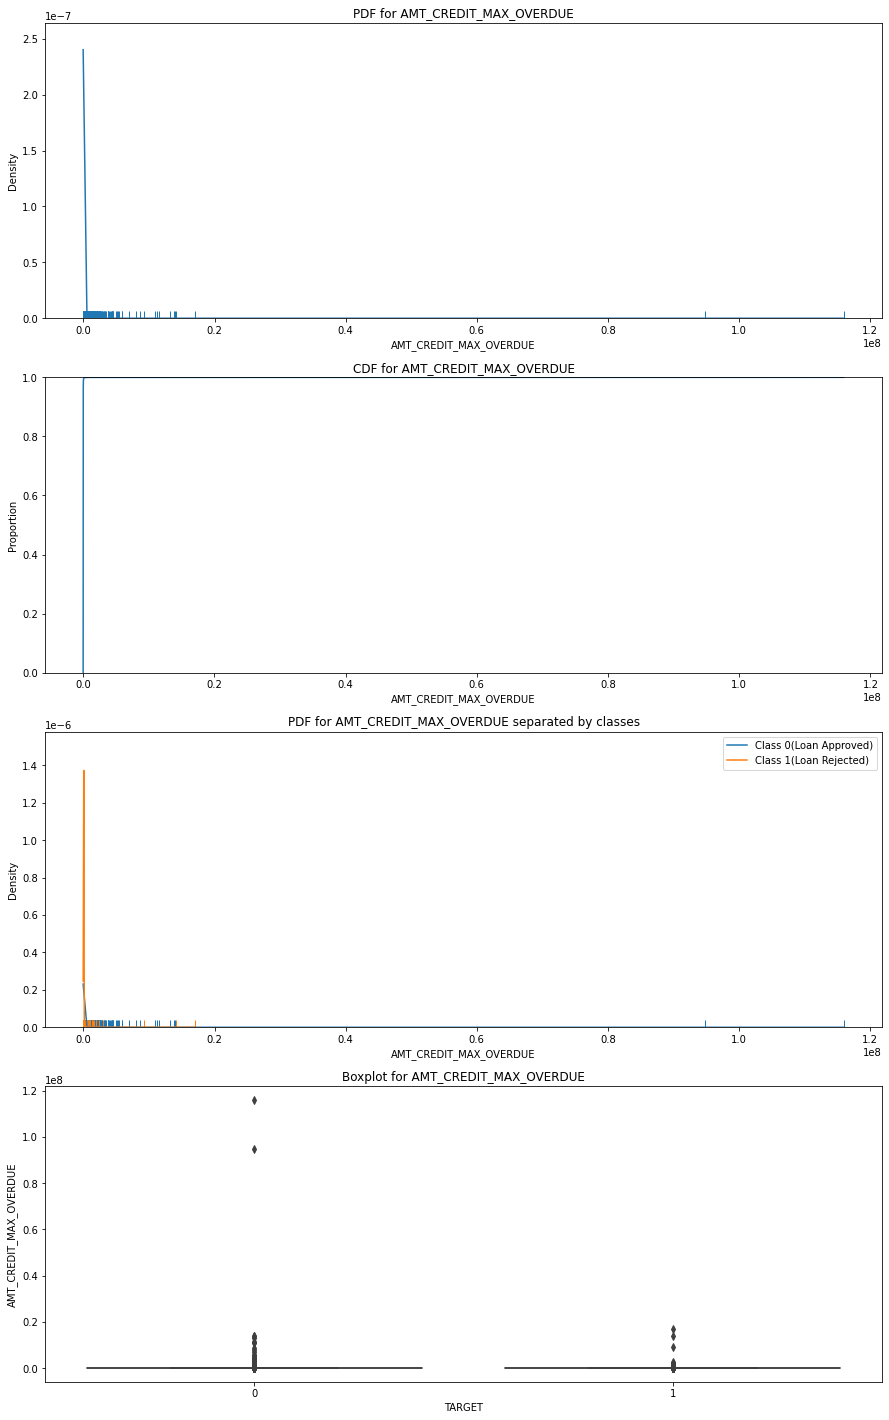

In [ ]:
plot_distribution_continous(application_bureau_merged,'AMT_CREDIT_MAX_OVERDUE')

In [ ]:
printPercentiles(application_bureau_merged,'AMT_CREDIT_MAX_OVERDUE')

for AMT_CREDIT_MAX_OVERDUE 0 percentile is---> 0.0
for AMT_CREDIT_MAX_OVERDUE 10 percentile is---> 0.0
for AMT_CREDIT_MAX_OVERDUE 20 percentile is---> 0.0
for AMT_CREDIT_MAX_OVERDUE 30 percentile is---> 0.0
for AMT_CREDIT_MAX_OVERDUE 40 percentile is---> 0.0
for AMT_CREDIT_MAX_OVERDUE 50 percentile is---> 0.0
for AMT_CREDIT_MAX_OVERDUE 60 percentile is---> 0.0
for AMT_CREDIT_MAX_OVERDUE 70 percentile is---> 0.0
for AMT_CREDIT_MAX_OVERDUE 80 percentile is---> 90.0
for AMT_CREDIT_MAX_OVERDUE 90 percentile is---> 7632.517500000007
for AMT_CREDIT_MAX_OVERDUE 100 percentile is---> 115987185.0


Observations-

*    For most of the observations AMT_CREDIT_MAX_OVERDUE is 0 or close to 0, but there are some extreme points as well, for example 100 percentile is 115987185 which seems to be outliers but we cannot remove this outlier because these outliers might be useful in prediction because intuitively if we think about it, if loan applicant at the time of current loan application has high maximal amount overdue, chances of their loan to get rejected is high.

**DAYS_CREDIT_UPDATE**

How many days before loan application did last information about the Credit Bureau credit come

In [ ]:
printPercentiles(application_bureau_merged,'DAYS_CREDIT_UPDATE')

for DAYS_CREDIT_UPDATE 0 percentile is---> -41947.0
for DAYS_CREDIT_UPDATE 10 percentile is---> -1582.0
for DAYS_CREDIT_UPDATE 20 percentile is---> -1042.0
for DAYS_CREDIT_UPDATE 30 percentile is---> -793.0
for DAYS_CREDIT_UPDATE 40 percentile is---> -613.0
for DAYS_CREDIT_UPDATE 50 percentile is---> -406.0
for DAYS_CREDIT_UPDATE 60 percentile is---> -189.0
for DAYS_CREDIT_UPDATE 70 percentile is---> -52.0
for DAYS_CREDIT_UPDATE 80 percentile is---> -25.0
for DAYS_CREDIT_UPDATE 90 percentile is---> -13.0
for DAYS_CREDIT_UPDATE 100 percentile is---> 372.0


Observation-

*    This field also has errors because 0 percentile is 41947 days which is close to 114 years which does not seems to be correct.

*    100 percentile is +372 days which means last information about credit Bureau credit come in future to the current application day which does not make much sense.

*    These inconsistencies in the data needs to be taken care during data preprocessing stage.

#### Categorical Features

In [ ]:
bureau_merged_categorical_col_list

['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']

**Credit_ACTIVE**

Status of the Credit Bureau (CB) reported credits

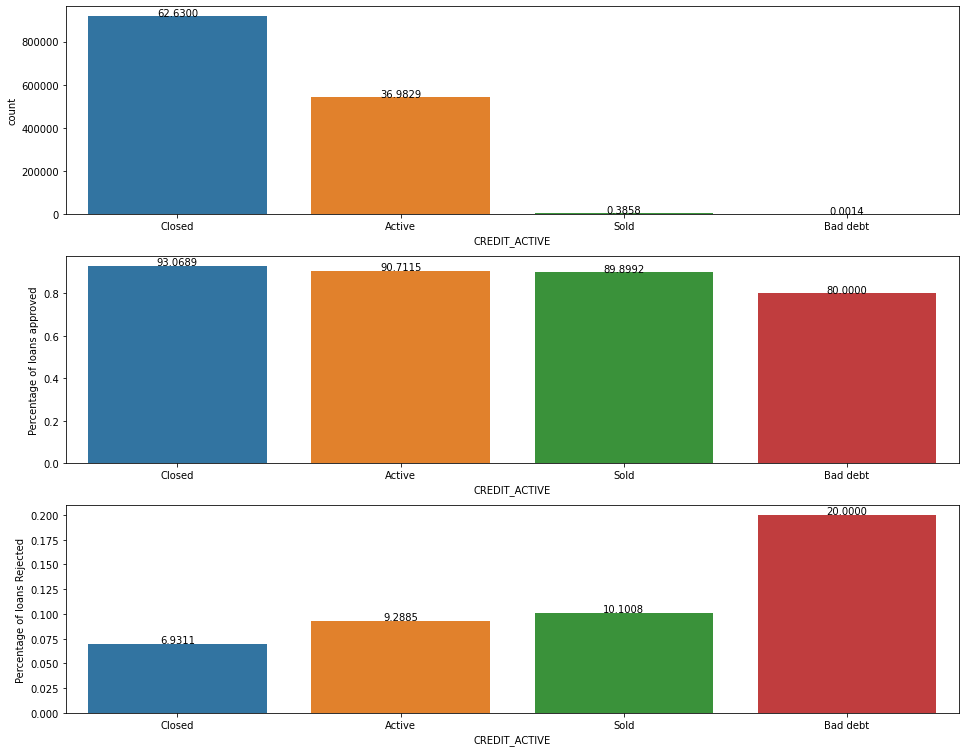

In [ ]:
plot_distribution_ordinal_and_categorical(application_bureau_merged,'CREDIT_ACTIVE')

Observation-

*    If the status of the credit bureau credit is closed than Loan Rejection rate is low(7%) as compared to other status which completely make sense.

*    if the status is in Bad debt than Rejection rate is high(20%).

*    This could be usefule feature for classification task.

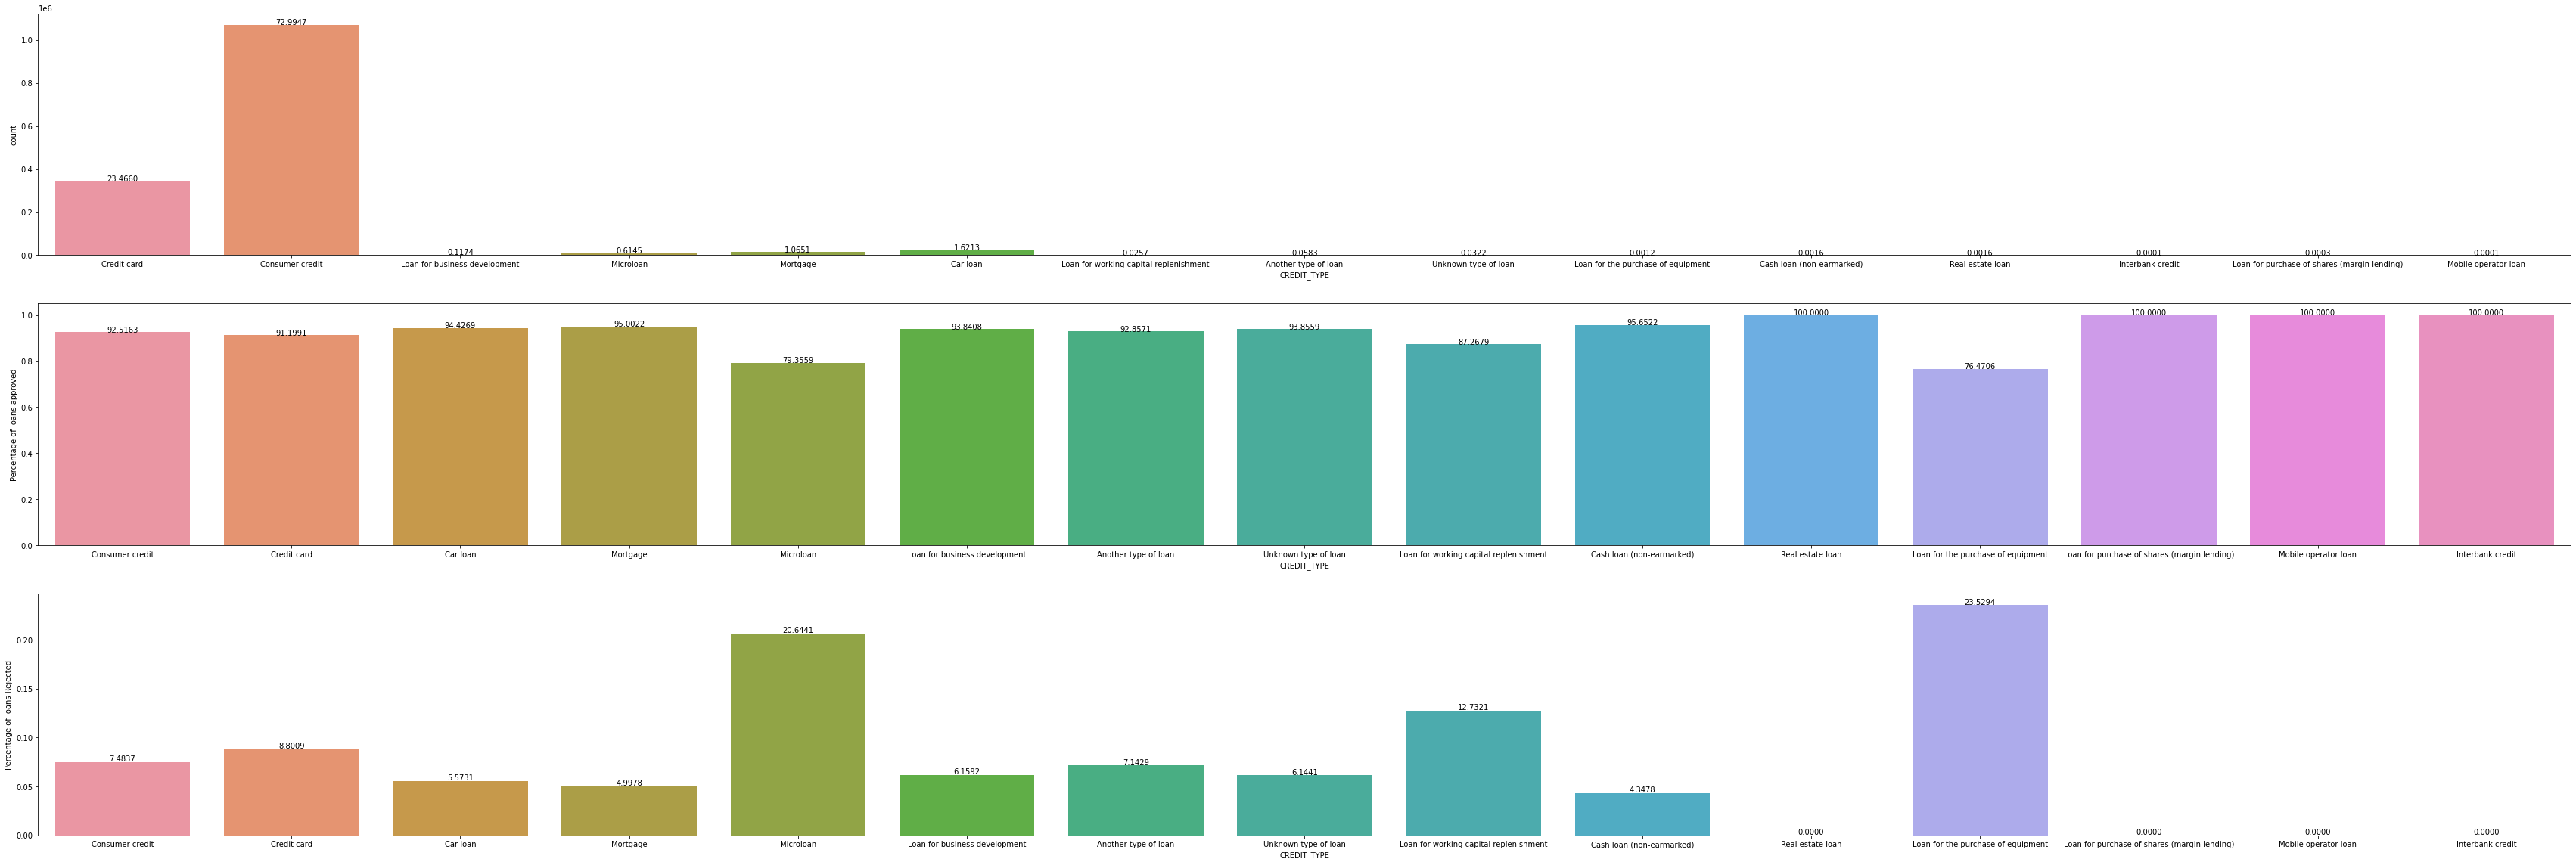

In [ ]:
plot_distribution_ordinal_and_categorical(application_bureau_merged,'CREDIT_TYPE',size=(60,20))

Observation-

*    Majority of the loan applicant had earlier credits reported to credit bureau of type Credit Card(23 %) and consumer credit(73%).

*    Microloan and loan for purchase of equipment has high Rejection rate.

## EDA for Bureau Balance table

This table contains monthly balances of previos credits in credit Bureau

In [ ]:
bureau_balance_df.columns

Index(['SK_ID_BUREAU', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [ ]:
print("Total number of records in Bureau table are-",bureau_balance_df.shape[0])
print("Total number of unique SK_ID_BUREAU(credit bureau loan) for which monthly balance is present-",len(bureau_balance_df['SK_ID_BUREAU'].unique()))

Total number of records in Bureau table are- 27299925
Total number of unique SK_ID_BUREAU(credit bureau loan) for which monthly balance is present- 817395


There are 2 columns present in this table-

*    **Status**

In [ ]:
bureau_balance_df['STATUS'].unique()

array(['C', '0', 'X', '1', '2', '3', '5', '4'], dtype=object)

Status of Credit Bureau loan during the month (C means closed,0 means no DPD,X means status unknown,1 means DPD 1-30, 2 means DPD 31-60, 3 means DPD 61-90, 4 means DPD 91-120, 5 means DPD is 120+ or sold off or written off.). DPD here means days past due.



*    MONTHS_BALANCE

Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )

In [ ]:
printPercentiles(bureau_balance_df,'MONTHS_BALANCE')

for MONTHS_BALANCE 0 percentile is---> -96.0
for MONTHS_BALANCE 10 percentile is---> -68.0
for MONTHS_BALANCE 20 percentile is---> -52.0
for MONTHS_BALANCE 30 percentile is---> -41.0
for MONTHS_BALANCE 40 percentile is---> -32.0
for MONTHS_BALANCE 50 percentile is---> -25.0
for MONTHS_BALANCE 60 percentile is---> -19.0
for MONTHS_BALANCE 70 percentile is---> -14.0
for MONTHS_BALANCE 80 percentile is---> -9.0
for MONTHS_BALANCE 90 percentile is---> -4.0
for MONTHS_BALANCE 100 percentile is---> 0.0


*    100 percentile value is -96 months which means oldest monthly balance of some credit in credit bureau is 96 months old.

### Missing value Analysis for Bureau balance table

In [ ]:
print_nan_statsdf(bureau_balance_df)

Total number of Columns where NAN values are persent--> 0
Below Table shows list of columns where NAN value are present.
+--------+-----------------+
| Column | Percent Missing |
+--------+-----------------+
+--------+-----------------+


*   There are no NAN values present in Bureau balance table.

## EDA for Previous Application table

This table contains records of all previous applications for Home Credit loans of clients who have loans in our sample.

In [ ]:
print("Total number of records in Bureau table are-",previous_application_df.shape[0])
print("Number of unique SK_ID_CURR present in Previous Application table-",len(previous_application_df['SK_ID_CURR'].unique()))
print("Number of unique SK_ID_CURR present in Previos Application table which are present in main application training data table-",len(set(previous_application_df['SK_ID_CURR'].unique()).intersection(set(application_train_df['SK_ID_CURR'].unique()))))
print("Number of unique SK_ID_CURR present in Previos Application table which are present in main application test data table-",len(set(previous_application_df['SK_ID_CURR'].unique()).intersection(set(application_test_df['SK_ID_CURR'].unique()))))

Total number of records in Bureau table are- 1670214
Number of unique SK_ID_CURR present in Previous Application table- 338857
Number of unique SK_ID_CURR present in Previos Application table which are present in main application training data table- 291057
Number of unique SK_ID_CURR present in Previos Application table which are present in main application test data table- 47800


Observations-

*    There are 16 lakh records present in the table. These are previous loan details in Home Credit. There are 3 lakh unique SK_ID_CURR(current loan application id) in 16 lakh records which means there are multiple previous loan details present in this table for one current loan applicant.

### Missing Value Analysis for Previous Application table

In [ ]:
print_nan_statsdf(previous_application_df)

Total number of Columns where NAN values are persent--> 16
Below Table shows list of columns where NAN value are present.
+---------------------------+------------------------+
|           Column          |    Percent Missing     |
+---------------------------+------------------------+
|  RATE_INTEREST_PRIVILEGED |    99.6436983524267    |
|   RATE_INTEREST_PRIMARY   |    99.6436983524267    |
|      AMT_DOWN_PAYMENT     |   53.636480115721696   |
|     RATE_DOWN_PAYMENT     |   53.636480115721696   |
|      NAME_TYPE_SUITE      |   49.11975351661523    |
| NFLAG_INSURED_ON_APPROVAL |   40.29812946125467    |
|      DAYS_TERMINATION     |   40.29812946125467    |
|       DAYS_LAST_DUE       |   40.29812946125467    |
| DAYS_LAST_DUE_1ST_VERSION |   40.29812946125467    |
|       DAYS_FIRST_DUE      |   40.29812946125467    |
|     DAYS_FIRST_DRAWING    |   40.29812946125467    |
|      AMT_GOODS_PRICE      |   23.08177275486854    |
|        AMT_ANNUITY        |   22.286665062081866   

Observation-

*    There are 16 columns(total 37) which have NAN values.
*    There are almost all the values as NAN in columns related to intrest rate(RATE_INTEREST_PRIVILEGED-99.6% and RATE_INTEREST_PRIMARY-99.6%).
*    Interest rate might be a useful feature and we might try to derive the missing rate values from AMT_ANNUITY(Anual payment of loan),CNT_PAYMNT(Loan Term) and AMT_CREDIT and we can see if using these 3 columns can we somehow derive the interest rates which are available to us. If interest comes to be accurate we can use the same idea to derive the interest rate for missing values. AMT_ANNUITY and CNT_PAYMENT has less number of NAN values(22%)

Now to do the Analysis of these columns we have to get the Target value from the main application data by merging it on SK_ID_CURR

In [ ]:
#Merging the Bureau table and Main application train DF

application_prev_application_merged=application_train_df[['SK_ID_CURR','TARGET']].merge(previous_application_df,on="SK_ID_CURR",how="left")

### Univariate Analysis on Previous Application table

**HOUR_APPR_PROCESS_START**

Approximately at what hour did the client apply for the loan

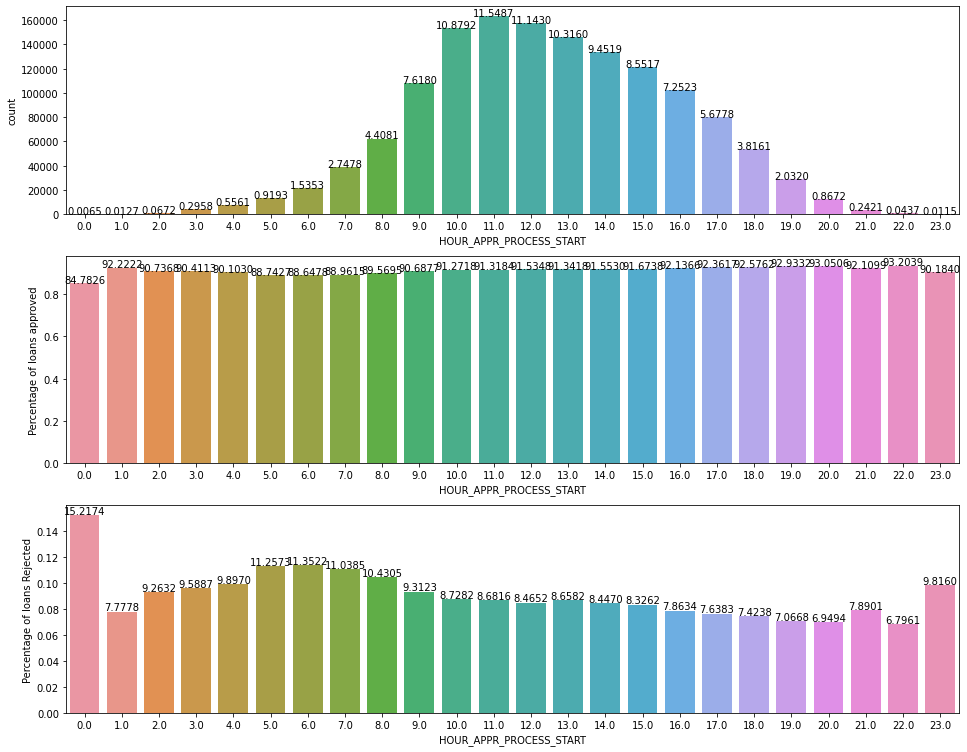

In [ ]:
plot_distribution_ordinal_and_categorical(application_prev_application_merged,'HOUR_APPR_PROCESS_START')

Observation-

*    Majority of the loan application started at the time between 8 Am and 6 PM which makes sense.
* There is high rejection rate when the loan application start time is 12AM(midnight), although we have very little data when start time is 12 AM so this could be a coincidence also.

**NAME_CONTRACT_TYPE**

Contract product type (Cash loan, consumer loan..) of the previous application

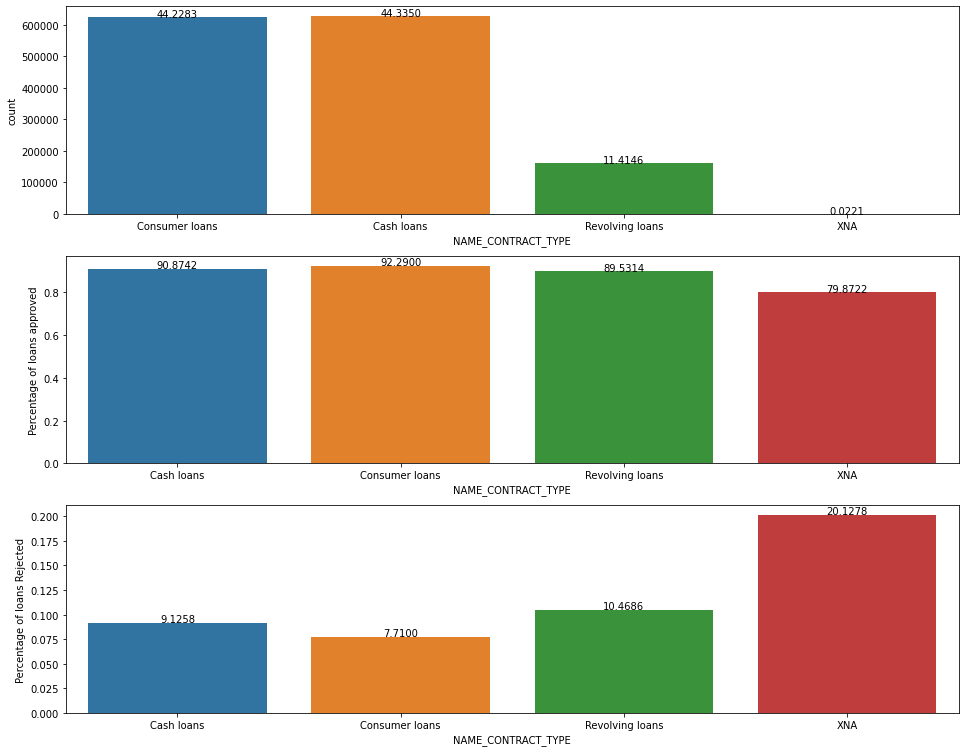

In [ ]:
plot_distribution_ordinal_and_categorical(application_prev_application_merged,'NAME_CONTRACT_TYPE')

Observations-

* Consumer loans and cash loans have majority of application(88 %) in previous loan application data. 
* When NAME_CONTRACT_TYPE is 'XNA' there is high loan rejection rate(20 %) compared to other contract_type.

**CODE_REJECT_REASON**

Why was the previous application rejected

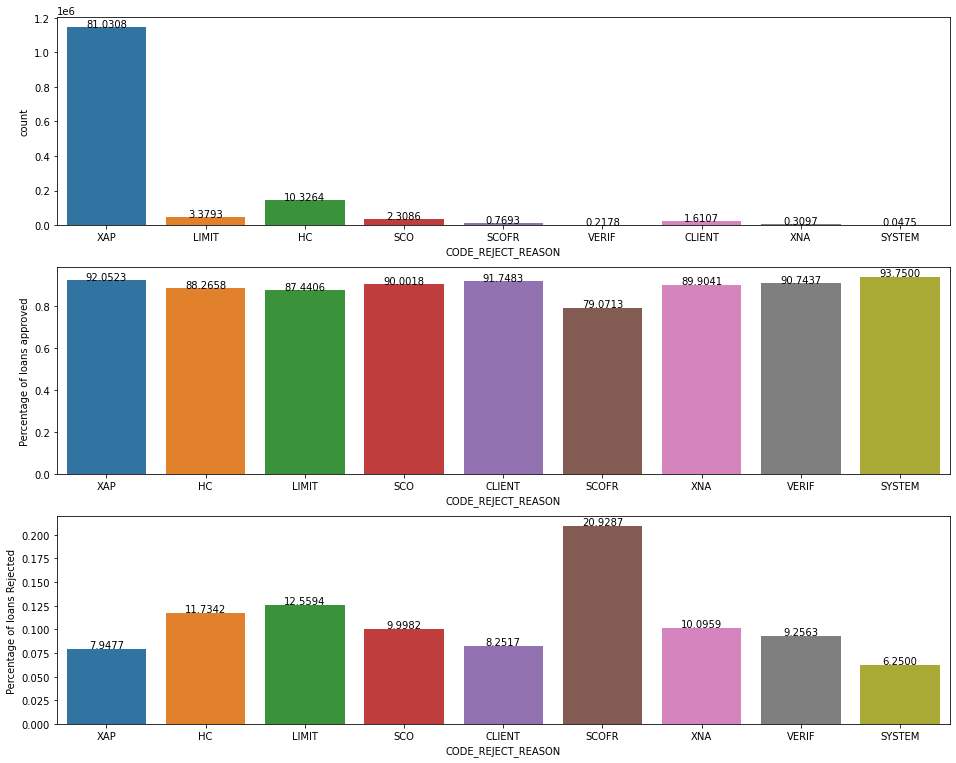

In [ ]:
plot_distribution_ordinal_and_categorical(application_prev_application_merged,'CODE_REJECT_REASON')

Observation-

* For majority of the loan rejection in previous application, reject code was 'XAP'.
* There is high rejection rate for current loan application when the previous loan application rejection code is 'SCOFR'.


**CHANNEL_TYPE**

Through which channel Home credit group acquired the client on the previous application

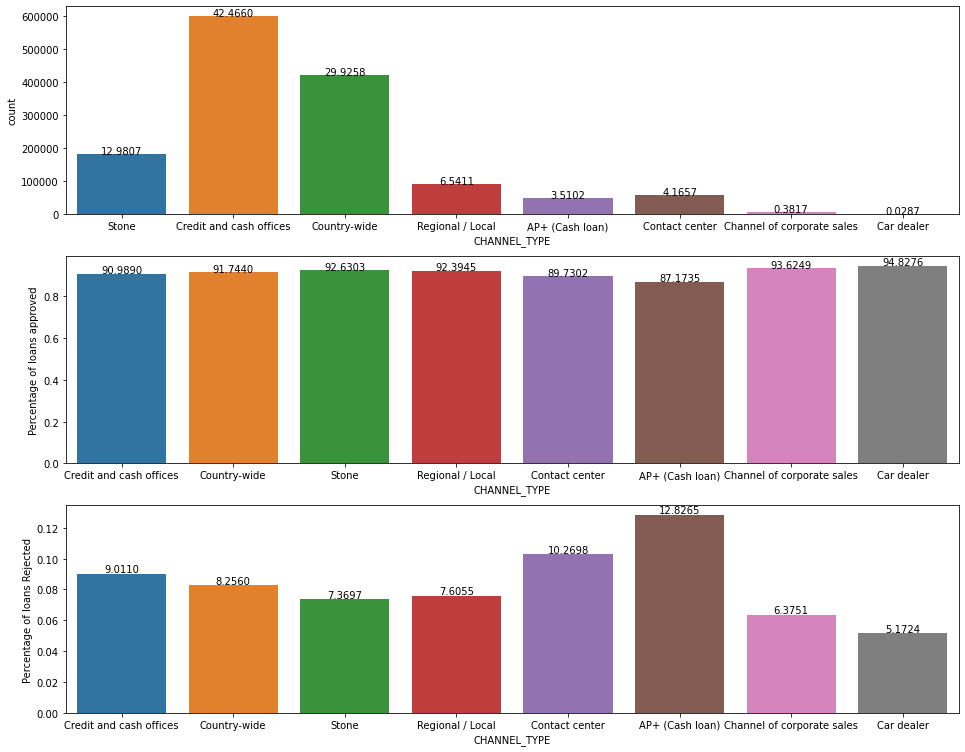

In [ ]:
plot_distribution_ordinal_and_categorical(application_prev_application_merged,'CHANNEL_TYPE')

Observation-

* Majority of the loan applicant in previous application to home credit came through the 'credit and cash offices'(42%) and 'country wide'(29%) channels.

* Rejection rate is highest when applicant came from AP+(cash loan) channel(12.8%)

**DAYS_FIRST_DRAWING**

Relative to application date of current application when was the first disbursement of the previous application

In [ ]:
printPercentiles(application_prev_application_merged,'DAYS_FIRST_DRAWING')

for DAYS_FIRST_DRAWING 0 percentile is---> -2922.0
for DAYS_FIRST_DRAWING 10 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 20 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 30 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 40 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 50 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 60 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 70 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 80 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 90 percentile is---> 365243.0
for DAYS_FIRST_DRAWING 100 percentile is---> 365243.0


Observation-

* All the observation from 10 percentile to 100 percentile contains the same days of disbursement which is 365243 and it is close to 1000 years in the future of current loan applcation which does not make any sense.

* Since all the value contains some errors we can drop this entire column.

**DAYS_FIRST_DUE**

Relative to application date of current application when was the first due supposed to be of the previous application

In [ ]:
printPercentiles(application_prev_application_merged,'DAYS_FIRST_DUE')

for DAYS_FIRST_DUE 0 percentile is---> -2892.0
for DAYS_FIRST_DUE 10 percentile is---> -2388.0
for DAYS_FIRST_DUE 20 percentile is---> -1882.0
for DAYS_FIRST_DUE 30 percentile is---> -1430.0
for DAYS_FIRST_DUE 40 percentile is---> -1070.0
for DAYS_FIRST_DUE 50 percentile is---> -825.0
for DAYS_FIRST_DUE 60 percentile is---> -647.0
for DAYS_FIRST_DUE 70 percentile is---> -485.0
for DAYS_FIRST_DUE 80 percentile is---> -329.0
for DAYS_FIRST_DUE 90 percentile is---> -173.0
for DAYS_FIRST_DUE 100 percentile is---> 365243.0


Observation-

* This column also contains some errors. The 100 percentile value is 365243 which is close to 1000 years. So we need to deal with these values in data preprocessing stage.


**DAYS_LAST_DUE_1ST_VERSION**

Relative to application date of current application when was the first due of the previous application

In [ ]:
printPercentiles(application_prev_application_merged,'DAYS_LAST_DUE_1ST_VERSION')

for DAYS_LAST_DUE_1ST_VERSION 0 percentile is---> -2801.0
for DAYS_LAST_DUE_1ST_VERSION 10 percentile is---> -2045.0
for DAYS_LAST_DUE_1ST_VERSION 20 percentile is---> -1498.0
for DAYS_LAST_DUE_1ST_VERSION 30 percentile is---> -1016.0
for DAYS_LAST_DUE_1ST_VERSION 40 percentile is---> -644.0
for DAYS_LAST_DUE_1ST_VERSION 50 percentile is---> -358.0
for DAYS_LAST_DUE_1ST_VERSION 60 percentile is---> -146.0
for DAYS_LAST_DUE_1ST_VERSION 70 percentile is---> 34.0
for DAYS_LAST_DUE_1ST_VERSION 80 percentile is---> 273.0
for DAYS_LAST_DUE_1ST_VERSION 90 percentile is---> 1374.0
for DAYS_LAST_DUE_1ST_VERSION 100 percentile is---> 365243.0


Observation-

* This column also contains some errors. The 100 percentile value is 365243 which is close to 1000 years. So we need to deal with these values in data preprocessing stage.

**DAYS_LAST_DUE**

Relative to application date of current application when was the last due date of the previous application

In [ ]:
printPercentiles(application_prev_application_merged,'DAYS_LAST_DUE')

for DAYS_LAST_DUE 0 percentile is---> -2889.0
for DAYS_LAST_DUE 10 percentile is---> -2079.0
for DAYS_LAST_DUE 20 percentile is---> -1554.0
for DAYS_LAST_DUE 30 percentile is---> -1108.0
for DAYS_LAST_DUE 40 percentile is---> -784.0
for DAYS_LAST_DUE 50 percentile is---> -534.0
for DAYS_LAST_DUE 60 percentile is---> -333.0
for DAYS_LAST_DUE 70 percentile is---> -162.0
for DAYS_LAST_DUE 80 percentile is---> 365243.0
for DAYS_LAST_DUE 90 percentile is---> 365243.0
for DAYS_LAST_DUE 100 percentile is---> 365243.0


Observation-

* This column also contains some errors. The 80-100 percentile value is 365243 which is close to 1000 years. So we need to deal with these values in data preprocessing stage.

**DAYS_TERMINATION**

Relative to application date of current application when was the expected termination of the previous application

In [ ]:
printPercentiles(application_prev_application_merged,'DAYS_TERMINATION')

for DAYS_TERMINATION 0 percentile is---> -2874.0
for DAYS_TERMINATION 10 percentile is---> -2048.0
for DAYS_TERMINATION 20 percentile is---> -1508.0
for DAYS_TERMINATION 30 percentile is---> -1064.0
for DAYS_TERMINATION 40 percentile is---> -743.0
for DAYS_TERMINATION 50 percentile is---> -494.0
for DAYS_TERMINATION 60 percentile is---> -297.0
for DAYS_TERMINATION 70 percentile is---> -128.0
for DAYS_TERMINATION 80 percentile is---> 365243.0
for DAYS_TERMINATION 90 percentile is---> 365243.0
for DAYS_TERMINATION 100 percentile is---> 365243.0


Observation-

* This column also contains some errors. The 80-100 percentile value is 365243 which is close to 1000 years. So we need to deal with these values in data preprocessing stage.

## EDA for POS CASH balance Table

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.

In [ ]:
print("Total number of records in POS cash balance table are-",pos_cash_balance_df.shape[0])
print("Number of unique SK_ID_CURR present in POS cash balance table-",len(pos_cash_balance_df['SK_ID_CURR'].unique()))
print("Number of unique SK_ID_CURR present in POS cash balance table which are present in main application training data table-",len(set(pos_cash_balance_df['SK_ID_CURR'].unique()).intersection(set(application_train_df['SK_ID_CURR'].unique()))))
print("Number of unique SK_ID_CURR present in POS cash balance table which are present in main application test data table-",len(set(pos_cash_balance_df['SK_ID_CURR'].unique()).intersection(set(application_test_df['SK_ID_CURR'].unique()))))

Total number of records in POS cash balance table are- 10001358
Number of unique SK_ID_CURR present in POS cash balance table- 337252
Number of unique SK_ID_CURR present in POS cash balance table which are present in main application training data table- 289444
Number of unique SK_ID_CURR present in POS cash balance table which are present in main application test data table- 47808


### Missing Value Analysis for Previous Application table

In [ ]:
print_nan_statsdf(pos_cash_balance_df)

Total number of Columns where NAN values are persent--> 2
Below Table shows list of columns where NAN value are present.
+-----------------------+---------------------+
|         Column        |   Percent Missing   |
+-----------------------+---------------------+
| CNT_INSTALMENT_FUTURE |  0.2608345786642174 |
|     CNT_INSTALMENT    | 0.26067460038926715 |
+-----------------------+---------------------+


Observation-
* Out of 8 columns there are 2 columns which has small percentage(0.26%) of NAN values in POS cash balance table. 

Merging the POS cash table with the TARGET from the main application table.

In [ ]:
#Merging the Bureau table and Main application train DF

POS_application_merged=application_train_df[['SK_ID_CURR','TARGET']].merge(pos_cash_balance_df,on="SK_ID_CURR",how="left")

Now this merged table contains monthly POS and cash loans records. We can group by the SK_ID_PREV and take the mean of monthly records of the same SK_ID_PREV

In [ ]:
POS_application_merged = POS_application_merged.groupby('SK_ID_PREV').mean()

### Univariate Analysis on POS cash Balance table

**MONTHS_BALANCE**

Month of balance relative to application date (-1 means the information to the freshest monthly snapshot, 0 means the information at application - often it will be the same as -1 as many banks are not updating the information to Credit Bureau regularly )

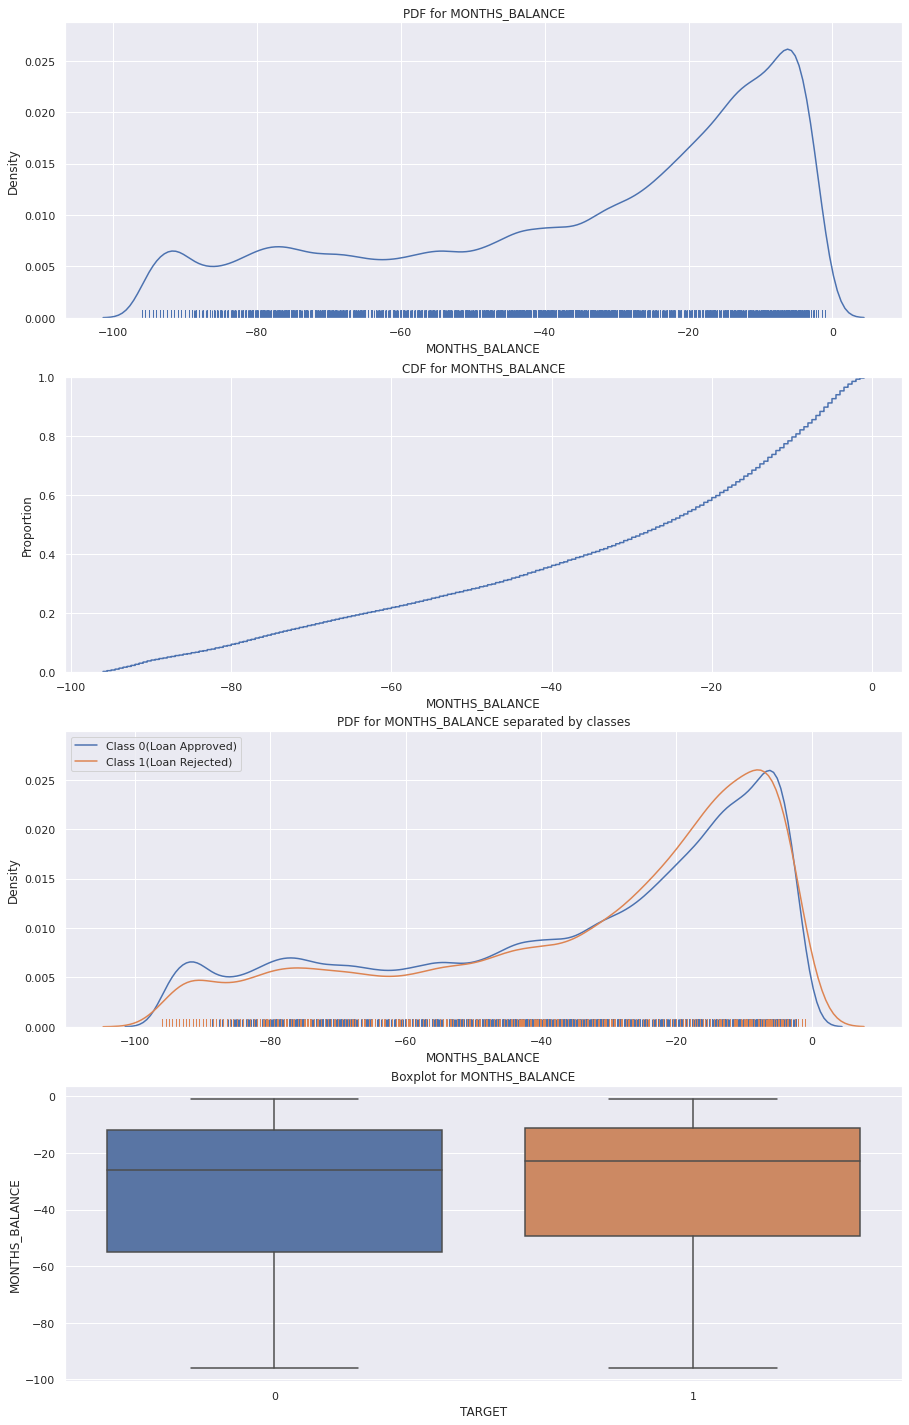

In [ ]:
plot_distribution_continous(POS_application_merged,'MONTHS_BALANCE')

Observation-

*    There is high density of previous credit POS records for which months balance is close to 0 or -1(closer to loan Application).
*    For the loan Applications which are rejected MONTHS_BALANCE is more recent relative to current APplication time as comapred to the one which are approved.

**CNT_INSTALMENT**

Term of previous credit (can change over time)

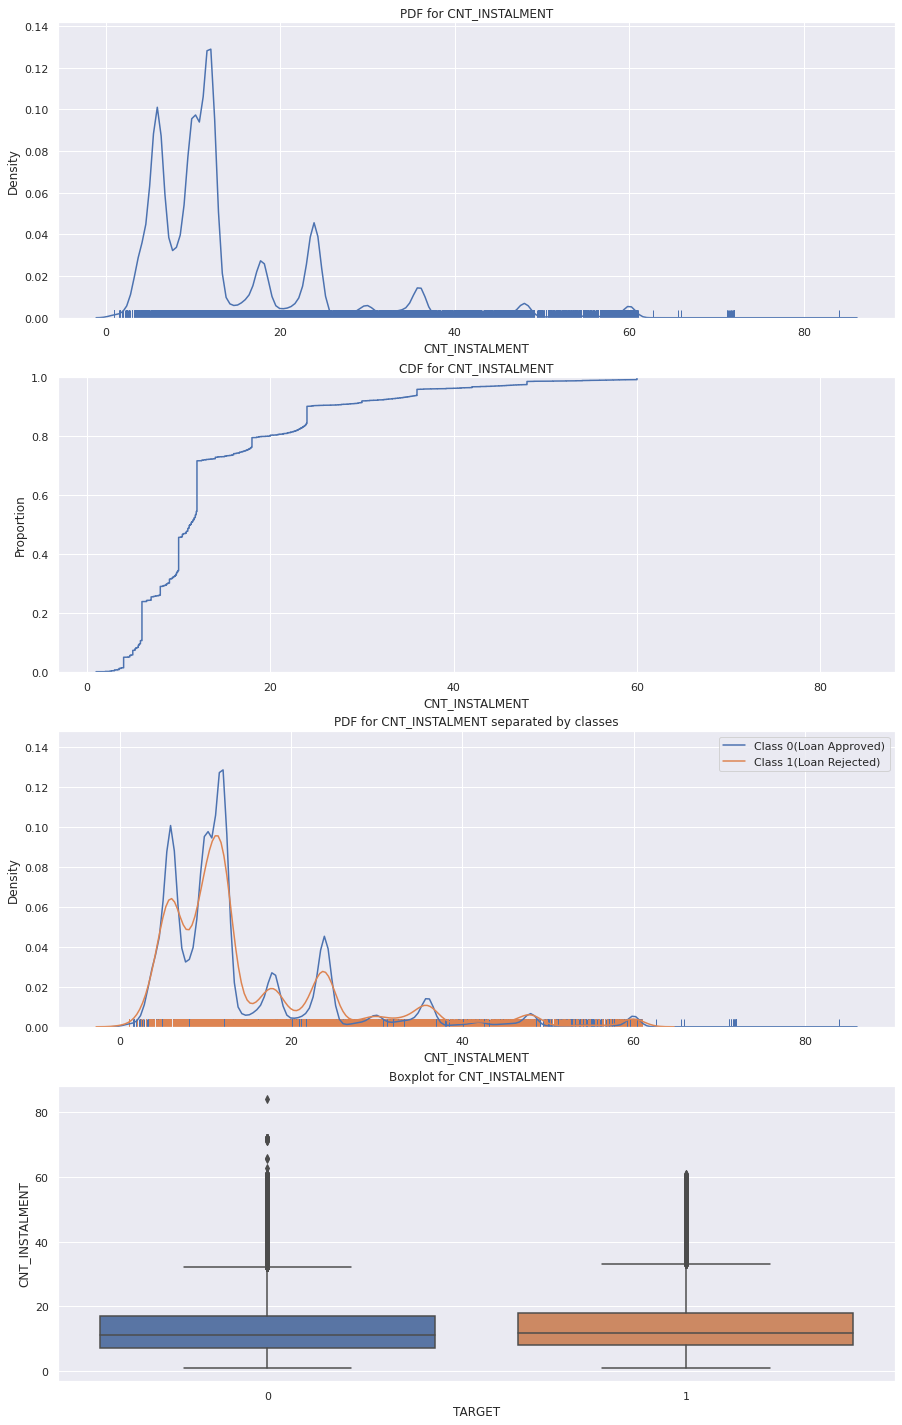

In [ ]:
plot_distribution_continous(POS_application_merged,'CNT_INSTALMENT')

Observations-

*   For the loan applications which are rejected, number of installments of previous credits is slighly higher than the loan applications which are approved.

## EDA for credit card balance Table

This table contains data about monthly balance snapshots of previous credit cards that the applicant has with Home Credit.

In [ ]:
print("Total number of records in Credit Card balance table are-",credit_card_balance_df.shape[0])
print("Number of unique SK_ID_CURR present in Credit Card balance table-",len(credit_card_balance_df['SK_ID_CURR'].unique()))
print("Number of unique SK_ID_CURR present in Credit Card balance table which are present in main application training data table-",len(set(credit_card_balance_df['SK_ID_CURR'].unique()).intersection(set(application_train_df['SK_ID_CURR'].unique()))))
print("Number of unique SK_ID_CURR present in Credit Card balance table which are present in main application test data table-",len(set(credit_card_balance_df['SK_ID_CURR'].unique()).intersection(set(application_test_df['SK_ID_CURR'].unique()))))

Total number of records in Credit Card balance table are- 3840312
Number of unique SK_ID_CURR present in Credit Card balance table- 103558
Number of unique SK_ID_CURR present in Credit Card balance table which are present in main application training data table- 86905
Number of unique SK_ID_CURR present in Credit Card balance table which are present in main application test data table- 16653


Observations-

*    There are 38 lakh records present in the table. These are monthly credit card balance records in Home Credit. There are 10 lakh unique SK_ID_CURR(current loan application id) in 38 lakh records.

### Missing value Analysis for Credit Card Balance table

In [ ]:
print_nan_statsdf(credit_card_balance_df)

Total number of Columns where NAN values are persent--> 9
Below Table shows list of columns where NAN value are present.
+----------------------------+--------------------+
|           Column           |  Percent Missing   |
+----------------------------+--------------------+
|    AMT_PAYMENT_CURRENT     | 19.998062657409086 |
|  AMT_DRAWINGS_ATM_CURRENT  | 19.524871937488413 |
|  CNT_DRAWINGS_POS_CURRENT  | 19.524871937488413 |
| AMT_DRAWINGS_OTHER_CURRENT | 19.524871937488413 |
|  AMT_DRAWINGS_POS_CURRENT  | 19.524871937488413 |
| CNT_DRAWINGS_OTHER_CURRENT | 19.524871937488413 |
|  CNT_DRAWINGS_ATM_CURRENT  | 19.524871937488413 |
| CNT_INSTALMENT_MATURE_CUM  | 7.948208374736219  |
|  AMT_INST_MIN_REGULARITY   | 7.948208374736219  |
+----------------------------+--------------------+


Observation-

* Out of 23 columns in the table 9 of them contains NAN value. Among those 9 columns AMT_PAYMENT_CURRENT has highest percentage(20) of NAN values.

In [ ]:
#Merging the Credit Card Balance table and Main application train DF

application_CC_balance_merged=application_train_df[['SK_ID_CURR','TARGET']].merge(credit_card_balance_df,on="SK_ID_CURR",how="left")

Now this merged table contains monthly Credit Card records. We can group by the SK_ID_PREV and take the mean of monthly records of the same SK_ID_PREV

In [ ]:
application_CC_balance_merged = application_CC_balance_merged.groupby('SK_ID_PREV').mean()

### Univariate Analysis on Credit Card Balance table

**AMT_BALANCE**

Balance during the month of previous credit

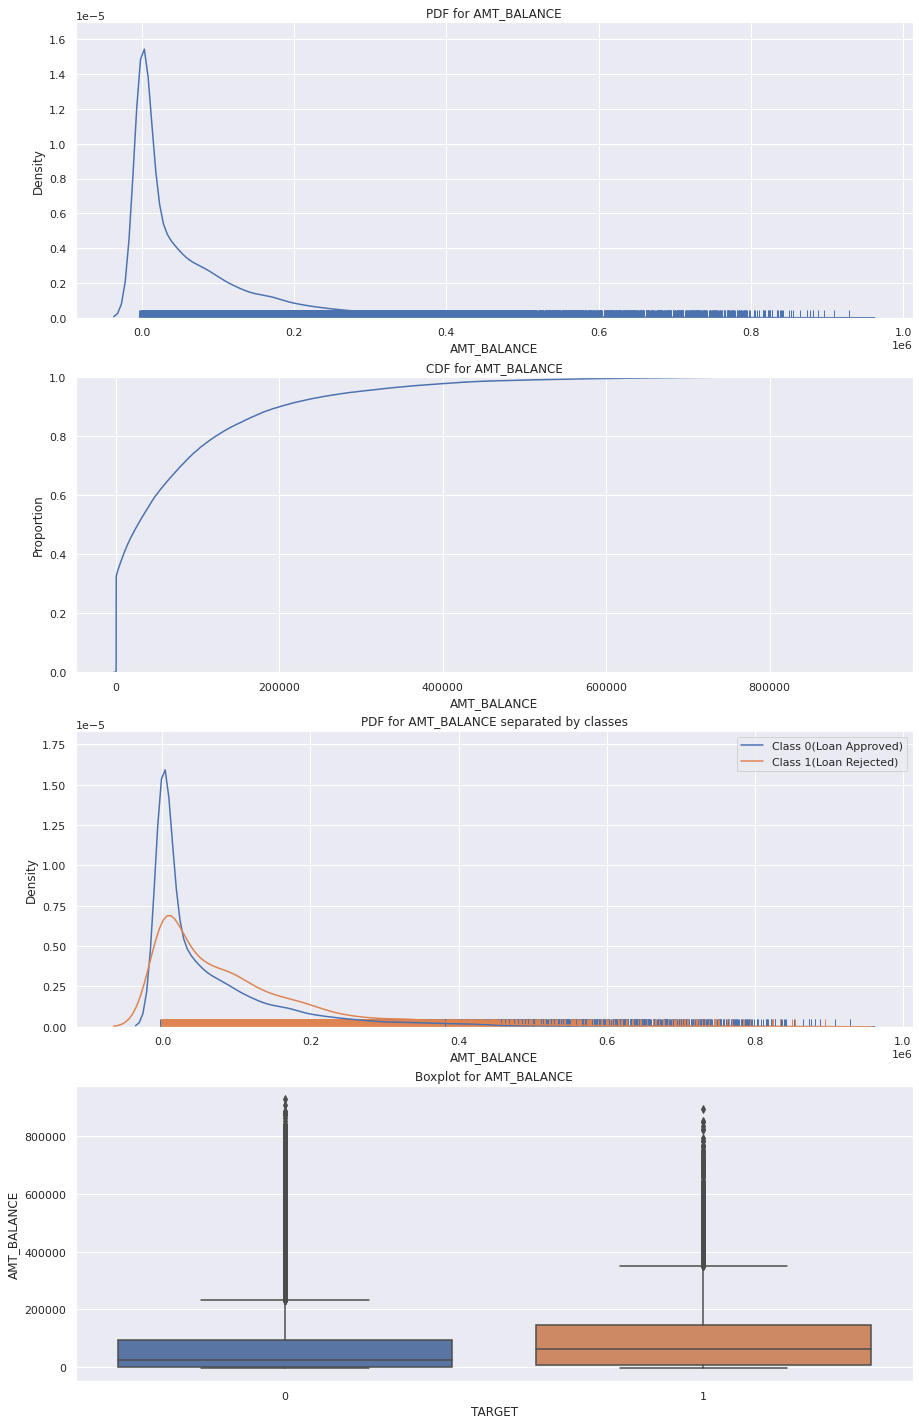

In [ ]:
plot_distribution_continous(application_CC_balance_merged,'AMT_BALANCE')

Observations-

*   Applicants whose loans are rejected have comparitively slighly higher AMT_balance than the applicants whose loans are approved.

**AMT_RECEIVABLE_PRINCIPAL**

Amount receivable for principal on the previous credit

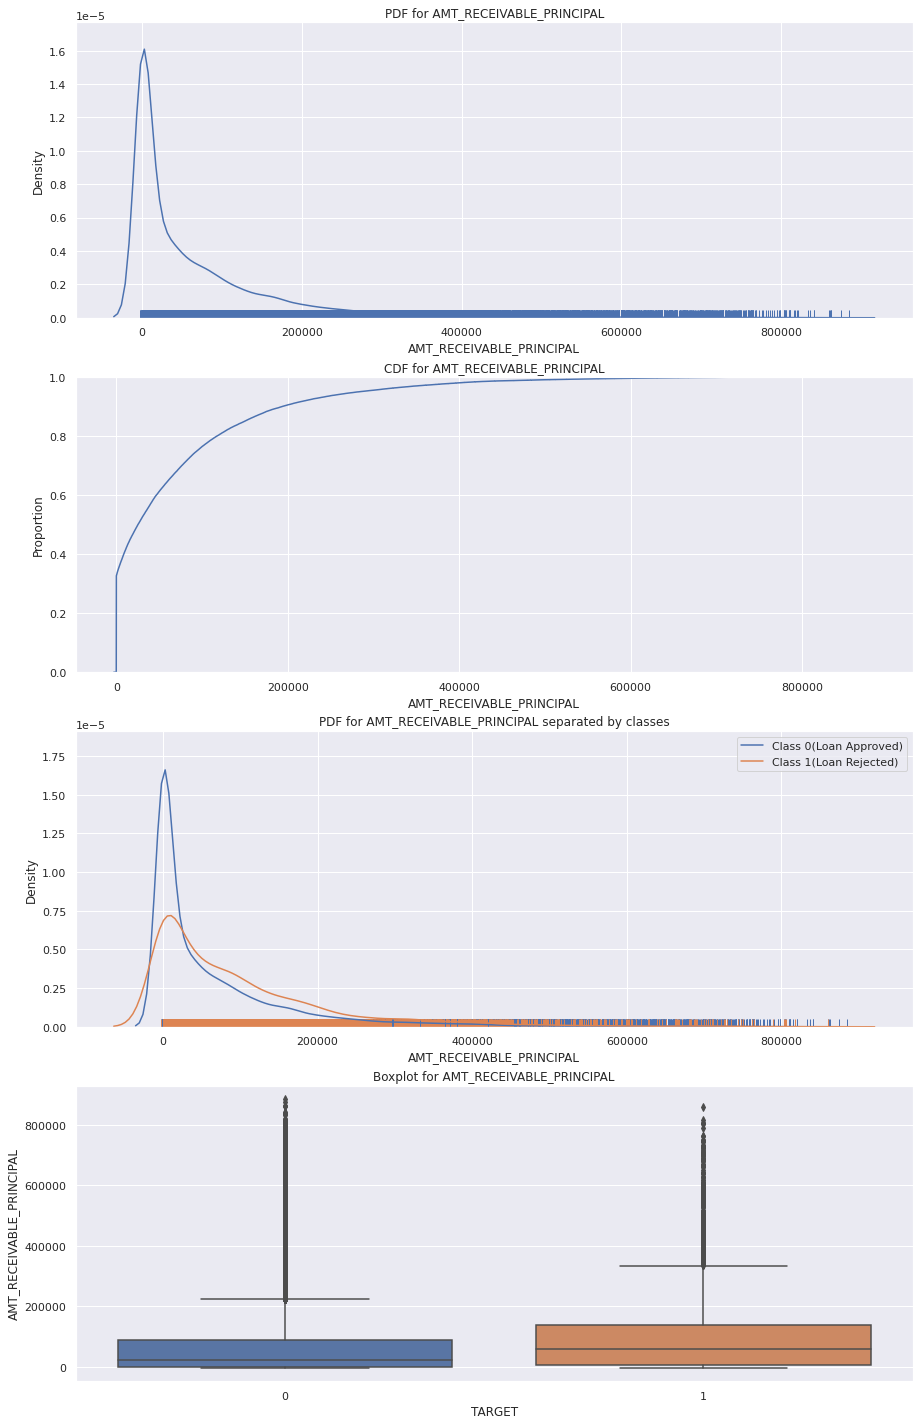

In [ ]:
plot_distribution_continous(application_CC_balance_merged,'AMT_RECEIVABLE_PRINCIPAL')

Observations-
*   Applicants whose current loan is rejected has slighltly higher Amount receivable for principal on previous credit in monthly credit card balanace records

**CNT_INSTALMENT_MATURE_CUM**

Number of paid installments on the previous credit

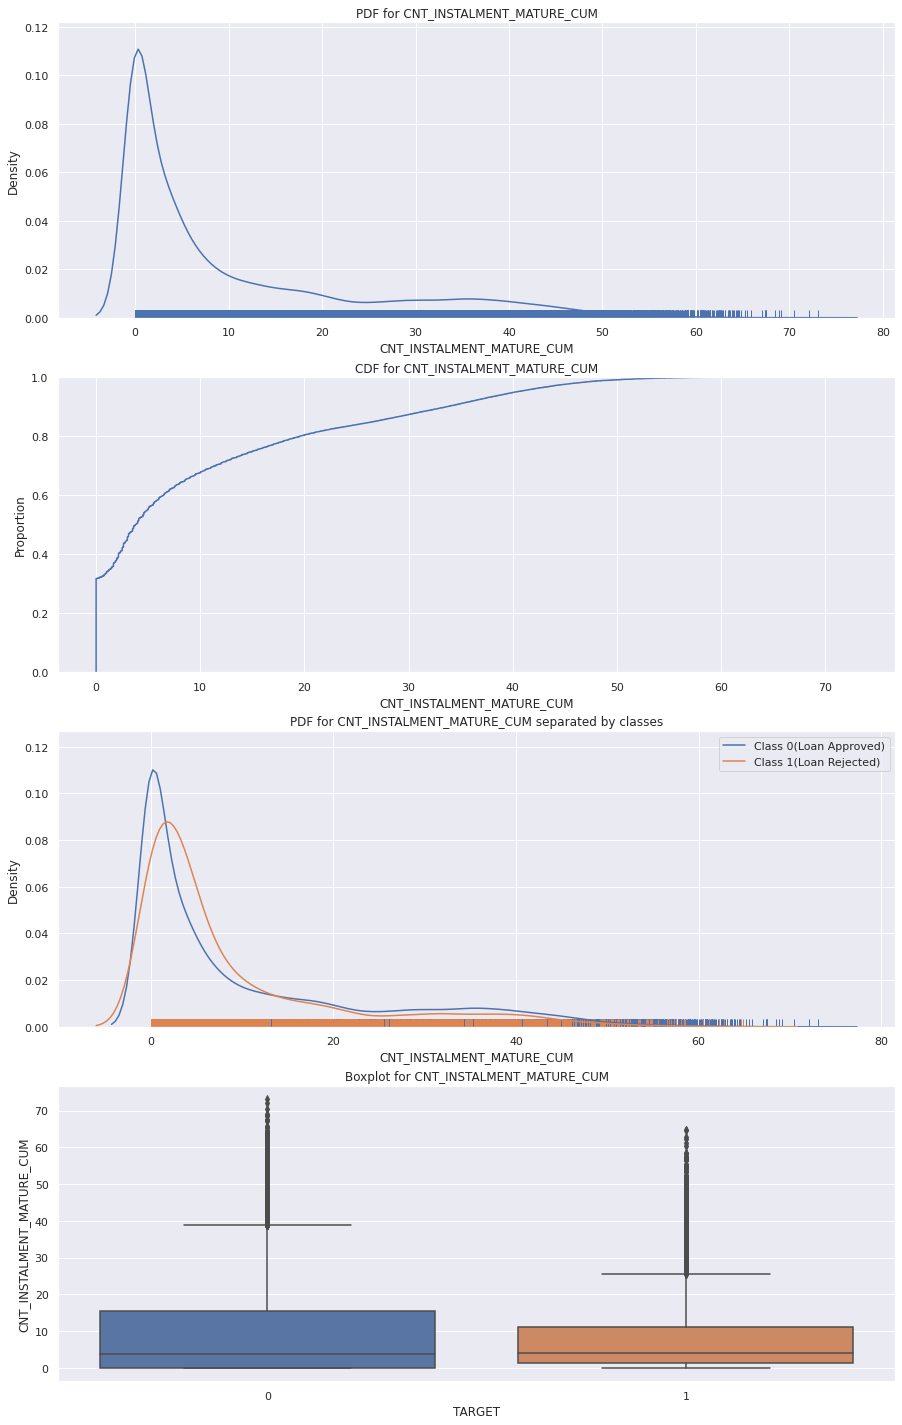

In [ ]:
plot_distribution_continous(application_CC_balance_merged,'CNT_INSTALMENT_MATURE_CUM')

In [ ]:
printPercentiles(application_CC_balance_merged,'CNT_INSTALMENT_MATURE_CUM')

for CNT_INSTALMENT_MATURE_CUM 0 percentile is---> 0.0
for CNT_INSTALMENT_MATURE_CUM 10 percentile is---> 0.0
for CNT_INSTALMENT_MATURE_CUM 20 percentile is---> 3.0
for CNT_INSTALMENT_MATURE_CUM 30 percentile is---> 7.0
for CNT_INSTALMENT_MATURE_CUM 40 percentile is---> 11.0
for CNT_INSTALMENT_MATURE_CUM 50 percentile is---> 16.0
for CNT_INSTALMENT_MATURE_CUM 60 percentile is---> 21.0
for CNT_INSTALMENT_MATURE_CUM 70 percentile is---> 29.0
for CNT_INSTALMENT_MATURE_CUM 80 percentile is---> 38.0
for CNT_INSTALMENT_MATURE_CUM 90 percentile is---> 51.0
for CNT_INSTALMENT_MATURE_CUM 100 percentile is---> 120.0


Observations-

*    Loan Applicants whose current loan is approved has paid comparatively slightly higher number of of installments of the previous credits than those whose current loan is Rejected.

*   There are high density of credit records which have number of paid installment close to zero.

## EDA for Installments Payments  Table

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample

In [ ]:
installments_payments_df

SK_ID_PREV  SK_ID_CURR  ...  AMT_INSTALMENT  AMT_PAYMENT
0            1054186      161674  ...        6948.360     6948.360
1            1330831      151639  ...        1716.525     1716.525
2            2085231      193053  ...       25425.000    25425.000
3            2452527      199697  ...       24350.130    24350.130
4            2714724      167756  ...        2165.040     2160.585
...              ...         ...  ...             ...          ...
13605396     2186857      428057  ...          67.500          NaN
13605397     1310347      414406  ...          67.500          NaN
13605398     1308766      402199  ...       43737.435          NaN
13605399     1062206      409297  ...          67.500          NaN
13605400     2448869      434321  ...       11504.250          NaN

[13605401 rows x 8 columns]

In [ ]:
print("Total number of records in Installments Payments table are-",installments_payments_df.shape[0])
print("Number of unique SK_ID_CURR present in Installments Payments table-",len(installments_payments_df['SK_ID_CURR'].unique()))
print("Number of unique SK_ID_CURR present in Installments Payments table which are present in main application training data table-",len(set(installments_payments_df['SK_ID_CURR'].unique()).intersection(set(application_train_df['SK_ID_CURR'].unique()))))
print("Number of unique SK_ID_CURR present in Installments Payments table which are present in main application test data table-",len(set(installments_payments_df['SK_ID_CURR'].unique()).intersection(set(application_test_df['SK_ID_CURR'].unique()))))

Total number of records in Installments Payments table are- 13605401
Number of unique SK_ID_CURR present in Installments Payments table- 339587
Number of unique SK_ID_CURR present in Installments Payments table which are present in main application training data table- 291643
Number of unique SK_ID_CURR present in Installments Payments table which are present in main application test data table- 47944


Observations-

*    There are 136 lakh records present in the table. These are the installment payments details for the loans that are availed by the customer earlier from home credit. There are 33 lakh unique SK_ID_CURR(current loan application id) for which installment details are present in the table.

*    Out of these 33 lakhs unique SK_ID_CURR, 29 lakhs SK_ID_CURR are from the Main application train data and 4 lakhs SK_ID_CURR are from the Main Application test data for which we need to the prediction.

### Missing value Analysis for Installments Payments  Table

In [ ]:
print_nan_statsdf(installments_payments_df)

Total number of Columns where NAN values are persent--> 2
Below Table shows list of columns where NAN value are present.
+--------------------+---------------------+
|       Column       |   Percent Missing   |
+--------------------+---------------------+
| DAYS_ENTRY_PAYMENT | 0.02135181462126695 |
|    AMT_PAYMENT     | 0.02135181462126695 |
+--------------------+---------------------+


Observations-

* Out of the 8 columns there 2 columns that has very small amount of missing values( only 0.02%), So we don't need to worry much these records and we can ignore them.

In [ ]:
#Merging the Installment Payments table and Main application train DF

application_installments_merged=application_train_df[['SK_ID_CURR','TARGET']].merge(installments_payments_df,on="SK_ID_CURR",how="left")

Now this merged table contains installments records for previous credits. We can group by the SK_ID_PREV and take the mean of all the installments of the same SK_ID_PREV

In [ ]:
application_installments_merged = application_installments_merged.groupby('SK_ID_PREV').mean()

### Univariate Analysis on Credit Card Balance table

**DAYS_INSTALMENT**

When the installment of previous credit was supposed to be paid (relative to application date of current loan)

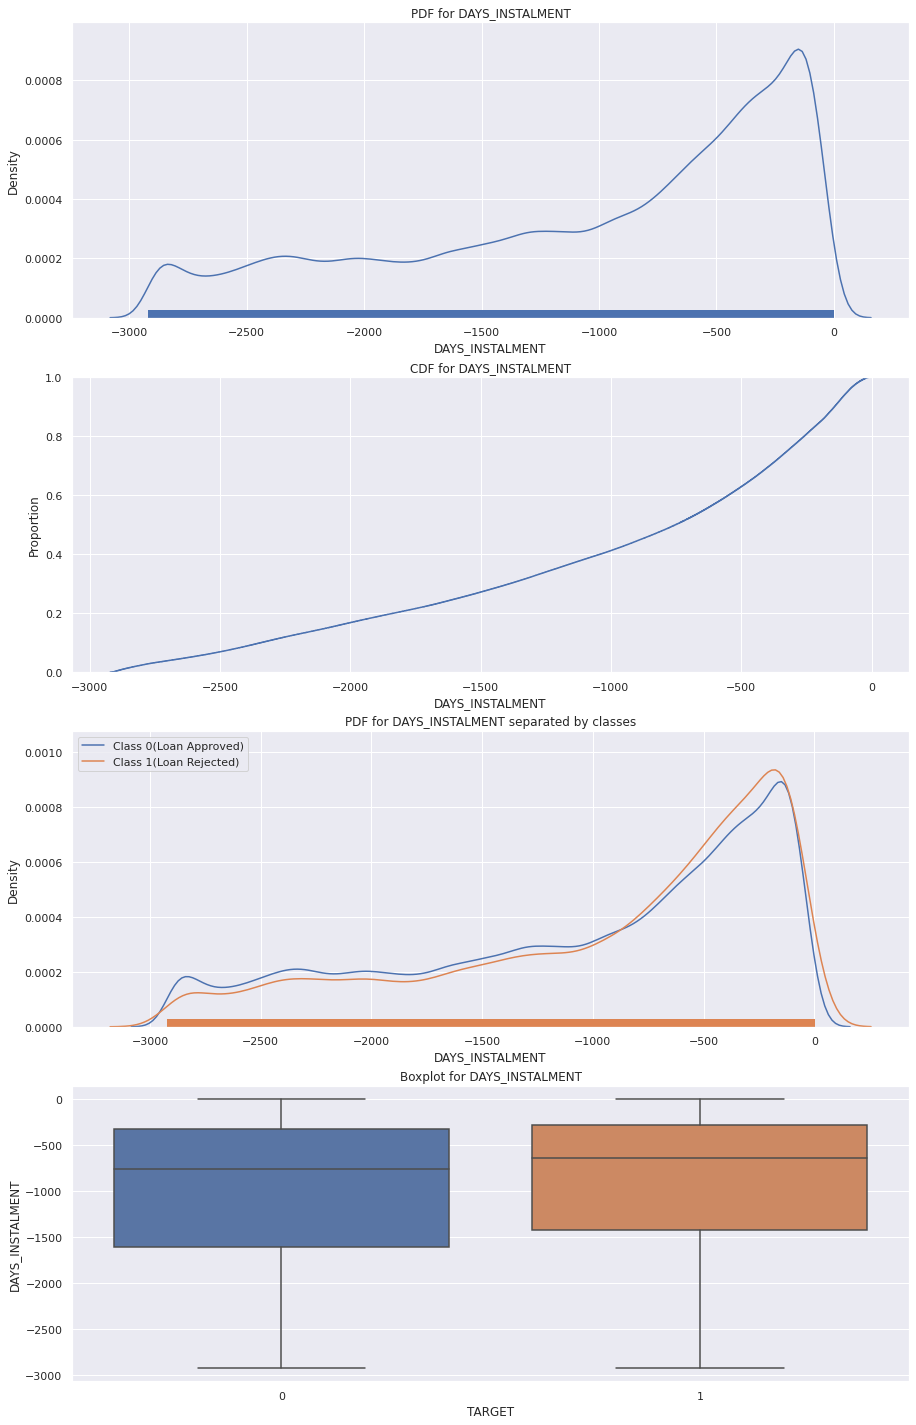

In [ ]:
plot_distribution_continous(application_installments_merged,'DAYS_INSTALMENT')

Observations-

For the the loan applicant whose loan is rejected, they are supposed to pay the installment of their credit more recent relative to the current application day as compared to the loan applicant whose loan is approved.

**DAYS_ENTRY_PAYMENT**

When was the installments of previous credit paid actually (relative to application date of current loan)

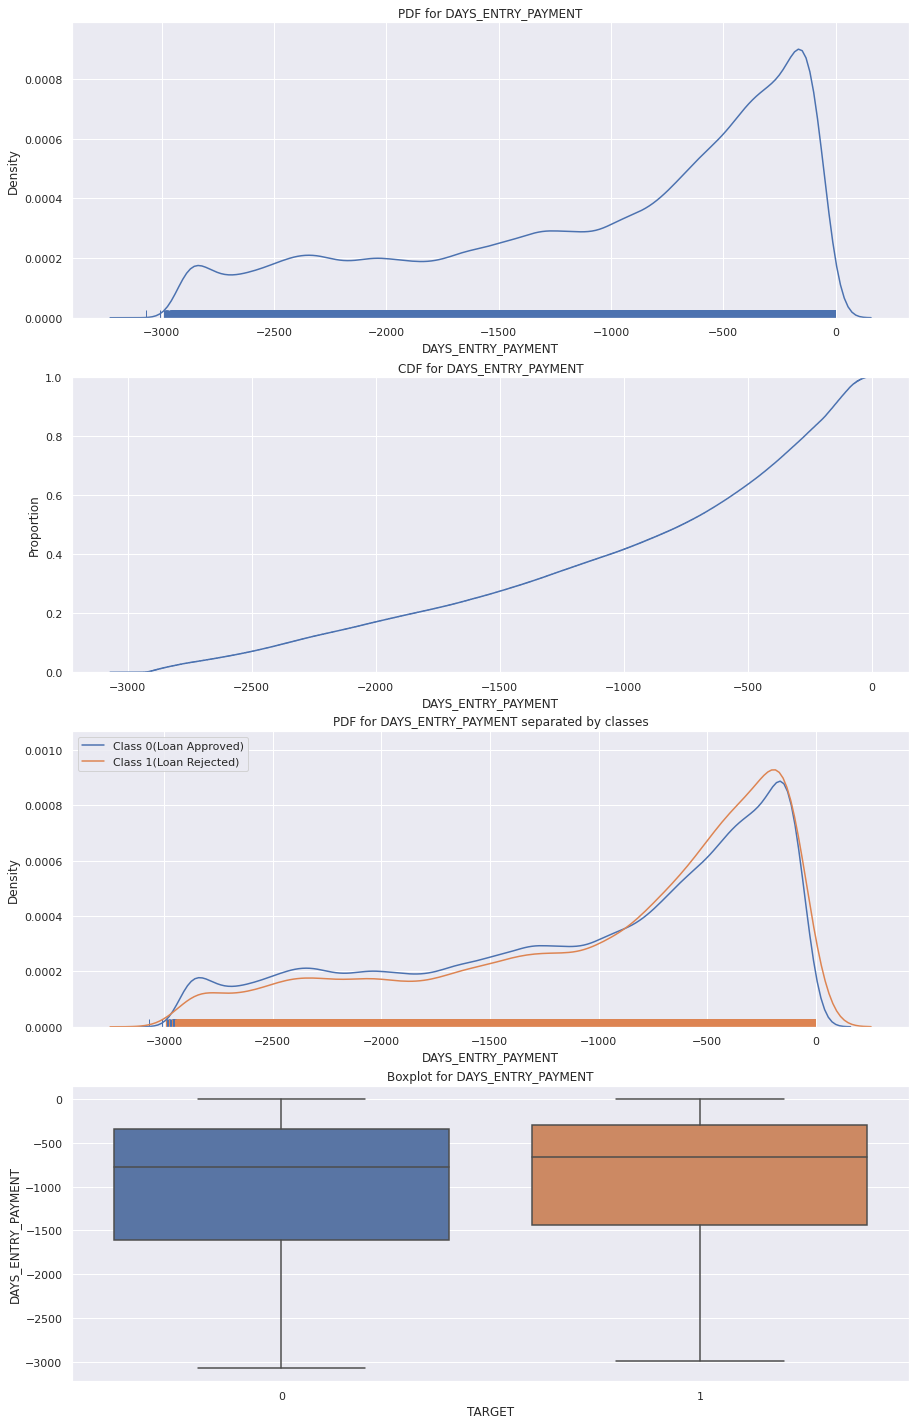

In [ ]:
plot_distribution_continous(application_installments_merged,'DAYS_ENTRY_PAYMENT')

Obsrvations-

For the the loan applicant whose loan is rejected, they paid the previous installment of their credit more recent relative to the current application day as compared to the loan applicant whose loan is approved.

## Conculsions from the EDA

1. We have highly imbalanced data and we need to take care of this imbalace before modelling either using upsampling or using class weights.

2.  There are lots of columns in main loan Application table which contains the NAN values. We need to handle those missing values in data preprocessing stage since some of the columns can be very important in prediction like EXT_SOURCE_1(56%),EXT_SOURCE_2(19%).

3. There are some features which contains very small amount of missing values, less than 0.002 %. We can simply ignore those records because there is not much information loss.

4. Different tables needs to merged with each other based on main loan application Identifier (SK_ID_CURR). Few tables contains monthly balance records which means we will have multiple records for same previous credit identifier(SK_ID_PRED), hence while merging these records with the main table we have to carefully use some aggregate function on these multiple records. For EDA purpose we have used mean of these records but in data preprocessing we can try diffrent aggregate functions like min,max,median etc.

5. Some features contains error values that does't make much sense. Mostly these features are related to number of days. We need to take care of those records in data cleaning/preprocessing stage.



1. feature engineering
2. Decrease and increase in AMT_balance for random set of customers imapact on target.
3. metric why we are using?
4. imputation